In [1]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

from matplotlib.lines import Line2D
import ipywidgets as widgets
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as ticker


In [2]:
# #數值設定  
# gamma = 1.47 #eV*angstrom

In [3]:
def tau(l, tau_0):
    l = np.abs(l)
    Tau = tau_0 / (np.abs(l)+1)
    return Tau

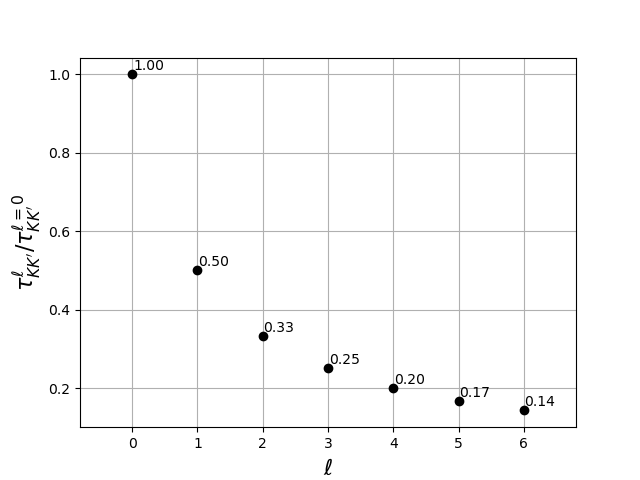

In [4]:
fig, ax = plt.subplots()
tau_0=1
taul = []
for l in range(0,7,1):
    taul += [tau(l, tau_0)]

ax.plot( np.arange(0,7,1), taul, 'o',color='black' )
for i, v in enumerate(taul):
        ax.text(i+0.25, v+0.01, "%2.2f" %v, ha="center")    
    
ax.grid()
ax.set_xlabel('$\ell$', fontsize=16)
ax.set_ylabel('$τ_{KK\'}^{\ell}/τ_{KK\'}^{\ell=0}$', fontsize=16)
ax.set_xlim(-0.8, 6.8)
plt.show()

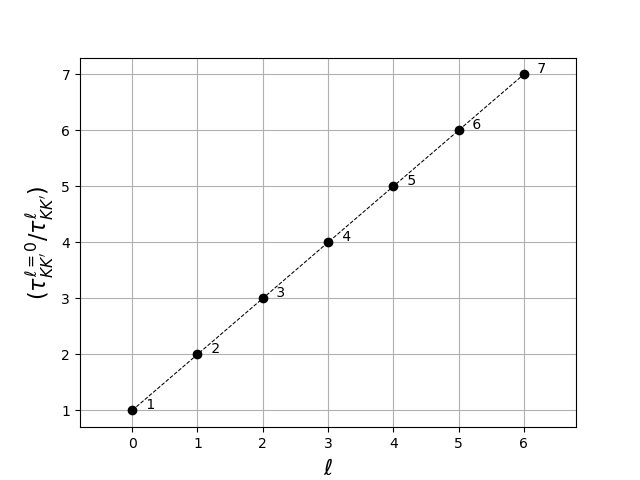

In [5]:
fig, ax = plt.subplots()
tau_0=1
taul = []
for l in range(0,7,1):
    taul += [1/tau(l, tau_0)]

ax.plot( np.arange(0,7,1), taul, marker='o', linestyle='dashed',linewidth=0.75,color='black' )
for i, v in enumerate(taul):
        ax.text(i+0.25, v+0.03, "%2.0f" %v, ha="center")    
    
ax.grid()
ax.set_xlabel('$\ell$', fontsize=16)
ax.set_ylabel('($τ_{KK\'}^{\ell=0}/τ_{KK\'}^{\ell})$', fontsize=16)
ax.set_xlim(-0.8, 6.8)
plt.show()

In [6]:
def WP_fun(l, y_l0_KK, y_x_r):
    y_l0_KK = y_l0_KK*(np.abs(l)+1)
    WP_TH = 1/(1+2*y_l0_KK/(y_x_r))
    return WP_TH

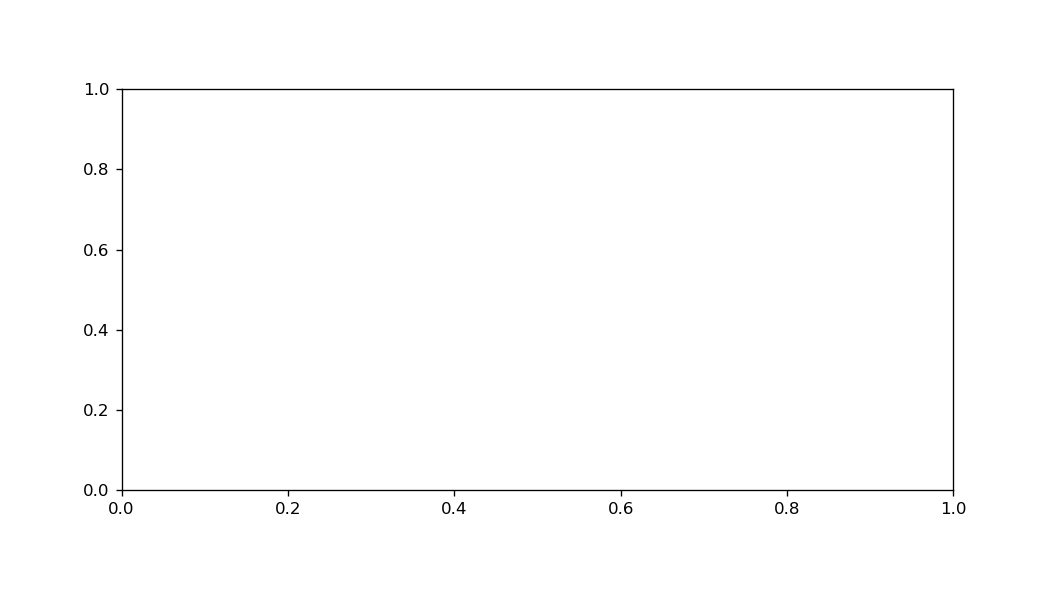

Output()

In [7]:
fig, ax = plt.subplots(figsize=(8.75, 5), dpi=120)

y_l0_KKmulti = widgets.FloatSlider(value=0.1, min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_l0_KK_multiplier')
y_x_r = 1

Linestyle = ['solid', 'dashed', 'dotted']
    
def need(y_l0_KKmulti):
    ax.cla()
    
    y_l0_KK = y_l0_KKmulti * y_x_r
    print("y_l0_KK = "+str(format(y_l0_KK,'.2f')))
    
    globals()['WP'] = []
    for l in range(0,7,1):
        globals()['WP'] += [WP_fun(l, y_l0_KK, y_x_r)]

    ax.plot( np.linspace(0, 6, 7), globals()['WP'], marker='v', linestyle='solid', markersize=8, color='red' ,linewidth=1, zorder=2)

    for j, v in enumerate(globals()['WP']):
        ax.text(j, v-0.09, "%2.2f" %v, ha="center", fontsize=20)


    ax.grid()
    # ax.set_title('Model I', fontsize=20)
    ax.set_ylabel("Exciton DoVP", fontsize=20, rotation=90)
    ax.set_yticks(np.arange(0, 1.01, 1./10))
    ax.set_yticks(np.arange(0, 1.01, 1./100), minor=True)
    ax.set_ylim(0, 0.9)
    ax.set_xlim(-0.5, 6.5)
    ax.set_xlabel('$\ell$', fontsize=20)
    # ax.set_xticks(np.linspace(0, 6, 7), [' ', ' ', ' ', ' ', ' ', ' ', ' '])
    ax.set_xticks(np.linspace(0, 6, 7), ['0', '1', '2', '3', '4', '5', '6'])
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.legend(['η$^{X,\ell}_{\sf{Model-I}}$'], fontsize=16, loc='lower left')


        
plt.tight_layout(pad=5)
# plt.subplots_adjust(left=0.1, right=0.9, 
#                     top=0.975, bottom=0.05, 
#                     wspace=0.4, hspace=0.028)
plt.show()

out = widgets.interactive_output(need, {'y_l0_KKmulti':y_l0_KKmulti})
ui = widgets.VBox([widgets.Label('coefficient:'), widgets.VBox([y_l0_KKmulti]) ])
display(ui , out )

In [8]:
def WP_fun(l, y_l0_KK, y_x0_KK, y_x_r, y_x_f):
    y_l0_KK = y_l0_KK*(np.abs(l)+1)
    WP_TH = 1/(1+2*y_l0_KK/(y_x_r+y_x_f))
    return WP_TH

def LOW_fun(l, y_l0_KK, y_x0_KK, y_x_r, y_x_f):
    onlyTR = 1/(1+2*y_x0_KK/y_x_r) * WP_fun(l, y_l0_KK, y_x0_KK, y_x_r, y_x_f)
    return onlyTR

# def Both_fun(l, y_l0_KK, y_x0_KK, y_x_r, y_x_f):
#     Both = (1+2*y_x0_KK/(y_x_r+y_x_f))/(1+2*y_x0_KK/y_x_r) * WP_fun(l, y_l0_KK, y_x0_KK, y_x_r, y_x_f) 
#     return Both

def Both_fun(l, y_l0_KK, y_x0_KK, y_x_r, y_x_f):
    Both = (y_x_f/(y_x_r+y_x_f))*LOW_fun(l, y_l0_KK, y_x0_KK, y_x_r, y_x_f) + (y_x_r/(y_x_r+y_x_f))*WP_fun(l, y_l0_KK, y_x0_KK, y_x_r, y_x_f) 
    return Both

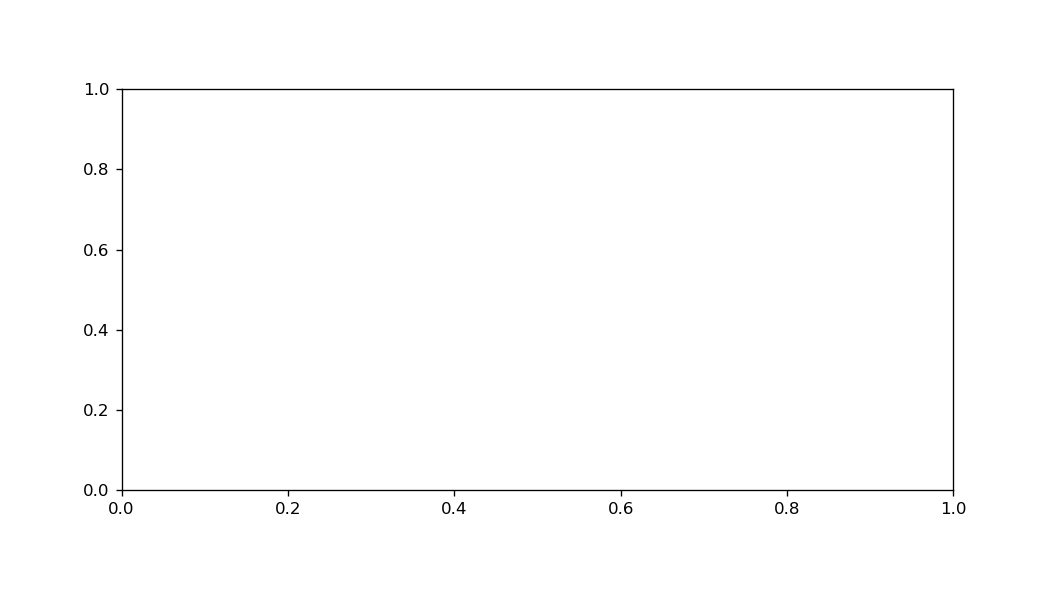

Output()

In [9]:
fig, ax = plt.subplots(figsize=(8.75, 5), dpi=120)

y_l0_KKmulti = widgets.FloatSlider(value=0.1, min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_l0_KK_multiplier')
y_x0_KKmulti = widgets.FloatSlider(value=0.1, min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_x0_KK_multiplier')
y_x_r = 1

Linestyle = ['solid', 'dashed', 'dotted']
# t_thmulti = [0.05, 0.1, 1]
y_x_fmulti = 10
    
def need(y_l0_KKmulti,y_x0_KKmulti):
    ax.cla()
    
    y_l0_KK = y_l0_KKmulti * y_x_r
    y_x0_KK = y_x0_KKmulti * y_x_r
    y_x_f   = y_x_fmulti   * y_x_r
    print("y_l0_KK = "+str(format(y_l0_KK,'.2f')))
    print("y_x0_KK = "+str(format(y_x0_KK,'.2f')))
    print("y_x_f = "+str(format(y_x_f,'.2f')))
    
    globals()['WP'] = []
    globals()['LOW'] = []
    globals()['Both'] = []
    for l in range(0,7,1):
        globals()['WP'] += [WP_fun(l, y_l0_KK, y_x0_KK, y_x_r, y_x_f)]
        globals()['LOW'] += [LOW_fun(l, y_l0_KK, y_x0_KK, y_x_r, y_x_f)]
        globals()['Both'] += [Both_fun(l, y_l0_KK, y_x0_KK, y_x_r, y_x_f)]

    ax.plot( np.linspace(0, 6, 7), globals()['WP'], marker='v', linestyle='solid', markersize=8, color='red' ,linewidth=1, zorder=2)
    ax.plot( np.linspace(0, 6, 7), globals()['LOW'], marker='^', linestyle='solid', markersize=8, color='blue' ,linewidth=1, zorder=2)
    ax.plot( np.linspace(0, 6, 7), globals()['Both'], marker='o', linestyle='solid', markersize=8, color='black' ,linewidth=1, zorder=2)

    for j, v in enumerate(globals()['WP']):
        ax.text(j, v-0.05, "%2.3f" %v, ha="center", fontsize=20)
    for j, v in enumerate(globals()['LOW']):
        ax.text(j, v-0.05, "%2.3f" %v, ha="center", fontsize=20)
    for j, v in enumerate(globals()['Both']):
        ax.text(j, v+0.01, "%2.3f" %v, ha="center", fontsize=20)

    ax.grid()
    # ax.set_title('Model I', fontsize=20)
    ax.set_ylabel("Exciton DoVP", fontsize=20, rotation=90)
    ax.set_yticks(np.arange(0, 1.01, 1./10))
    ax.set_yticks(np.arange(0, 1.01, 1./100), minor=True)
    ax.set_ylim(0.5, 1)
    ax.set_xlim(-0.5, 6.5)
    ax.set_xlabel('$\ell$', fontsize=20)
    # ax.set_xticks(np.linspace(0, 6, 7), [' ', ' ', ' ', ' ', ' ', ' ', ' '])
    ax.set_xticks(np.linspace(0, 6, 7), ['0', '1', '2', '3', '4', '5', '6'])
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.legend(['η$^{X,\ell}_{\sf{Model-I}}$', 'η$^{X,(0)}_{\sf{Model-I}}$', 'η$^X_{\sf{Model-I}}$'], fontsize=16, loc='lower left')


        
plt.tight_layout(pad=5)
# plt.subplots_adjust(left=0.1, right=0.9, 
#                     top=0.975, bottom=0.05, 
#                     wspace=0.4, hspace=0.028)
plt.show()

out = widgets.interactive_output(need, {'y_l0_KKmulti':y_l0_KKmulti,'y_x0_KKmulti':y_x0_KKmulti})
ui = widgets.VBox([widgets.Label('coefficient:'), widgets.VBox([y_l0_KKmulti,y_x0_KKmulti]) ])
display(ui , out )

In [10]:
def WP_and_TH_fun(l, y_l0_KK, y_X0_KK, y_x_r, y_X_f, y_T_f):
    y_l0_KK = y_l0_KK*(np.abs(l)+1)
    WP_TH = (1+2*y_X0_KK/(y_T_f+y_x_r+y_X_f))/(1+2*y_X0_KK/(y_T_f+y_x_r)) / (1+2*y_l0_KK/(y_T_f+y_x_r+y_X_f))
    return WP_TH

def onlyTR_fun(l, y_l0_KK, y_X0_KK, y_x_r, y_X_f, y_T_f, y_T_KK, y_T_r):
    onlyTR = WP_and_TH_fun(l, y_l0_KK, y_X0_KK, y_x_r, y_X_f, y_T_f) * (1/(1+2*y_T_KK/y_T_r))
    return onlyTR

def All_fun(l, y_l0_KK, y_X0_KK, y_x_r, y_X_f, y_T_f, y_T_KK, y_T_r):
    All    = WP_and_TH_fun(l, y_l0_KK, y_X0_KK, y_x_r, y_X_f, y_T_f) * (1+2*y_T_KK/(y_T_r*(1+y_T_f/y_X_r))) / (1+2*y_T_KK/y_T_r)
    return All

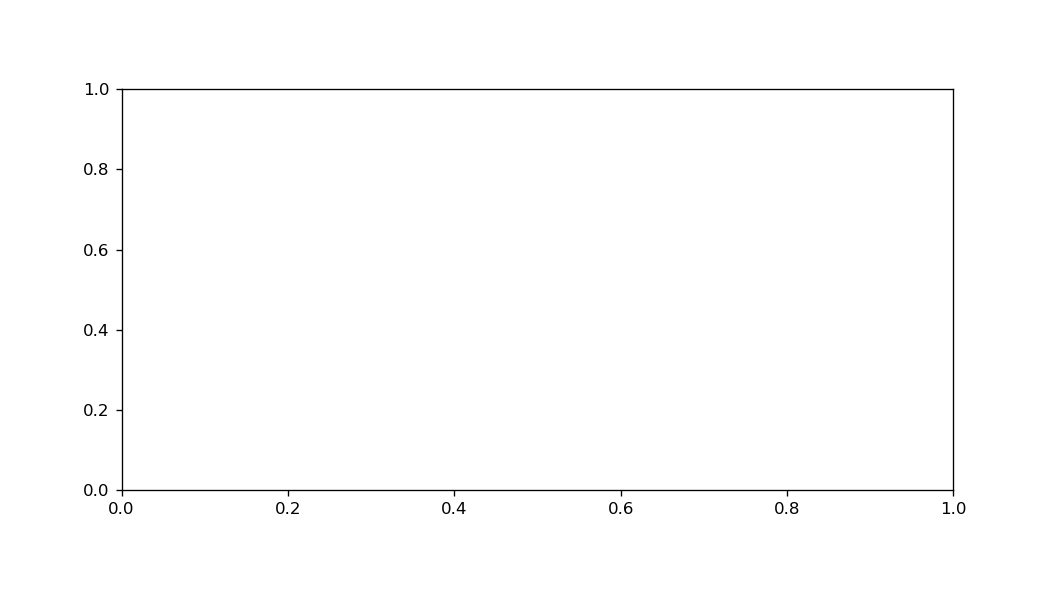

Output()

In [11]:
fig, ax = plt.subplots(figsize=(8.75, 5), dpi=120)

y_l0_KKmulti = widgets.FloatSlider(value=0.1, min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_l0_KK_multiplier')
y_X0_KKmulti = widgets.FloatSlider(value=0.1, min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_X0_KK_multiplier')
y_X_fmulti   = widgets.FloatSlider(value=10,  min=0., max=10,step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_X_fmultiplier')
y_T_fmulti   = widgets.FloatSlider(value=1,   min=0., max=10,step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_T_fmultiplier')
y_T_KKmulti  = widgets.FloatSlider(value=0.01,min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_T_KKmultiplier')
y_T_rmulti   = widgets.FloatSlider(value=0.1, min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_T_rmultiplier')

y_X_r = 1

# GK = 1
# GKprime = 0
# Gratio_term = (GK-GKprime)/(GK+GKprime)

    
def need(y_l0_KKmulti, y_X0_KKmulti, y_X_fmulti, y_T_fmulti, y_T_KKmulti, y_T_rmulti):

    y_l0_KK = y_l0_KKmulti * y_X_r
    y_X0_KK = y_X0_KKmulti * y_X_r
    y_X_f   = y_X_fmulti   * y_X_r
    y_T_f   = y_T_fmulti   * y_X_r
    y_T_KK  = y_T_KKmulti  * y_X_r
    y_T_r   = y_T_rmulti   * y_X_r
    print("y_l0_KK = "+str(format(y_l0_KK,'.2f')))
    print("y_X0_KK = "+str(format(y_X0_KK,'.2f')))
    print("y_X_f = "+str(format(y_X_f,'.2f')))
    print("y_T_f = "+str(format(y_T_f,'.2f')))
    print("y_T_KK = "+str(format(y_T_KK,'.2f')))
    print("y_T_r = "+str(format(y_T_r,'.2f')))
    
    
    ax.cla()
    globals()['WP_and_TH'] = []
    globals()['onlyTR'] = []
    globals()['All'] = []
    for l in range(0,7,1):
        globals()['WP_and_TH'] += [WP_and_TH_fun(l, y_l0_KK, y_X0_KK, y_x_r, y_X_f, y_T_f)]
        globals()['onlyTR']    += [onlyTR_fun(l, y_l0_KK, y_X0_KK, y_x_r, y_X_f, y_T_f, y_T_KK, y_T_r)]
        globals()['All']       += [All_fun(l, y_l0_KK, y_X0_KK, y_x_r, y_X_f, y_T_f, y_T_KK, y_T_r)]

    

    ax.plot( np.linspace(0, 6, 7), globals()['WP_and_TH'], marker='o', linestyle='solid', markersize=8, color='black' ,linewidth=1, zorder=2)
    # ax.plot( np.linspace(0, 6, 7), globals()['All'], marker='s', linestyle='dashed', markersize=8, color='black' ,linewidth=1, zorder=2)
    ax.plot( np.linspace(0, 6, 7), globals()['onlyTR'], marker='o', linestyle='dotted', markersize=8, color='mediumseagreen' ,linewidth=1, zorder=2)
    for j, v in enumerate(globals()['WP_and_TH']):
        ax.text(j, v+0.0075, "%2.3f" %v, ha="center", fontsize=20)
    # for j, v in enumerate(globals()['All']):
        # ax.text(j, v+0.01, "%2.2f" %v, ha="center", fontsize=20)
    for j, v in enumerate(globals()['onlyTR']):
        ax.text(j, v+0.01, "%2.3f" %v, ha="center", fontsize=20)
  
    ax.grid()
    # ax.set_title('η ', fontsize=16)
    # ax.set_title('Exciton DoVP', fontsize=16)
    # ax.set_title('Model II', fontsize=20)
    ax.set_ylabel('DoVP', fontsize=20, rotation=90)
    # ax.set_ylabel('η$_{T}$(%)', fontsize=16, rotation=90)
    ax.set_yticks(np.arange(0, 1.01, 1./10))
    ax.set_yticks(np.arange(0, 1.01, 1./100), minor=True)
    # ax.set_ylim(0.45, 0.95)
    # ax.set_yticks(np.arange(-100, 1, 100/10))
    # ax.set_yticks(np.arange(-100, 1, 100/100), minor=True)
    ax.set_ylim(0.45, 0.95)
    ax.set_xlabel('$\ell$', fontsize=20)
    # ax.set_xticks(np.linspace(0, 6, 7), [' ', ' ', ' ', ' ', ' ', ' ', ' '])
    ax.set_xticks(np.linspace(0, 6, 7), ['0', '1', '2', '3', '4', '5', '6'])
    ax.set_xlim(-0.5, 6.5)
    ax.legend(['η$^X_{\sf{Model-II}}$', 'η$^T_{\sf{Model-II}}$'], fontsize=16, loc='lower left')
    ax.tick_params(axis='both', which='major', labelsize=20)
    

plt.tight_layout(pad=5)
# plt.tight_layout(pad=2)
# plt.subplots_adjust(left=0.1, right=0.9, 
#                     top=0.975, bottom=0.05, 
#                     wspace=0.4, hspace=0.028)
plt.show()

out = widgets.interactive_output(need, {'y_l0_KKmulti':y_l0_KKmulti, 'y_X0_KKmulti':y_X0_KKmulti, 'y_X_fmulti':y_X_fmulti, 'y_T_fmulti':y_T_fmulti, 'y_T_KKmulti':y_T_KKmulti, 'y_T_rmulti':y_T_rmulti})
ui = widgets.VBox([widgets.Label('coefficient:'), widgets.VBox([y_l0_KKmulti, y_X0_KKmulti, y_X_fmulti, y_T_fmulti, y_T_KKmulti, y_T_rmulti]) ])
display(ui , out )

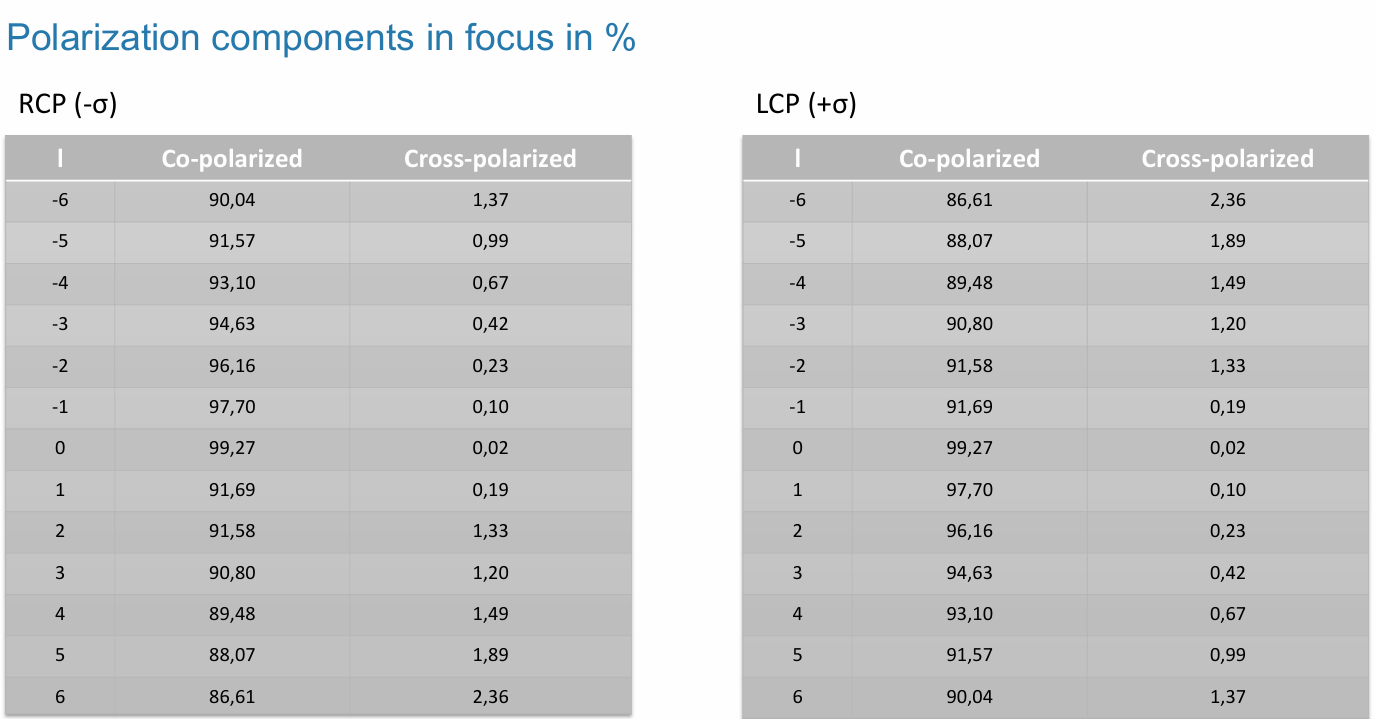

In [24]:
def WP_and_TH_fun(l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f, Gratio):
    y_l0_KK = y_l0_KK*(np.abs(l)+1)
    WP_TH = (1+2*y_X0_KK/(y_T_f+y_X_r+y_X_f))/(1+2*y_X0_KK/(y_T_f+y_X_r)) / (1+2*y_l0_KK/(y_T_f+y_X_r+y_X_f)) * Gratio
    return WP_TH

def onlyTR_fun(l, y_l0_KK, y_X0_KK, y_x_r, y_X_f, y_T_f, y_T_KK, y_T_r, Gratio):
    onlyTR = WP_and_TH_fun(l, y_l0_KK, y_X0_KK, y_x_r, y_X_f, y_T_f, Gratio) * (1/(1+2*y_T_KK/y_T_r))
    return onlyTR

def All_fun(l, y_l0_KK, y_X0_KK, y_x_r, y_X_f, y_T_f, y_T_KK, y_T_r, Gratio):
    All    = WP_and_TH_fun(l, y_l0_KK, y_X0_KK, y_x_r, y_X_f, y_T_f, Gratio) * (1+2*y_T_KK/(y_T_r*(1+y_T_f/y_X_r))) / (1+2*y_T_KK/y_T_r)
    return All

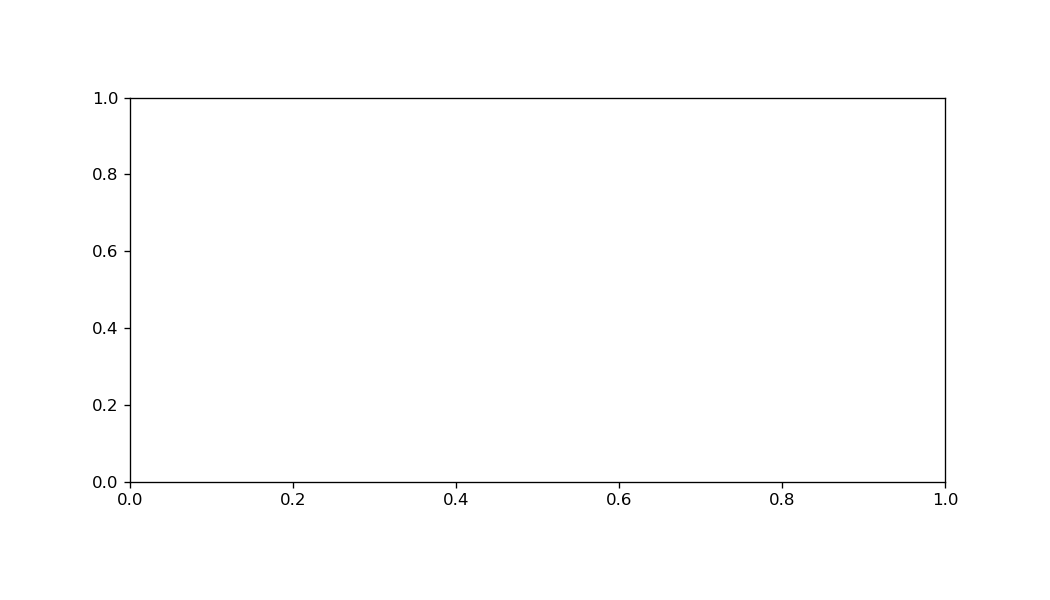

Output()

In [25]:
fig, ax = plt.subplots(figsize=(8.75, 5), dpi=120)

y_l0_KKmulti = widgets.FloatSlider(value=0.07, min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_l0_KK_multiplier')
y_X0_KKmulti = widgets.FloatSlider(value=0.07, min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_X0_KK_multiplier')
y_X_fmulti   = widgets.FloatSlider(value=10,  min=0., max=50,step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_X_fmultiplier')
y_T_fmulti   = widgets.FloatSlider(value=1.4,   min=0., max=5,step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_T_fmultiplier')
y_T_KKmulti  = widgets.FloatSlider(value=0.007,min=0., max=0.005, step=1/1000001 ,layout=widgets.Layout(width='75%'), description='y_T_KKmultiplier')
y_T_rmulti   = widgets.FloatSlider(value=0.05, min=0., max=0.5, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_T_rmultiplier')

y_X_r = 1

# GK = []
# GKprime = []
GKinRCP = [90.04, 91.57, 93.10, 94.63, 96.16, 97.70, 99.27, 91.69, 91.58, 90.80, 89.48, 88.07, 86.61]
GKprimeinRCP = [1.37, 0.99, 0.67, 0.42, 0.23, 0.10, 0.02, 0.19, 1.33, 1.20, 1.49, 1.89, 2.36]

GKinLCP = [2.36, 1.89, 1.49, 1.20, 1.33, 0.19, 0.02, 0.10, 0.23, 0.42, 0.67, 0.99, 1.37]
GKprimeinLCP = [86.61, 88.07, 89.48, 90.80, 91.58, 91.69, 99.27, 99.70, 96.16, 94.63, 93.10, 91.57, 90.04]
    
Gratio = []
for i in range(13):
    Gratio += [(GKinRCP[i]-GKprimeinRCP[i])/(GKinRCP[i]+GKprimeinRCP[i])]
    # Gratio += [(GKprimeinLCP[i]-GKinLCP[i])/(GKprimeinLCP[i]+GKinLCP[i])]
    # Gratio += [1]

    
def need(y_l0_KKmulti, y_X0_KKmulti, y_X_fmulti, y_T_fmulti, y_T_KKmulti, y_T_rmulti):

    y_l0_KK = y_l0_KKmulti * y_X_r
    y_X0_KK = y_X0_KKmulti * y_X_r
    y_X_f   = y_X_fmulti   * y_X_r
    y_T_f   = y_T_fmulti   * y_X_r
    y_T_KK  = y_T_KKmulti  * y_X_r
    y_T_r   = y_T_rmulti   * y_X_r
    print("y_l0_KK = "+str(format(y_l0_KK,'.2f')))
    print("y_X0_KK = "+str(format(y_X0_KK,'.2f')))
    print("y_X_f = "+str(format(y_X_f,'.2f')))
    print("y_T_f = "+str(format(y_T_f,'.2f')))
    print("y_T_KK = "+str(format(y_T_KK,'.5f')))
    print("y_T_r = "+str(format(y_T_r,'.5f')))
    
    
    ax.cla()
    globals()['WP_and_TH'] = []
    globals()['onlyTR'] = []
    globals()['All'] = []
    for l in range(-6,7,1):
        globals()['WP_and_TH'] += [WP_and_TH_fun(l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f, Gratio[l+6])]
        globals()['onlyTR']    += [onlyTR_fun(l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f, y_T_KK, y_T_r, Gratio[l+6])]
        globals()['All']       += [All_fun(l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f, y_T_KK, y_T_r, Gratio[l+6])]

    ax.plot( np.linspace(-6, 6, 13), globals()['WP_and_TH'], marker='v', linestyle='solid', markersize=8, color='magenta' ,linewidth=1, zorder=2)
    ax.plot( np.linspace(-6, 6, 13), globals()['All'], marker='s', linestyle='dashed', markersize=8, color='black' ,linewidth=1, zorder=2)
    ax.plot( np.linspace(-6, 6, 13), globals()['onlyTR'], marker='o', linestyle='dotted', markersize=8, color='mediumseagreen' ,linewidth=1, zorder=2)
    
    globals()['WP_and_TH_for_text'] = []
    for L in range(-6,7,2):
        globals()['WP_and_TH_for_text']       += [WP_and_TH_fun(L, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f, Gratio[L+6])]
    for j, v in enumerate(globals()['WP_and_TH_for_text']):
        ax.text((j-3)*2, v+0.008, "%2.2f" %v, ha="center", fontsize=18)

    # globals()['All_for_text'] = []
    # for L in range(-6,7,2):
    #     globals()['All_for_text']       += [All_fun(L, y_l0_KK, y_X0_KK, y_x_r, y_X_f, y_T_f, y_T_KK, y_T_r, Gratio[L+6])]
    # for j, v in enumerate(globals()['All_for_text']):
    #     ax.text((j-3)*2, v+0.008, "%2.2f" %v, ha="center", fontsize=18)
        
    globals()['onlyTR_for_text'] = []
    for L in range(-6,7,2):
        globals()['onlyTR_for_text']       += [onlyTR_fun(L, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f, y_T_KK, y_T_r, Gratio[L+6])]
    for j, v in enumerate(globals()['onlyTR_for_text']):
        ax.text((j-3)*2, v-0.02, "%2.3f" %v, ha="center", fontsize=18)
  
    ax.grid()
    # ax.set_title('η ', fontsize=16)
    ax.set_ylabel('DoVP', fontsize=20, rotation=90)
    ax.set_yticks(np.arange(0, 1.01, 1./25))
    ax.set_yticks(np.arange(0, 1.01, 1./100), minor=True)
    ax.set_ylim(0.68, 0.94)
    # ax.set_yticks(np.arange(-100, 1, 100/10))
    # ax.set_yticks(np.arange(-100, 1, 100/100), minor=True)
    # ax.set_ylim(-105, 0)
    ax.set_xlabel('$\ell$', fontsize=20)
    # ax.set_xticks(np.linspace(-6, 6, 13), [' ', ' ', ' ', ' ', ' ', ' ',' ', ' ', ' ', ' ', ' ', ' ', ' '])
    ax.set_xticks(np.linspace(-6, 6, 13), ['-6', '-5', '-4', '-3', '-2', '-1', '0', '1', '2', '3', '4', '5', '6'])
    # ax.set_xlim(-0.1, 6.7)
    ax.legend(['η$^\ell_{X}$(Model II)', 'η$^\ell_{tot}$(Model II)', 'η$^\ell_{T}$(Model II)'], fontsize=14, loc='lower center')
    ax.tick_params(axis='both', which='major', labelsize=20)
    

plt.tight_layout(pad=5.5)
# plt.tight_layout(pad=2)
# plt.subplots_adjust(left=0.1, right=0.9, 
#                     top=0.975, bottom=0.05, 
#                     wspace=0.4, hspace=0.028)
plt.show()

out = widgets.interactive_output(need, {'y_l0_KKmulti':y_l0_KKmulti, 'y_X0_KKmulti':y_X0_KKmulti, 'y_X_fmulti':y_X_fmulti, 'y_T_fmulti':y_T_fmulti, 'y_T_KKmulti':y_T_KKmulti, 'y_T_rmulti':y_T_rmulti})
ui = widgets.VBox([widgets.Label('coefficient:'), widgets.VBox([y_l0_KKmulti, y_X0_KKmulti, y_X_fmulti, y_T_fmulti, y_T_KKmulti, y_T_rmulti]) ])
display(ui , out )

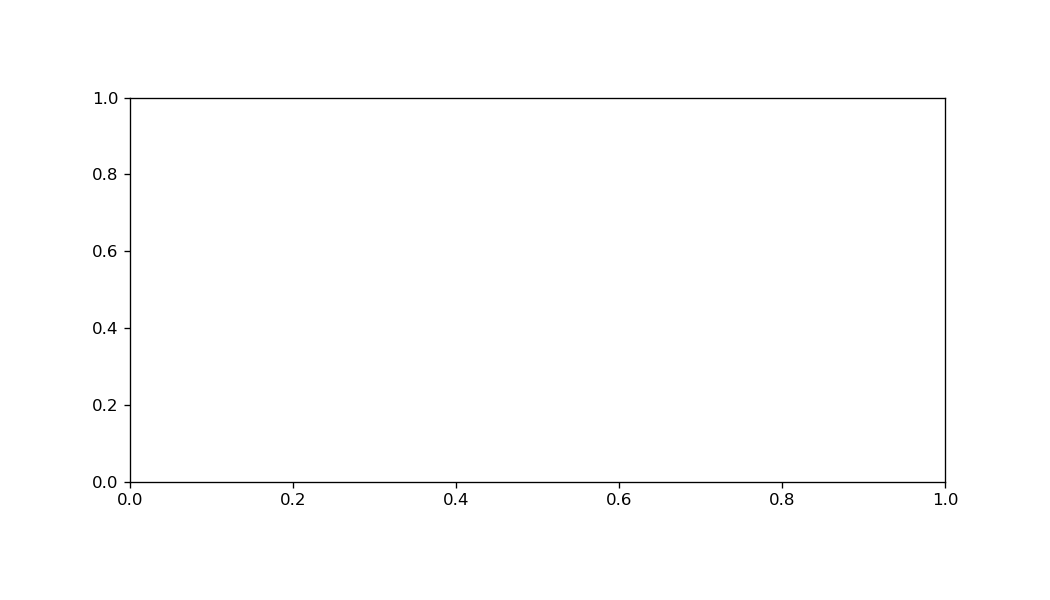

Output()

In [14]:
fig, ax = plt.subplots(figsize=(8.75, 5), dpi=120)

y_l0_KKmulti = widgets.FloatSlider(value=0.1, min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_l0_KK_multiplier')
y_X0_KKmulti = widgets.FloatSlider(value=0.1, min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_X0_KK_multiplier')
y_X_fmulti   = widgets.FloatSlider(value=18,  min=0., max=20,step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_X_fmultiplier')
y_T_fmulti   = widgets.FloatSlider(value=1.1,   min=0., max=10,step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_T_fmultiplier')
y_T_KKmulti  = widgets.FloatSlider(value=0.0018,min=0., max=0.005, step=1/1000001 ,layout=widgets.Layout(width='75%'), description='y_T_KKmultiplier')
y_T_rmulti   = widgets.FloatSlider(value=0.05, min=0., max=0.5, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_T_rmultiplier')

y_X_r = 1

GK = []
GKprime = []
GKinRCP = [90.04, 91.57, 93.10, 94.63, 96.16, 97.70, 99.27, 91.69, 91.58, 90.80, 89.48, 88.07, 86.61]
GKprimeinRCP = [1.37, 0.99, 0.67, 0.42, 0.23, 0.10, 0.02, 0.19, 1.33, 1.20, 1.49, 1.89, 2.36]

GKinLCP = [2.36, 1.89, 1.49, 1.20, 1.33, 0.19, 0.02, 0.10, 0.23, 0.42, 0.67, 0.99, 1.37]
GKprimeinLCP = [86.61, 88.07, 89.48, 90.80, 91.58, 91.69, 99.27, 99.70, 96.16, 94.63, 93.10, 91.57, 90.04]
    
Gratio = []
for i in range(13):
    # Gratio += [(GKinRCP[i]-GKprimeinRCP[i])/(GKinRCP[i]+GKprimeinRCP[i])]
    Gratio += [(GKprimeinLCP[i]-GKinLCP[i])/(GKprimeinLCP[i]+GKinLCP[i])]
    # Gratio += [1]

    
def need(y_l0_KKmulti, y_X0_KKmulti, y_X_fmulti, y_T_fmulti, y_T_KKmulti, y_T_rmulti):

    y_l0_KK = y_l0_KKmulti * y_X_r
    y_X0_KK = y_X0_KKmulti * y_X_r
    y_X_f   = y_X_fmulti   * y_X_r
    y_T_f   = y_T_fmulti   * y_X_r
    y_T_KK  = y_T_KKmulti  * y_X_r
    y_T_r   = y_T_rmulti   * y_X_r
    print("y_l0_KK = "+str(format(y_l0_KK,'.2f')))
    print("y_X0_KK = "+str(format(y_X0_KK,'.2f')))
    print("y_X_f = "+str(format(y_X_f,'.2f')))
    print("y_T_f = "+str(format(y_T_f,'.2f')))
    print("y_T_KK = "+str(format(y_T_KK,'.2f')))
    print("y_T_r = "+str(format(y_T_r,'.2f')))
    
    
    ax.cla()
    globals()['WP_and_TH'] = []
    globals()['onlyTR'] = []
    globals()['All'] = []
    for l in range(-6,7,1):
        globals()['WP_and_TH'] += [model_one_WP_function(l, y_l0_KK, y_X_r)]
        globals()['onlyTR']    += [onlyTR_fun(l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f, y_T_KK, y_T_r, Gratio[l+6])]
        globals()['All']       += [All_fun(l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f, y_T_KK, y_T_r, Gratio[l+6])]

    ax.plot( np.linspace(-6, 6, 13), globals()['WP_and_TH'], marker='v', linestyle='solid', markersize=8, color='magenta' ,linewidth=1, zorder=2)
    ax.plot( np.linspace(-6, 6, 13), globals()['All'], marker='s', linestyle='dashed', markersize=8, color='black' ,linewidth=1, zorder=2)
    ax.plot( np.linspace(-6, 6, 13), globals()['onlyTR'], marker='o', linestyle='dotted', markersize=8, color='mediumseagreen' ,linewidth=1, zorder=2)
    
    globals()['WP_and_TH_for_text'] = []
    for L in range(-6,7,2):
        globals()['WP_and_TH_for_text']       += [WP_and_TH_fun(L, y_l0_KK, y_X0_KK, y_x_r, y_X_f, y_T_f, Gratio[L+6])]
    for j, v in enumerate(globals()['WP_and_TH_for_text']):
        ax.text((j-3)*2, v+0.008, "%2.2f" %v, ha="center", fontsize=18)

    # globals()['All_for_text'] = []
    # for L in range(-6,7,2):
    #     globals()['All_for_text']       += [All_fun(L, y_l0_KK, y_X0_KK, y_x_r, y_X_f, y_T_f, y_T_KK, y_T_r, Gratio[L+6])]
    # for j, v in enumerate(globals()['All_for_text']):
    #     ax.text((j-3)*2, v+0.008, "%2.2f" %v, ha="center", fontsize=18)
        
    globals()['onlyTR_for_text'] = []
    for L in range(-6,7,2):
        globals()['onlyTR_for_text']       += [onlyTR_fun(L, y_l0_KK, y_X0_KK, y_x_r, y_X_f, y_T_f, y_T_KK, y_T_r, Gratio[L+6])]
    for j, v in enumerate(globals()['onlyTR_for_text']):
        ax.text((j-3)*2, v-0.02, "%2.3f" %v, ha="center", fontsize=18)
  
    ax.grid()
    # ax.set_title('η ', fontsize=16)
    ax.set_ylabel('DoVP', fontsize=20, rotation=90)
    ax.set_yticks(np.arange(0, 1.01, 1./25))
    ax.set_yticks(np.arange(0, 1.01, 1./100), minor=True)
    ax.set_ylim(0.68, 0.94)
    # ax.set_yticks(np.arange(-100, 1, 100/10))
    # ax.set_yticks(np.arange(-100, 1, 100/100), minor=True)
    # ax.set_ylim(-105, 0)
    ax.set_xlabel('$\ell$', fontsize=20)
    # ax.set_xticks(np.linspace(-6, 6, 13), [' ', ' ', ' ', ' ', ' ', ' ',' ', ' ', ' ', ' ', ' ', ' ', ' '])
    ax.set_xticks(np.linspace(-6, 6, 13), ['-6', '-5', '-4', '-3', '-2', '-1', '0', '1', '2', '3', '4', '5', '6'])
    # ax.set_xlim(-0.1, 6.7)
    ax.legend(['η$^\ell_{X}$(Model II)', 'η$^\ell_{tot}$(Model II)', 'η$^\ell_{T}$(Model II)'], fontsize=14, loc='lower center')
    ax.tick_params(axis='both', which='major', labelsize=20)
    

plt.tight_layout(pad=5.5)
# plt.tight_layout(pad=2)
# plt.subplots_adjust(left=0.1, right=0.9, 
#                     top=0.975, bottom=0.05, 
#                     wspace=0.4, hspace=0.028)
plt.show()

out = widgets.interactive_output(need, {'y_l0_KKmulti':y_l0_KKmulti, 'y_X0_KKmulti':y_X0_KKmulti, 'y_X_fmulti':y_X_fmulti, 'y_T_fmulti':y_T_fmulti, 'y_T_KKmulti':y_T_KKmulti, 'y_T_rmulti':y_T_rmulti})
ui = widgets.VBox([widgets.Label('coefficient:'), widgets.VBox([y_l0_KKmulti, y_X0_KKmulti, y_X_fmulti, y_T_fmulti, y_T_fmulti, y_T_KKmulti, y_T_rmulti]) ])
display(ui , out )

# 擬巴~~

In [26]:
def model_one_WP_function(l, y_l0_KK, y_X_r):
    y_l0_KK = y_l0_KK*(np.abs(l)+1)
    WP_TH = 1/(1+2*y_l0_KK/(y_X_r))
    return WP_TH

def model_two_WP_function(l, y_l0_KK, y_X_r, y_X_f):
    y_l0_KK = y_l0_KK*(np.abs(l)+1)
    alpha = 1/(1+2*y_l0_KK/(y_X_r+y_X_f))
    WP = alpha * 1
    return WP

def model_two_LOW_fun(l, y_l0_KK, y_X0_KK, y_X_r, y_X_f):
    LOW = 1/(1+2*y_X0_KK/y_X_r) * model_two_WP_function(l, y_l0_KK, y_X_r, y_X_f)
    return LOW

def model_two_Both_fun(l, y_l0_KK, y_X0_KK, y_X_r, y_X_f):
    Both = (y_X_f/(y_X_r+y_X_f))*model_two_LOW_fun(l, y_l0_KK, y_X0_KK, y_X_r, y_X_f) + (y_X_r/(y_X_r+y_X_f))*model_two_WP_function(l, y_l0_KK, y_X_r, y_X_f) 
    return Both

def model_three_WP_function(l, y_l0_KK, y_X_r, y_X_f, y_T_f):
    y_l0_KK = y_l0_KK*(np.abs(l)+1)
    WP = 1/(1+2*y_l0_KK/(y_X_r+y_X_f+y_T_f))
    return WP

def model_three_LOW_fun(l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f):
    LOW = 1/(1+2*y_X0_KK/(y_X_r+y_T_f)) * model_three_WP_function(l, y_l0_KK, y_X_r, y_X_f, y_T_f)
    return LOW

def model_three_Both_exciton_fun(l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f):
    Both = ((y_X_f/y_X_r)/(1+y_X_f/y_X_r+y_T_f/y_X_r))*model_three_LOW_fun(l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f) + ((1+y_T_f/y_X_r)/(1+y_X_f/y_X_r+y_T_f/y_X_r))*model_three_WP_function(l, y_l0_KK, y_X_r, y_X_f, y_T_f) 
    return Both

def model_three_Both_exciton_fun_formation_use(l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f):
    Both = ((y_X_f/y_T_f)/(1+y_X_f/y_T_f+y_X_r/y_T_f))*model_three_LOW_fun(l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f) + ((1+y_X_r/y_T_f)/(1+y_X_f/y_T_f+y_X_r/y_T_f))*model_three_WP_function(l, y_l0_KK, y_X_r, y_X_f, y_T_f) 
    return Both

def model_three_trion_fun(l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f, y_T_KK, y_T_r):
    onlyTR =  1/(1+2*y_T_KK/y_T_r) * model_three_Both_exciton_fun_formation_use(l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f)
    # onlyTR =  model_three_Both_exciton_fun(l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f)
    return onlyTR

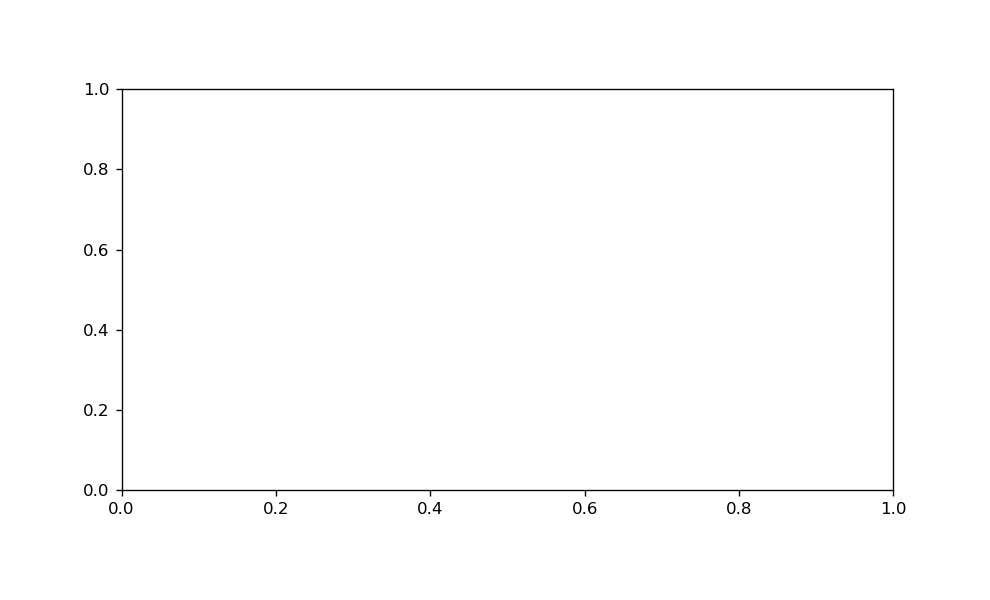

Output()

In [27]:
fig, ax = plt.subplots(figsize=(8.25, 5), dpi=120)

y_l0_KKmulti = widgets.FloatSlider(value=0.1, min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_l0_KK_multiplier')
y_X0_KKmulti = widgets.FloatSlider(value=0.1, min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_X0_KK_multiplier')
y_X_fmulti   = widgets.FloatSlider(value=10,  min=0., max=10,step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_X_fmultiplier')
y_T_fmulti   = widgets.FloatSlider(value=1,   min=0., max=10,step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_T_fmultiplier')
y_T_KKmulti  = widgets.FloatSlider(value=0.01,min=0., max=0.02, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_T_KKmultiplier')
y_T_rmulti   = widgets.FloatSlider(value=0.1, min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_T_rmultiplier')

y_X_r = 1

# GK = 1
# GKprime = 0
# Gratio_term = (GK-GKprime)/(GK+GKprime)

    
def need(y_l0_KKmulti, y_X0_KKmulti, y_X_fmulti, y_T_fmulti, y_T_KKmulti, y_T_rmulti):

    y_l0_KK = y_l0_KKmulti * y_X_r
    y_X0_KK = y_X0_KKmulti * y_X_r
    y_X_f   = y_X_fmulti   * y_X_r
    y_T_f   = y_T_fmulti   * y_X_r
    y_T_KK  = y_T_KKmulti  * y_X_r
    y_T_r   = y_T_rmulti   * y_X_r
    print("y_l0_KK = "+str(format(y_l0_KK,'.2f')))
    print("y_X0_KK = "+str(format(y_X0_KK,'.2f')))
    print("y_X_f = "+str(format(y_X_f,'.2f')))
    print("y_T_f = "+str(format(y_T_f,'.2f')))
    print("y_T_KK = "+str(format(y_T_KK,'.2f')))
    print("y_T_r = "+str(format(y_T_r,'.2f')))
    
    
    ax.cla()
    globals()['model_one'] = []
    globals()['model_two'] = []
    globals()['model_three'] = []
    for l in range(0,7,1):
        globals()['model_one']   += [model_one_WP_function(l, y_l0_KK, y_X_r)]
        globals()['model_two']   += [model_two_WP_function(l, y_l0_KK, y_X_r, y_X_f)]
        # globals()['model_two']   += [model_two_Both_fun(l, y_l0_KK, y_X0_KK, y_X_r, y_X_f)]
        globals()['model_three'] += [model_three_trion_fun(l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f, y_T_KK, y_T_r)]

    

    ax.plot( np.linspace(0, 6, 7), globals()['model_one'], marker='v', linestyle='solid', markersize=8, color='red' ,linewidth=1, zorder=2)
    ax.plot( np.linspace(0, 6, 7), globals()['model_two'], marker='s', linestyle='dashed', markersize=8, color='red' ,linewidth=1, zorder=2)
    # ax.plot( np.linspace(0, 6, 7), globals()['model_two'], marker='s', linestyle='dashed', markersize=8, color='black' ,linewidth=1, zorder=2)
    # ax.plot( np.linspace(0, 6, 7), globals()['model_three'], marker='o', linestyle='dotted', markersize=8, color='mediumseagreen' ,linewidth=1, zorder=2)
    
    for j, v in enumerate(globals()['model_one']):
        ax.text(j, v-0.08, "%2.2f" %v, ha="center", fontsize=20)
        # ax.text(j+0.4, v-0.08, "%2.2f" %v, ha="center", fontsize=20)
        
    for j, v in enumerate(globals()['model_two']):
        # ax.text(j, v+0.02, "%2.2f" %v, ha="center", fontsize=20)
        ax.text(j, v-0.08, "%2.2f" %v, ha="center", fontsize=20)
        # ax.text(j+0.4, v+0.01, "%2.2f" %v, ha="center", fontsize=20)
        
#     for j, v in enumerate(globals()['model_three']):
#         ax.text(j+0.4, v-0.025, "%2.2f" %v, ha="center", fontsize=20)
  
    ax.grid()
    # ax.set_title('η ', fontsize=16)
    # ax.set_title('Exciton DoVP', fontsize=16)
    # ax.set_title('Model II', fontsize=20)
    ax.set_ylabel('DoVP', fontsize=20, rotation=90)
    # ax.set_ylabel('η$_{T}$(%)', fontsize=16, rotation=90)
    ax.set_yticks(np.arange(0, 1.01, 1./10))
    ax.set_yticks(np.arange(0, 1.01, 1./100), minor=True)
    # ax.set_ylim(0.45, 0.95)
    # ax.set_yticks(np.arange(-100, 1, 100/10))
    # ax.set_yticks(np.arange(-100, 1, 100/100), minor=True)
    ax.set_ylim(0, 1)
    ax.set_xlabel('$\ell$', fontsize=20)
    # ax.set_xticks(np.linspace(0, 6, 7), [' ', ' ', ' ', ' ', ' ', ' ', ' '])
    ax.set_xticks(np.linspace(0, 6, 7), ['0', '1', '2', '3', '4', '5', '6'])
    ax.set_xlim(-0.5, 6.5)
    # ax.set_xlim(-0.2, 6.8)
    # ax.legend(['$η^{X,\ell}_{\sf{Model-I}}$', '$η^{X}_{\sf{Model-II}}$', '$η^{T}_{\sf{Model-III}}$'], fontsize=16, loc='lower left')
    ax.legend(['$η^{X,\ell}_{\sf{Model-I}}$', '$η^{X,\ell}_{\sf{Model-II}}$'], fontsize=16, loc='lower left')
    ax.tick_params(axis='both', which='major', labelsize=20)
    

plt.tight_layout(pad=5)
# plt.tight_layout(pad=2)
# plt.subplots_adjust(left=0.1, right=0.9, 
#                     top=0.975, bottom=0.05, 
#                     wspace=0.4, hspace=0.028)
plt.show()

out = widgets.interactive_output(need, {'y_l0_KKmulti':y_l0_KKmulti, 'y_X0_KKmulti':y_X0_KKmulti, 'y_X_fmulti':y_X_fmulti, 'y_T_fmulti':y_T_fmulti, 'y_T_KKmulti':y_T_KKmulti, 'y_T_rmulti':y_T_rmulti})
ui = widgets.VBox([widgets.Label('coefficient:'), widgets.VBox([y_l0_KKmulti, y_X0_KKmulti, y_X_fmulti, y_T_fmulti, y_T_KKmulti, y_T_rmulti]) ])
display(ui , out )

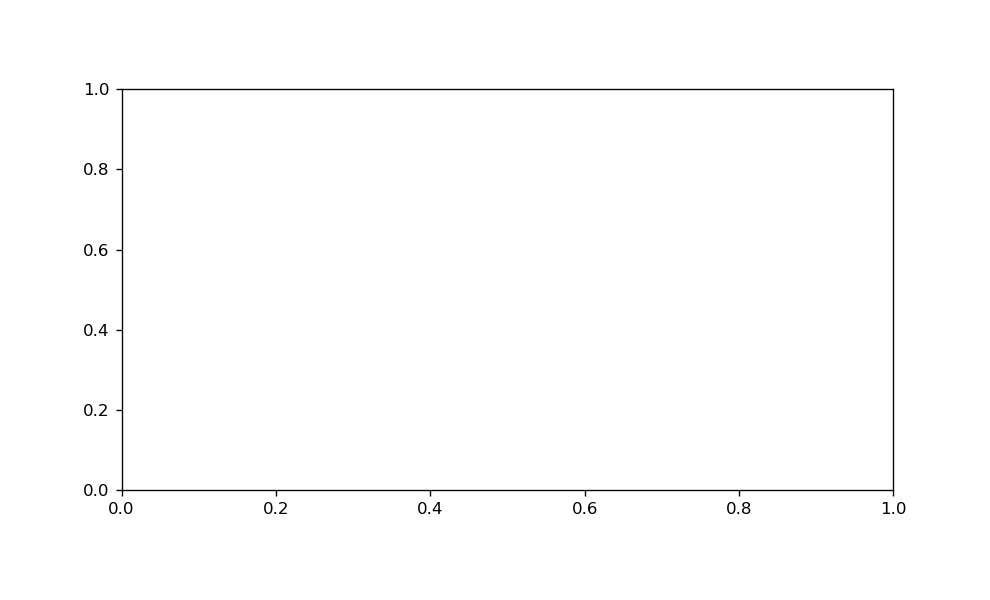

Output()

In [28]:
fig, ax = plt.subplots(figsize=(8.25, 5), dpi=120)

y_l0_KKmulti = widgets.FloatSlider(value=0.1, min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_l0_KK_multiplier')
y_X0_KKmulti = widgets.FloatSlider(value=0.1, min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_X0_KK_multiplier')
y_X_fmulti   = widgets.FloatSlider(value=10,  min=0., max=10,step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_X_fmultiplier')
y_T_fmulti   = widgets.FloatSlider(value=1,   min=0., max=10,step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_T_fmultiplier')
y_T_KKmulti  = widgets.FloatSlider(value=0.01,min=0., max=0.02, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_T_KKmultiplier')
y_T_rmulti   = widgets.FloatSlider(value=0.1, min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_T_rmultiplier')

y_X_r = 1

# GK = 1
# GKprime = 0
# Gratio_term = (GK-GKprime)/(GK+GKprime)

    
def need(y_l0_KKmulti, y_X0_KKmulti, y_X_fmulti, y_T_fmulti, y_T_KKmulti, y_T_rmulti):

    y_l0_KK = y_l0_KKmulti * y_X_r
    y_X0_KK = y_X0_KKmulti * y_X_r
    y_X_f   = y_X_fmulti   * y_X_r
    y_T_f   = y_T_fmulti   * y_X_r
    y_T_KK  = y_T_KKmulti  * y_X_r
    y_T_r   = y_T_rmulti   * y_X_r
    print("y_l0_KK = "+str(format(y_l0_KK,'.2f')))
    print("y_X0_KK = "+str(format(y_X0_KK,'.2f')))
    print("y_X_f = "+str(format(y_X_f,'.2f')))
    print("y_T_f = "+str(format(y_T_f,'.2f')))
    print("y_T_KK = "+str(format(y_T_KK,'.2f')))
    print("y_T_r = "+str(format(y_T_r,'.2f')))
    
    
    ax.cla()
    globals()['model_one'] = []
    globals()['model_two'] = []
    globals()['model_three'] = []
    for l in range(0,7,1):
        globals()['model_one']   += [model_one_WP_function(l, y_l0_KK, y_X_r)]
        # globals()['model_two']   += [model_two_WP_function(l, y_l0_KK, y_X_r, y_X_f)]
        globals()['model_two']   += [model_two_Both_fun(l, y_l0_KK, y_X0_KK, y_X_r, y_X_f)]
        globals()['model_three'] += [model_three_trion_fun(l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f, y_T_KK, y_T_r)]

    

    ax.plot( np.linspace(0, 6, 7), globals()['model_one'], marker='v', linestyle='solid', markersize=8, color='red' ,linewidth=1, zorder=2)
    # ax.plot( np.linspace(0, 6, 7), globals()['model_two'], marker='s', linestyle='dashed', markersize=8, color='red' ,linewidth=1, zorder=2)
    ax.plot( np.linspace(0, 6, 7), globals()['model_two'], marker='s', linestyle='dashed', markersize=8, color='black' ,linewidth=1, zorder=2)
    # ax.plot( np.linspace(0, 6, 7), globals()['model_three'], marker='o', linestyle='dotted', markersize=8, color='mediumseagreen' ,linewidth=1, zorder=2)
    
    L0 = globals()['model_one'][0]
    globals()['model_one'][0]=-0.5
    for j, v in enumerate(globals()['model_one']):
        ax.text(j, v-0.08, "%2.2f" %v, ha="center", fontsize=20)
        # ax.text(j+0.4, v-0.08, "%2.2f" %v, ha="center", fontsize=20)
        
    for j, v in enumerate(globals()['model_two']):
        ax.text(j, v+0.02, "%2.2f" %v, ha="center", fontsize=20)
        # ax.text(j, v-0.08, "%2.2f" %v, ha="center", fontsize=20)
        # ax.text(j+0.4, v+0.01, "%2.2f" %v, ha="center", fontsize=20)
        
#     for j, v in enumerate(globals()['model_three']):
#         ax.text(j+0.4, v-0.025, "%2.2f" %v, ha="center", fontsize=20)
  
    ax.grid()
    # ax.set_title('η ', fontsize=16)
    # ax.set_title('Exciton DoVP', fontsize=16)
    # ax.set_title('Model II', fontsize=20)
    ax.set_ylabel('DoVP', fontsize=20, rotation=90)
    # ax.set_ylabel('η$_{T}$(%)', fontsize=16, rotation=90)
    ax.set_yticks(np.arange(0, 1.01, 1./10))
    ax.set_yticks(np.arange(0, 1.01, 1./100), minor=True)
    # ax.set_ylim(0.45, 0.95)
    # ax.set_yticks(np.arange(-100, 1, 100/10))
    # ax.set_yticks(np.arange(-100, 1, 100/100), minor=True)
    ax.set_ylim(0, 1)
    ax.set_xlabel('$\ell$', fontsize=20)
    # ax.set_xticks(np.linspace(0, 6, 7), [' ', ' ', ' ', ' ', ' ', ' ', ' '])
    ax.set_xticks(np.linspace(0, 6, 7), ['0', '1', '2', '3', '4', '5', '6'])
    ax.set_xlim(-0.5, 6.5)
    # ax.set_xlim(-0.2, 6.8)
    # ax.legend(['$η^{X,\ell}_{\sf{Model-I}}$', '$η^{X}_{\sf{Model-II}}$', '$η^{T}_{\sf{Model-III}}$'], fontsize=16, loc='lower left')
    ax.legend(['$η^{X,\ell}_{\sf{Model-I}}$', '$η^{X}_{\sf{Model-II}}$'], fontsize=16, loc='lower left')
    ax.tick_params(axis='both', which='major', labelsize=20)
    

plt.tight_layout(pad=5)
# plt.tight_layout(pad=2)
# plt.subplots_adjust(left=0.1, right=0.9, 
#                     top=0.975, bottom=0.05, 
#                     wspace=0.4, hspace=0.028)
plt.show()

out = widgets.interactive_output(need, {'y_l0_KKmulti':y_l0_KKmulti, 'y_X0_KKmulti':y_X0_KKmulti, 'y_X_fmulti':y_X_fmulti, 'y_T_fmulti':y_T_fmulti, 'y_T_KKmulti':y_T_KKmulti, 'y_T_rmulti':y_T_rmulti})
ui = widgets.VBox([widgets.Label('coefficient:'), widgets.VBox([y_l0_KKmulti, y_X0_KKmulti, y_X_fmulti, y_T_fmulti, y_T_KKmulti, y_T_rmulti]) ])
display(ui , out )

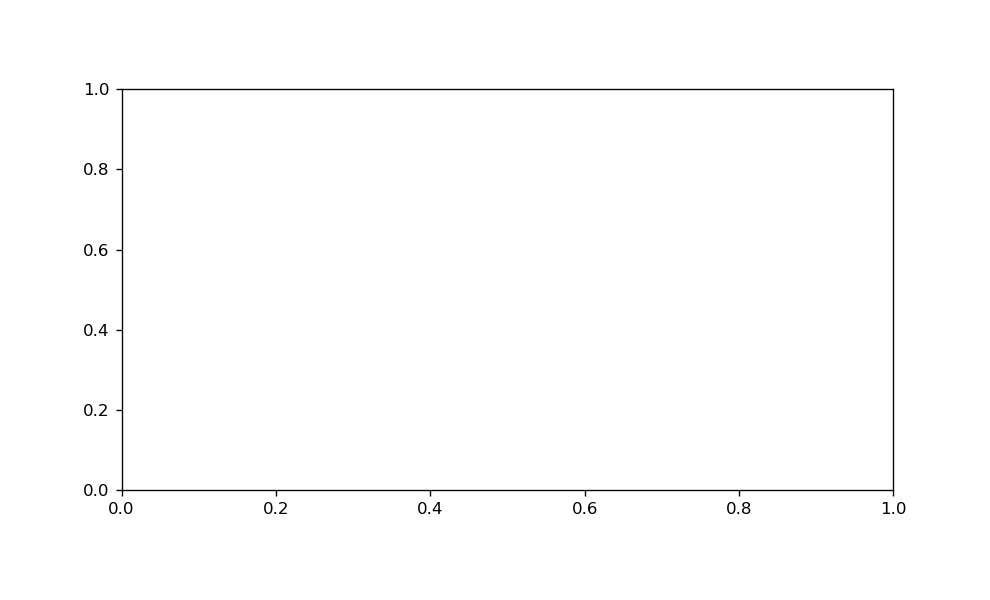

Output()

In [18]:
fig, ax = plt.subplots(figsize=(8.25, 5), dpi=120)

y_l0_KKmulti = widgets.FloatSlider(value=0.1, min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_l0_KK_multiplier')
y_X0_KKmulti = widgets.FloatSlider(value=0.1, min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_X0_KK_multiplier')
y_X_fmulti   = widgets.FloatSlider(value=10,  min=0., max=10,step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_X_fmultiplier')
y_T_fmulti   = widgets.FloatSlider(value=1,   min=0., max=10,step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_T_fmultiplier')
y_T_KKmulti  = widgets.FloatSlider(value=0.01,min=0., max=0.02, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_T_KKmultiplier')
y_T_rmulti   = widgets.FloatSlider(value=0.1, min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_T_rmultiplier')

y_X_r = 1

# GK = 1
# GKprime = 0
# Gratio_term = (GK-GKprime)/(GK+GKprime)

    
def need(y_l0_KKmulti, y_X0_KKmulti, y_X_fmulti, y_T_fmulti, y_T_KKmulti, y_T_rmulti):

    y_l0_KK = y_l0_KKmulti * y_X_r
    y_X0_KK = y_X0_KKmulti * y_X_r
    y_X_f   = y_X_fmulti   * y_X_r
    y_T_f   = y_T_fmulti   * y_X_r
    y_T_KK  = y_T_KKmulti  * y_X_r
    y_T_r   = y_T_rmulti   * y_X_r
    print("y_l0_KK = "+str(format(y_l0_KK,'.2f')))
    print("y_X0_KK = "+str(format(y_X0_KK,'.2f')))
    print("y_X_f = "+str(format(y_X_f,'.2f')))
    print("y_T_f = "+str(format(y_T_f,'.2f')))
    print("y_T_KK = "+str(format(y_T_KK,'.2f')))
    print("y_T_r = "+str(format(y_T_r,'.2f')))
    
    
    ax.cla()
    globals()['model_one'] = []
    globals()['model_two'] = []
    globals()['model_three'] = []
    for l in range(0,7,1):
        globals()['model_one']   += [model_one_WP_function(l, y_l0_KK, y_X_r)]
        # globals()['model_two']   += [model_two_WP_function(l, y_l0_KK, y_X_r, y_X_f)]
        globals()['model_two']   += [model_two_Both_fun(l, y_l0_KK, y_X0_KK, y_X_r, y_X_f)]
        globals()['model_three'] += [model_three_trion_fun(l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f, y_T_KK, y_T_r)]

    

    ax.plot( np.linspace(0, 6, 7), globals()['model_one'], marker='v', linestyle='solid', markersize=8, color='red' ,linewidth=1, zorder=2)
    # ax.plot( np.linspace(0, 6, 7), globals()['model_two'], marker='s', linestyle='dashed', markersize=8, color='red' ,linewidth=1, zorder=2)
    ax.plot( np.linspace(0, 6, 7), globals()['model_two'], marker='s', linestyle='dashed', markersize=8, color='black' ,linewidth=1, zorder=2)
    ax.plot( np.linspace(0, 6, 7), globals()['model_three'], marker='o', linestyle='dotted', markersize=8, color='mediumseagreen' ,linewidth=1, zorder=2)
    
    L0 = globals()['model_one'][0]
    globals()['model_one'][0]=-0.5
    for j, v in enumerate(globals()['model_one']):
        # ax.text(j, v-0.08, "%2.2f" %v, ha="center", fontsize=20)
        ax.text(j+0.4, v-0.08, "%2.2f" %v, ha="center", fontsize=20)
        
    for j, v in enumerate(globals()['model_two']):
        # ax.text(j, v+0.02, "%2.2f" %v, ha="center", fontsize=20)
        # ax.text(j, v-0.08, "%2.2f" %v, ha="center", fontsize=20)
        ax.text(j+0.4, v+0.01, "%2.2f" %v, ha="center", fontsize=20)
        
    for j, v in enumerate(globals()['model_three']):
        ax.text(j+0.4, v-0.025, "%2.2f" %v, ha="center", fontsize=20)
  
    ax.grid()
    # ax.set_title('η ', fontsize=16)
    # ax.set_title('Exciton DoVP', fontsize=16)
    # ax.set_title('Model II', fontsize=20)
    ax.set_ylabel('DoVP', fontsize=20, rotation=90)
    # ax.set_ylabel('η$_{T}$(%)', fontsize=16, rotation=90)
    ax.set_yticks(np.arange(0, 1.01, 1./10))
    ax.set_yticks(np.arange(0, 1.01, 1./100), minor=True)
    # ax.set_ylim(0.45, 0.95)
    # ax.set_yticks(np.arange(-100, 1, 100/10))
    # ax.set_yticks(np.arange(-100, 1, 100/100), minor=True)
    ax.set_ylim(0, 1)
    ax.set_xlabel('$\ell$', fontsize=20)
    # ax.set_xticks(np.linspace(0, 6, 7), [' ', ' ', ' ', ' ', ' ', ' ', ' '])
    ax.set_xticks(np.linspace(0, 6, 7), ['0', '1', '2', '3', '4', '5', '6'])
    # ax.set_xlim(-0.5, 6.5)
    ax.set_xlim(-0.2, 6.8)
    ax.legend(['$η^{X,\ell}_{\sf{Model-I}}$', '$η^{X}_{\sf{Model-II}}$', '$η^{T}_{\sf{Model-III}}$'], fontsize=16, loc='lower left')
    # ax.legend(['$η^{X,\ell}_{\sf{Model-I}}$', '$η^{X}_{\sf{Model-II}}$'], fontsize=16, loc='lower left')
    ax.tick_params(axis='both', which='major', labelsize=20)
    

plt.tight_layout(pad=5)
# plt.tight_layout(pad=2)
# plt.subplots_adjust(left=0.1, right=0.9, 
#                     top=0.975, bottom=0.05, 
#                     wspace=0.4, hspace=0.028)
plt.show()

out = widgets.interactive_output(need, {'y_l0_KKmulti':y_l0_KKmulti, 'y_X0_KKmulti':y_X0_KKmulti, 'y_X_fmulti':y_X_fmulti, 'y_T_fmulti':y_T_fmulti, 'y_T_KKmulti':y_T_KKmulti, 'y_T_rmulti':y_T_rmulti})
ui = widgets.VBox([widgets.Label('coefficient:'), widgets.VBox([y_l0_KKmulti, y_X0_KKmulti, y_X_fmulti, y_T_fmulti, y_T_KKmulti, y_T_rmulti]) ])
display(ui , out )

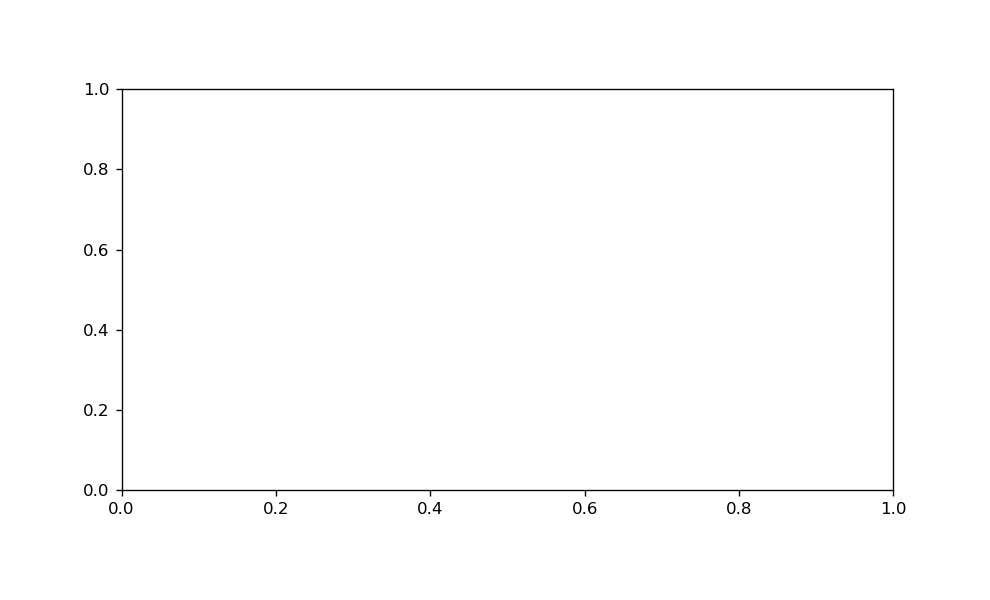

Output()

In [29]:
fig, ax = plt.subplots(figsize=(8.25, 5), dpi=120)

y_l0_KKmulti = widgets.FloatSlider(value=0.1, min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_l0_KK_multiplier')
y_X0_KKmulti = widgets.FloatSlider(value=0.1, min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_X0_KK_multiplier')
y_X_fmulti   = widgets.FloatSlider(value=10,  min=0., max=10,step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_X_fmultiplier')
y_T_fmulti   = widgets.FloatSlider(value=1,   min=0., max=10,step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_T_fmultiplier')
y_T_KKmulti  = widgets.FloatSlider(value=0.01,min=0., max=0.02, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_T_KKmultiplier')
y_T_rmulti   = widgets.FloatSlider(value=0.1, min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_T_rmultiplier')

y_X_r = 1
    
def need(y_l0_KKmulti, y_X0_KKmulti, y_X_fmulti, y_T_fmulti, y_T_KKmulti, y_T_rmulti):

    y_l0_KK = y_l0_KKmulti * y_X_r
    y_X0_KK = y_X0_KKmulti * y_X_r
    y_X_f   = y_X_fmulti   * y_X_r
    y_T_f   = y_T_fmulti   * y_X_r
    y_T_KK  = y_T_KKmulti  * y_X_r
    y_T_r   = y_T_rmulti   * y_X_r
    print("y_l0_KK = "+str(format(y_l0_KK,'.2f')))
    print("y_X0_KK = "+str(format(y_X0_KK,'.2f')))
    print("y_X_f = "+str(format(y_X_f,'.2f')))
    print("y_T_f = "+str(format(y_T_f,'.2f')))
    print("y_T_KK = "+str(format(y_T_KK,'.2f')))
    print("y_T_r = "+str(format(y_T_r,'.2f')))
    
    
    ax.cla()
    globals()['fix'] = []
    globals()['model_three'] = []
    globals()['model_one'] = []
    for l in range(0,7,1):
        globals()['fix']   += [1]
        globals()['model_three'] += [model_three_Both_exciton_fun(l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f)]
        globals()['model_one']   += [model_one_WP_function(l, y_l0_KK, y_X_r)]


    ax.plot( np.linspace(0, 6, 7), globals()['fix'], marker='o', linestyle='-.', markersize=10, color='red', markeredgecolor='red', markerfacecolor='white' ,linewidth=2, zorder=2)
    ax.plot( np.linspace(0, 6, 7), globals()['model_three'], marker='o', linestyle='dashed', markersize=8, color='black' ,linewidth=1, zorder=2)
    ax.plot( np.linspace(0, 6, 7), globals()['model_one'], marker='o', linestyle='solid', markersize=8, color='red' ,linewidth=1, zorder=2)
  
    ax.grid()
    # ax.set_title('η ', fontsize=16)
    # ax.set_title('Exciton DoVP', fontsize=16)
    # ax.set_title('Model II', fontsize=20)
    ax.set_ylabel('DoVP', fontsize=20, rotation=90)
    # ax.set_ylabel('η$_{T}$(%)', fontsize=16, rotation=90)
    ax.set_yticks(np.arange(0, 1.01, 1./5))
    ax.set_yticks(np.arange(0, 1.01, 1./25), minor=True)
    # ax.set_ylim(0.45, 0.95)
    # ax.set_yticks(np.arange(-100, 1, 100/10))
    # ax.set_yticks(np.arange(-100, 1, 100/100), minor=True)
    ax.set_ylim(0, 1.1)
    ax.set_xlabel('$\ell$', fontsize=20)
    # ax.set_xticks(np.linspace(0, 6, 7), [' ', ' ', ' ', ' ', ' ', ' ', ' '])
    ax.set_xticks(np.linspace(0, 6, 7), ['0', '1', '2', '3', '4', '5', '6'])
    # ax.set_xlim(-0.5, 6.5)
    ax.set_xlim(-0.2, 6.2)
    ax.tick_params(axis='both', which='major', labelsize=20)
    

plt.tight_layout(pad=5)
# plt.tight_layout(pad=2)
# plt.subplots_adjust(left=0.1, right=0.9, 
#                     top=0.975, bottom=0.05, 
#                     wspace=0.4, hspace=0.028)
plt.show()

out = widgets.interactive_output(need, {'y_l0_KKmulti':y_l0_KKmulti, 'y_X0_KKmulti':y_X0_KKmulti, 'y_X_fmulti':y_X_fmulti, 'y_T_fmulti':y_T_fmulti, 'y_T_KKmulti':y_T_KKmulti, 'y_T_rmulti':y_T_rmulti})
ui = widgets.VBox([widgets.Label('coefficient:'), widgets.VBox([y_l0_KKmulti, y_X0_KKmulti, y_X_fmulti, y_T_fmulti, y_T_KKmulti, y_T_rmulti]) ])
display(ui , out )

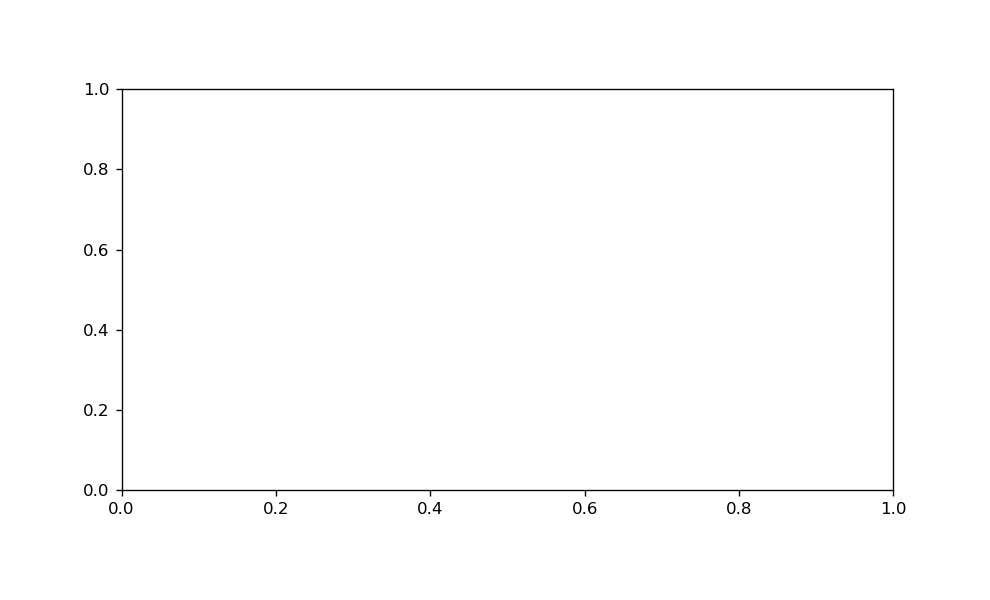

Output()

In [21]:
fig, ax = plt.subplots(figsize=(8.25, 5), dpi=120)

y_l0_KKmulti = widgets.FloatSlider(value=0.1, min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_l0_KK_multiplier')
y_X0_KKmulti = widgets.FloatSlider(value=0.1, min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_X0_KK_multiplier')
y_X_fmulti   = widgets.FloatSlider(value=10,  min=0., max=10,step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_X_fmultiplier')
y_T_fmulti   = widgets.FloatSlider(value=1,   min=0., max=10,step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_T_fmultiplier')
y_T_KKmulti  = widgets.FloatSlider(value=0.01,min=0., max=0.02, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_T_KKmultiplier')
y_T_rmulti   = widgets.FloatSlider(value=0.1, min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_T_rmultiplier')

y_X_r = 1
    
def need(y_l0_KKmulti, y_X0_KKmulti, y_X_fmulti, y_T_fmulti, y_T_KKmulti, y_T_rmulti):

    y_l0_KK = y_l0_KKmulti * y_X_r
    y_X0_KK = y_X0_KKmulti * y_X_r
    y_X_f   = y_X_fmulti   * y_X_r
    y_T_f   = y_T_fmulti   * y_X_r
    y_T_KK  = y_T_KKmulti  * y_X_r
    y_T_r   = y_T_rmulti   * y_X_r
    print("y_l0_KK = "+str(format(y_l0_KK,'.2f')))
    print("y_X0_KK = "+str(format(y_X0_KK,'.2f')))
    print("y_X_f = "+str(format(y_X_f,'.2f')))
    print("y_T_f = "+str(format(y_T_f,'.2f')))
    print("y_T_KK = "+str(format(y_T_KK,'.2f')))
    print("y_T_r = "+str(format(y_T_r,'.2f')))
    
    
    ax.cla()
    globals()['fix'] = []
    globals()['model_three'] = []
    globals()['model_one'] = []
    for l in range(0,7,1):
        globals()['fix']   += [1]
        globals()['model_three'] += [model_three_Both_exciton_fun(l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f)]
        globals()['model_one']   += [model_one_WP_function(l, y_l0_KK, y_X_r)]


    ax.plot( np.linspace(0, 6, 7), globals()['fix'], marker='o', linestyle='-.', markersize=10, color='red', markeredgecolor='red', markerfacecolor='white' ,linewidth=2, zorder=2)
    ax.plot( np.linspace(0, 6, 7), globals()['model_three'], marker='o', linestyle='dashed', markersize=8, color='black' ,linewidth=1, zorder=2)
    ax.plot( np.linspace(0, 6, 7), globals()['model_one'], marker='o', linestyle='solid', markersize=8, color='red' ,linewidth=1, zorder=2)
  
    ax.grid()
    # ax.set_title('η ', fontsize=16)
    # ax.set_title('Exciton DoVP', fontsize=16)
    # ax.set_title('Model II', fontsize=20)
    ax.set_ylabel('DoVP', fontsize=20, rotation=90)
    # ax.set_ylabel('η$_{T}$(%)', fontsize=16, rotation=90)
    ax.set_yticks(np.arange(0.3, 1.01, 0.1))
    ax.set_yticks(np.arange(0.3, 1.01, 0.05), minor=True)
    # ax.set_ylim(0.45, 0.95)
    ax.set_ylim(0.3, 1.1)
    ax.set_xlabel('$\ell$', fontsize=20)
    # ax.set_xticks(np.linspace(0, 6, 7), [' ', ' ', ' ', ' ', ' ', ' ', ' '])
    ax.set_xticks(np.linspace(0, 6, 7), ['0', '1', '2', '3', '4', '5', '6'])
    # ax.set_xlim(-0.5, 6.5)
    ax.set_xlim(-0.2, 6.2)
    ax.tick_params(axis='both', which='major', labelsize=20)
    

plt.tight_layout(pad=5)
# plt.tight_layout(pad=2)
# plt.subplots_adjust(left=0.1, right=0.9, 
#                     top=0.975, bottom=0.05, 
#                     wspace=0.4, hspace=0.028)
plt.show()

out = widgets.interactive_output(need, {'y_l0_KKmulti':y_l0_KKmulti, 'y_X0_KKmulti':y_X0_KKmulti, 'y_X_fmulti':y_X_fmulti, 'y_T_fmulti':y_T_fmulti, 'y_T_KKmulti':y_T_KKmulti, 'y_T_rmulti':y_T_rmulti})
ui = widgets.VBox([widgets.Label('coefficient:'), widgets.VBox([y_l0_KKmulti, y_X0_KKmulti, y_X_fmulti, y_T_fmulti, y_T_KKmulti, y_T_rmulti]) ])
display(ui , out )

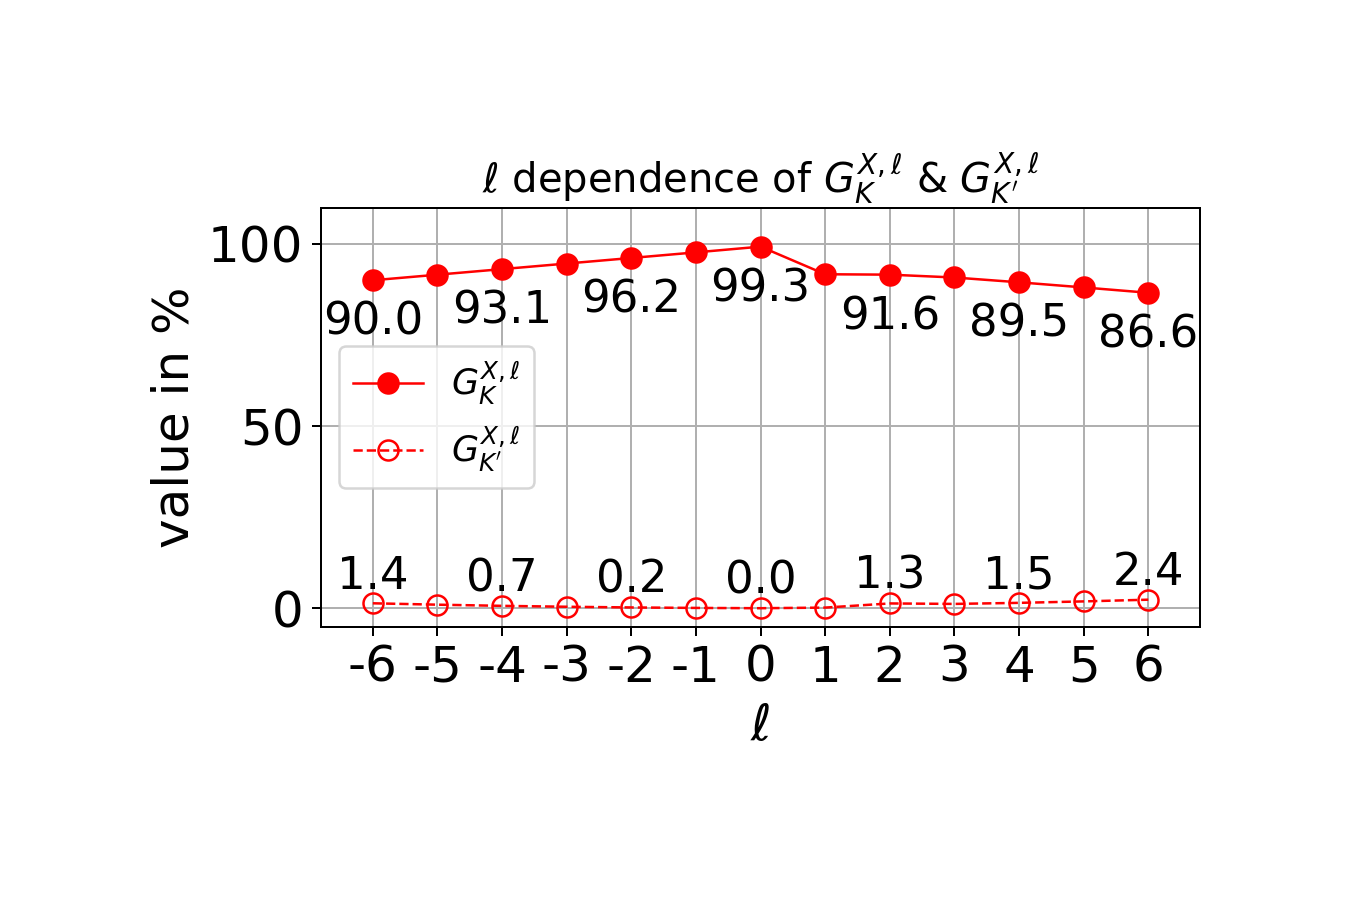

In [22]:
fig, ax = plt.subplots(figsize=(7.5, 5), dpi=180)

GKinRCP = [90.04, 91.57, 93.10, 94.63, 96.16, 97.70, 99.27, 91.69, 91.58, 90.80, 89.48, 88.07, 86.61]
GKprimeinRCP = [1.37, 0.99, 0.67, 0.42, 0.23, 0.10, 0.02, 0.19, 1.33, 1.20, 1.49, 1.89, 2.36]

GKinLCP = [2.36, 1.89, 1.49, 1.20, 1.33, 0.19, 0.02, 0.10, 0.23, 0.42, 0.67, 0.99, 1.37]
GKprimeinLCP = [86.61, 88.07, 89.48, 90.80, 91.58, 91.69, 99.27, 99.70, 96.16, 94.63, 93.10, 91.57, 90.04]
       
ax.cla()


ax.plot( np.linspace(-6, 6, 13), globals()['GKinRCP'], marker='o', linestyle='solid', markersize=8, color='red' ,linewidth=1, zorder=2)
ax.plot( np.linspace(-6, 6, 13), globals()['GKprimeinRCP'], marker='o', linestyle='dashed', markersize=8, color='red', markeredgecolor='red', markerfacecolor='none' ,linewidth=1, zorder=2)

globals()['G_data_for_text'] = []
for L in range(-6,7,2):
    globals()['G_data_for_text'] += [GKinRCP[L+6]]
for j, v in enumerate(globals()['G_data_for_text']):
    ax.text((j-3)*2, v-15, "%2.1f" %v, ha="center", fontsize=18)
    
globals()['G_data_for_text'] = []
for L in range(-6,7,2):
    globals()['G_data_for_text'] += [GKprimeinRCP[L+6]]
for j, v in enumerate(globals()['G_data_for_text']):
    ax.text((j-3)*2, v+4, "%2.1f" %v, ha="center", fontsize=18)


ax.grid()
ax.set_title("$\ell$ dependence of $G^{X, \ell}_{K}$ & $G^{X, \ell}_{K'}$", fontsize=16)
ax.set_ylabel("value in %", fontsize=20, rotation=90)
# ax.set_yticks(np.arange(0, 110, 110/22))
# ax.set_yticks(np.arange(0, 110, 110/110), minor=True)
ax.set_ylim(-5, 110)
ax.set_xlabel('$\ell$', fontsize=20)
# ax.set_xticks(np.linspace(-6, 6, 13), [' ', ' ', ' ', ' ', ' ', ' ',' ', ' ', ' ', ' ', ' ', ' ', ' '])
ax.set_xticks(np.linspace(-6, 6, 13), ['-6', '-5', '-4', '-3', '-2', '-1', '0', '1', '2', '3', '4', '5', '6'])
ax.set_xlim(-6.8, 6.8)
ax.legend(["$G^{X, \ell}_{K}$" , "$G^{X, \ell}_{K'}$"], fontsize=14, loc='center left')
ax.tick_params(axis='both', which='major', labelsize=20)


plt.tight_layout(pad=6)
plt.show()

[97.00251613609014, 97.8608470181504, 98.57097152607443, 99.1162546028406, 99.52277207179168, 99.7955010224949, 99.9597139691812, 99.58641706573792, 97.13701431492842, 97.39130434782608, 96.72419478949105, 95.79813250333481, 94.69484095762617]


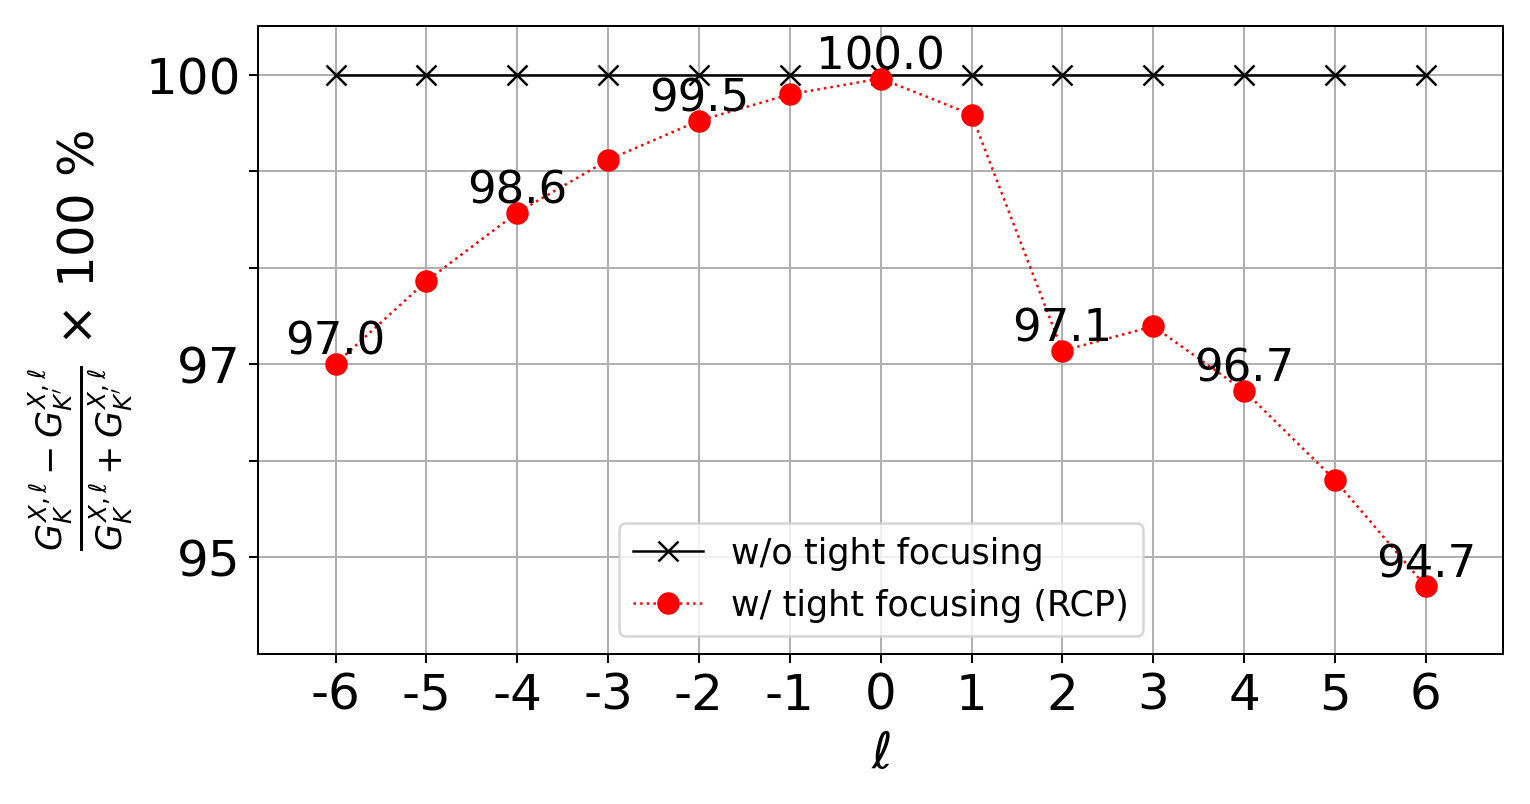

In [23]:
# fig, ax = plt.subplots(figsize=(8.5, 5.06), dpi=180)
fig, ax = plt.subplots(figsize=(8.5, 4.47), dpi=180)

GKinRCP = [90.04, 91.57, 93.10, 94.63, 96.16, 97.70, 99.27, 91.69, 91.58, 90.80, 89.48, 88.07, 86.61]
GKprimeinRCP = [1.37, 0.99, 0.67, 0.42, 0.23, 0.10, 0.02, 0.19, 1.33, 1.20, 1.49, 1.89, 2.36]

GKinLCP = [2.36, 1.89, 1.49, 1.20, 1.33, 0.19, 0.02, 0.10, 0.23, 0.42, 0.67, 0.99, 1.37]
GKprimeinLCP = [86.61, 88.07, 89.48, 90.80, 91.58, 91.69, 99.27, 99.70, 96.16, 94.63, 93.10, 91.57, 90.04]
    
Gratio = []
for i in range(13):
    Gratio += [(GKinRCP[i]-GKprimeinRCP[i])/(GKinRCP[i]+GKprimeinRCP[i]) * 100]
    # Gratio += [-(GKinLCP[i]-GKprimeinLCP[i])/(GKinLCP[i]+GKprimeinLCP[i]) * 100] 
print(Gratio)
ax.cla()

ax.plot( np.linspace(-6, 6, 13), np.linspace(-6, 6, 13)*0+100, marker='x', linestyle='solid', markersize=8, markeredgecolor='black', color='black' ,linewidth=1, zorder=2)
ax.plot( np.linspace(-6, 6, 13), globals()['Gratio'], marker='o', linestyle='dotted', markersize=8, color='red' ,linewidth=1, zorder=2)

globals()['G_data_for_text'] = []
for L in range(-6,7,2):
    globals()['G_data_for_text'] += [Gratio[L+6]]
for j, v in enumerate(globals()['G_data_for_text']):
    ax.text((j-3)*2, v+0.1, "%2.1f" %v, ha="center", fontsize=18)


ax.grid()
# ax.set_title(r"$\frac{G^{X, \ell}_{K}-G^{X, \ell}_{K'}}{G^{X, \ell}_{K}+G^{X, \ell}_{K'}}$ for RCP case", fontsize=20)
# ax.set_title(r"Quadratic fitting of $\frac{G^{X, \ell}_{K}-G^{X, \ell}_{K'}}{G^{X, \ell}_{K}+G^{X, \ell}_{K'}}$", fontsize=20)
ax.set_ylabel(r"$\frac{G^{X, \ell}_{K}-G^{X, \ell}_{K'}}{G^{X, \ell}_{K}+G^{X, \ell}_{K'}}$ $\times$ 100 %", fontsize=20, rotation=90)
# ax.set_yticks(np.arange(0, 110, 110/22))
# ax.set_yticks(np.arange(0, 110, 110/110), minor=True)
ax.set_yticks(np.arange(95, 101, 5/5))
ax.set_yticks(np.arange(95, 101, 5/1), minor=True)
ax.set_yticks(np.arange(95, 101, 5/5), ['95', ' ', '97', ' ', ' ', '100'])
ax.set_ylim(94, 100.5)
ax.set_xlabel('$\ell$', fontsize=20)
# ax.set_xticks(np.linspace(-6, 6, 13), [' ', ' ', ' ', ' ', ' ', ' ',' ', ' ', ' ', ' ', ' ', ' ', ' '])
ax.set_xticks(np.linspace(-6, 6, 13), ['-6', '-5', '-4', '-3', '-2', '-1', '0', '1', '2', '3', '4', '5', '6'])
ax.set_xlim(-6.85, 6.85)
ax.tick_params(axis='both', which='major', labelsize=20)

# x = np.linspace(-6, 6, 100)
# ax.plot(x ,-(0.08)*x**2+99.9597139691812, linestyle='solid', color='black')
# ax.plot(x ,-(0.098)*x**2+98.3, linestyle='dotted', color='black')

# ax.legend([r"$\frac{G^{X, \ell}_{K}-G^{X, \ell}_{K'}}{G^{X, \ell}_{K}+G^{X, \ell}_{K'}}$", "-0.080$\ell^2$+99.9", "-0.098$\ell^2$+98.3"], fontsize=14, loc='lower center')
ax.legend(["w/o tight focusing", "w/ tight focusing (RCP)"], fontsize=14, loc='lower center')


plt.tight_layout()
plt.show()

In [24]:
np.arange(95, 101, 5/5)

array([ 95.,  96.,  97.,  98.,  99., 100.])

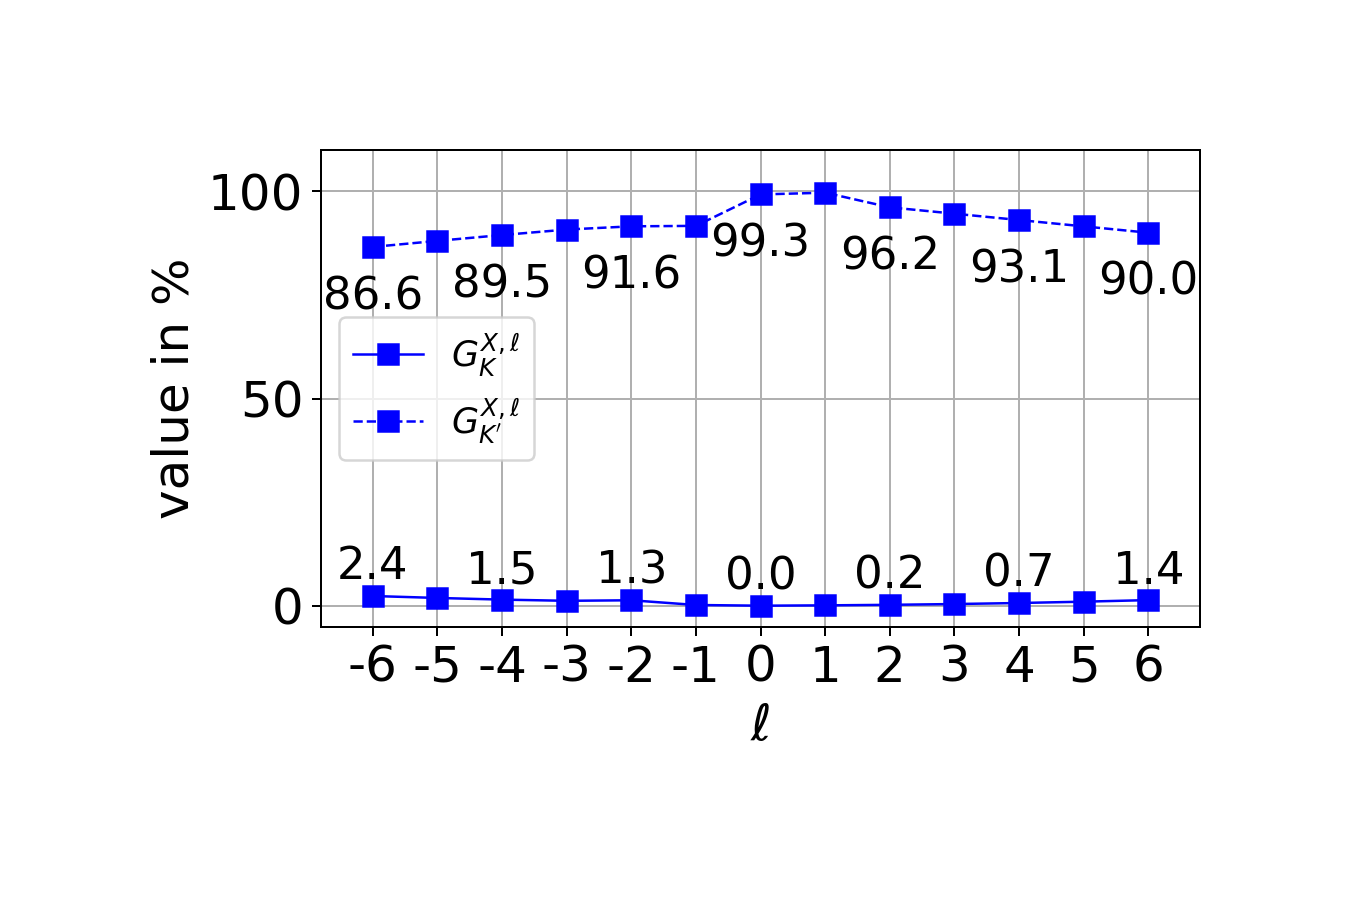

In [25]:
fig, ax = plt.subplots(figsize=(7.5, 5), dpi=180)

GKinRCP = [90.04, 91.57, 93.10, 94.63, 96.16, 97.70, 99.27, 91.69, 91.58, 90.80, 89.48, 88.07, 86.61]
GKprimeinRCP = [1.37, 0.99, 0.67, 0.42, 0.23, 0.10, 0.02, 0.19, 1.33, 1.20, 1.49, 1.89, 2.36]

GKinLCP = [2.36, 1.89, 1.49, 1.20, 1.33, 0.19, 0.02, 0.10, 0.23, 0.42, 0.67, 0.99, 1.37]
GKprimeinLCP = [86.61, 88.07, 89.48, 90.80, 91.58, 91.69, 99.27, 99.70, 96.16, 94.63, 93.10, 91.57, 90.04]
       
ax.cla()


ax.plot( np.linspace(-6, 6, 13), globals()['GKinLCP'], marker='s', linestyle='solid', markersize=8, color='blue' ,linewidth=1, zorder=2)
ax.plot( np.linspace(-6, 6, 13), globals()['GKprimeinLCP'], marker='s', linestyle='dashed', markersize=8, color='blue' ,linewidth=1, zorder=2)

globals()['G_data_for_text'] = []
for L in range(-6,7,2):
    globals()['G_data_for_text'] += [GKinLCP[L+6]]
for j, v in enumerate(globals()['G_data_for_text']):
    ax.text((j-3)*2, v+4, "%2.1f" %v, ha="center", fontsize=18)
    
globals()['G_data_for_text'] = []
for L in range(-6,7,2):
    globals()['G_data_for_text'] += [GKprimeinLCP[L+6]]
for j, v in enumerate(globals()['G_data_for_text']):
    ax.text((j-3)*2, v-15, "%2.1f" %v, ha="center", fontsize=18)


ax.grid()
# ax.set_title("$G^{X, \ell}_{K}$ & $G^{X, \ell}_{K'}$ for $K$-valley generation case", fontsize=16)
ax.set_ylabel("value in %", fontsize=20, rotation=90)
# ax.set_yticks(np.arange(0, 110, 110/22))
# ax.set_yticks(np.arange(0, 110, 110/110), minor=True)
ax.set_ylim(-5, 110)
ax.set_xlabel('$\ell$', fontsize=20)
# ax.set_xticks(np.linspace(-6, 6, 13), [' ', ' ', ' ', ' ', ' ', ' ',' ', ' ', ' ', ' ', ' ', ' ', ' '])
ax.set_xticks(np.linspace(-6, 6, 13), ['-6', '-5', '-4', '-3', '-2', '-1', '0', '1', '2', '3', '4', '5', '6'])
ax.set_xlim(-6.8, 6.8)
ax.legend(["$G^{X, \ell}_{K}$" , "$G^{X, \ell}_{K'}$"], fontsize=14, loc='center left')
ax.tick_params(axis='both', which='major', labelsize=20)


plt.tight_layout(pad=6)
plt.show()

[94.69484095762617, 95.79813250333481, 96.72419478949105, 97.39130434782608, 97.13701431492842, 99.58641706573792, 99.9597139691812, 99.7995991983968, 99.52277207179168, 99.1162546028406, 98.57097152607443, 97.8608470181504, 97.00251613609014]


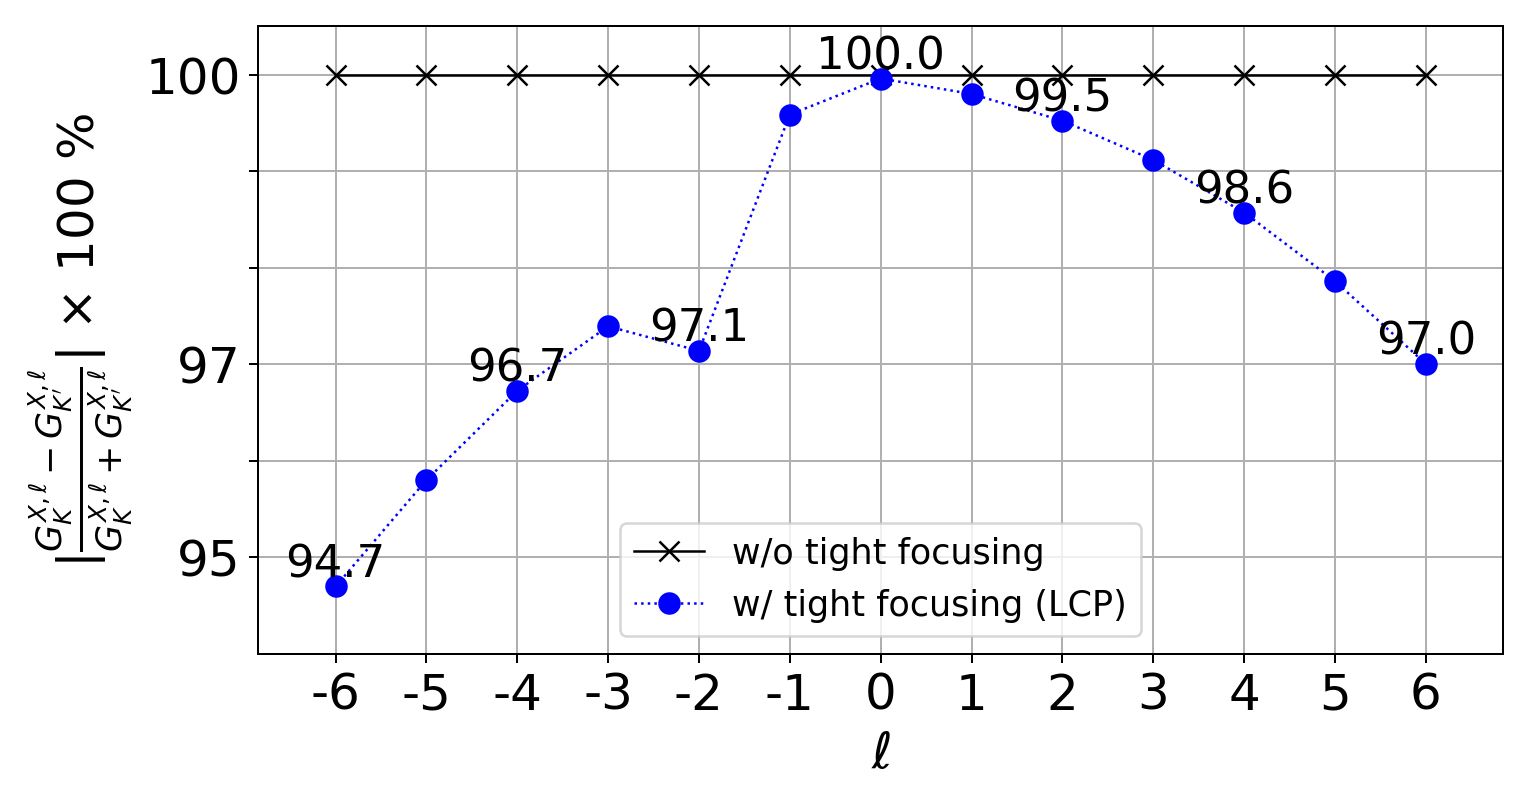

In [26]:
fig, ax = plt.subplots(figsize=(8.5, 4.47), dpi=180)

GKinRCP = [90.04, 91.57, 93.10, 94.63, 96.16, 97.70, 99.27, 91.69, 91.58, 90.80, 89.48, 88.07, 86.61]
GKprimeinRCP = [1.37, 0.99, 0.67, 0.42, 0.23, 0.10, 0.02, 0.19, 1.33, 1.20, 1.49, 1.89, 2.36]

GKinLCP = [2.36, 1.89, 1.49, 1.20, 1.33, 0.19, 0.02, 0.10, 0.23, 0.42, 0.67, 0.99, 1.37]
GKprimeinLCP = [86.61, 88.07, 89.48, 90.80, 91.58, 91.69, 99.27, 99.70, 96.16, 94.63, 93.10, 91.57, 90.04]
    
Gratio = []
for i in range(13):
    # Gratio += [(GKinRCP[i]-GKprimeinRCP[i])/(GKinRCP[i]+GKprimeinRCP[i]) * 100]
    Gratio += [np.abs((GKinLCP[i]-GKprimeinLCP[i])/(GKinLCP[i]+GKprimeinLCP[i]) * 100)] 
print(Gratio)
ax.cla()

ax.plot( np.linspace(-6, 6, 13), np.linspace(-6, 6, 13)*0+100, marker='x', linestyle='solid', markersize=8, color='black' ,linewidth=1, zorder=2)
ax.plot( np.linspace(-6, 6, 13), globals()['Gratio'], marker='o', linestyle='dotted', markersize=8, color='blue' ,linewidth=1, zorder=2)

globals()['G_data_for_text'] = []
for L in range(-6,7,2):
    globals()['G_data_for_text'] += [Gratio[L+6]]
for j, v in enumerate(globals()['G_data_for_text']):
    ax.text((j-3)*2, v+0.1, "%2.1f" %v, ha="center", fontsize=18)


ax.grid()
# ax.set_title(r"$|\frac{G^{X, \ell}_{K}-G^{X, \ell}_{K'}}{G^{X, \ell}_{K}+G^{X, \ell}_{K'}}|$ for LCP case", fontsize=20)
# ax.set_title(r"Quadratic fitting of $\frac{G^{X, \ell}_{K}-G^{X, \ell}_{K'}}{G^{X, \ell}_{K}+G^{X, \ell}_{K'}}$", fontsize=20)
ax.set_ylabel(r"$|\frac{G^{X, \ell}_{K}-G^{X, \ell}_{K'}}{G^{X, \ell}_{K}+G^{X, \ell}_{K'}}|$ $\times$ 100 %", fontsize=20, rotation=90)
# ax.set_yticks(np.arange(-110, 0, 110/22))
# ax.set_yticks(np.arange(-110, 0, 110/110), minor=True)
ax.set_yticks(np.arange(95, 101, 5/5))
ax.set_yticks(np.arange(95, 101, 5/1), minor=True)
ax.set_yticks(np.arange(95, 101, 5/5), ['95', ' ', '97', ' ', ' ', '100'])
ax.set_ylim(94, 100.5)
ax.set_xlabel('$\ell$', fontsize=20)
# ax.set_xticks(np.linspace(-6, 6, 13), [' ', ' ', ' ', ' ', ' ', ' ',' ', ' ', ' ', ' ', ' ', ' ', ' '])
ax.set_xticks(np.linspace(-6, 6, 13), ['-6', '-5', '-4', '-3', '-2', '-1', '0', '1', '2', '3', '4', '5', '6'])
ax.set_xlim(-6.85, 6.85)
ax.tick_params(axis='both', which='major', labelsize=20)

# x = np.linspace(-6, 6, 100)
# ax.plot(x ,(0.08)*x**2-99.9597139691812, linestyle='solid', color='black')
# ax.plot(x ,(0.098)*x**2-98.3, linestyle='dotted', color='black')

# ax.legend([r"$\frac{G^{X, \ell}_{K}-G^{X, \ell}_{K'}}{G^{X, \ell}_{K}+G^{X, \ell}_{K'}}$", "0.080$\ell^2$-99.9", "0.098$\ell^2$-98.3"], fontsize=14, loc='upper center')
ax.legend(["w/o tight focusing", "w/ tight focusing (LCP)"], fontsize=14, loc='lower center')

plt.tight_layout()
plt.show()

[0.9700251613609013, 0.978608470181504, 0.9857097152607444, 0.991162546028406, 0.9952277207179168, 0.997955010224949, 0.999597139691812, 0.9958641706573792, 0.9713701431492843, 0.9739130434782608, 0.9672419478949105, 0.9579813250333481, 0.9469484095762617]


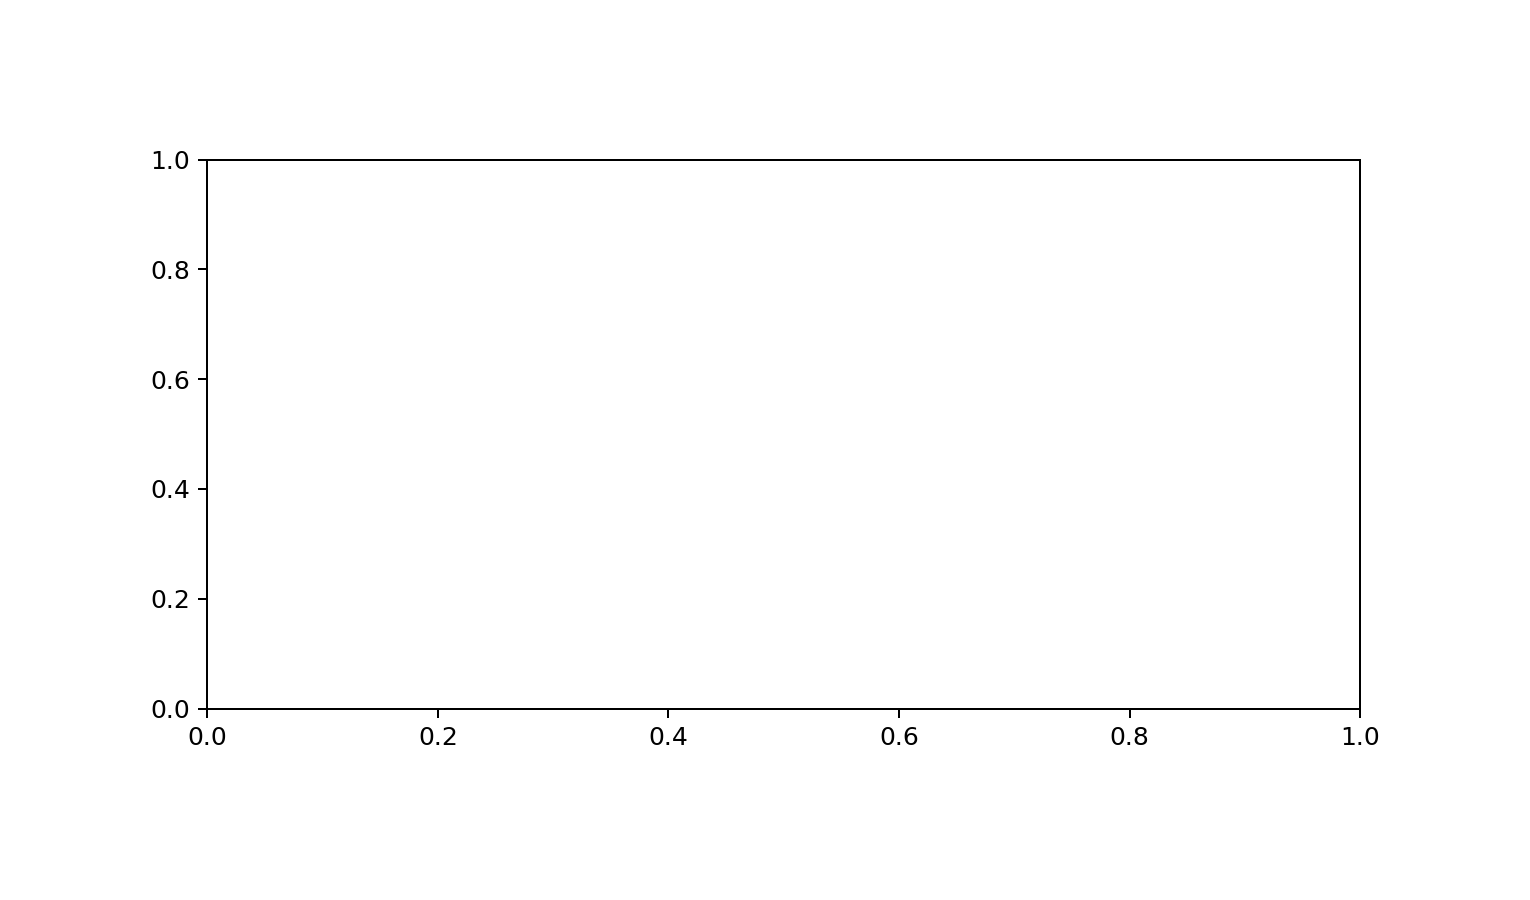

Output()

In [27]:
fig, ax = plt.subplots(figsize=(8.5, 5), dpi=180)

y_l0_KKmulti = widgets.FloatSlider(value=0.1, min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_l0_KK_multiplier')

y_X_r = 1

# GK = []
# GKprime = []
GKinRCP = [90.04, 91.57, 93.10, 94.63, 96.16, 97.70, 99.27, 91.69, 91.58, 90.80, 89.48, 88.07, 86.61]
GKprimeinRCP = [1.37, 0.99, 0.67, 0.42, 0.23, 0.10, 0.02, 0.19, 1.33, 1.20, 1.49, 1.89, 2.36]

GKinLCP = [2.36, 1.89, 1.49, 1.20, 1.33, 0.19, 0.02, 0.10, 0.23, 0.42, 0.67, 0.99, 1.37]
GKprimeinLCP = [86.61, 88.07, 89.48, 90.80, 91.58, 91.69, 99.27, 99.70, 96.16, 94.63, 93.10, 91.57, 90.04]
    
all_one = []
Gratio = []
for i in range(13):
    Gratio += [(GKinRCP[i]-GKprimeinRCP[i])/(GKinRCP[i]+GKprimeinRCP[i])]
    # Gratio += [(GKprimeinLCP[i]-GKinLCP[i])/(GKprimeinLCP[i]+GKinLCP[i])]
    all_one += [1]
    
print(Gratio)
    
def need(y_l0_KKmulti):

    y_l0_KK = y_l0_KKmulti * y_X_r
    print("y_l0_KK = "+str(format(y_l0_KK,'.2f')))

    
    
    ax.cla()
    globals()['WP_without_TF'] = []
    globals()['WP'] = []
    for l in range(-6,7,1):
        globals()['WP_without_TF'] += [model_one_WP_function(l, y_l0_KK, y_X_r) * all_one[l+6]]
        globals()['WP']            += [model_one_WP_function(l, y_l0_KK, y_X_r) * Gratio[l+6]]
    
    ax.plot( np.linspace(-6, 6, 13), globals()['WP_without_TF'], marker='v', linestyle='solid', markersize=8, color='red' ,linewidth=1, zorder=2)
    ax.plot( np.linspace(-6, 6, 13), globals()['WP'], marker='x', linestyle='solid', markersize=8, markeredgecolor='black', color='red' ,linewidth=1, zorder=2)
        
    globals()['WP_without_TF_for_text'] = []
    for L in range(-6,7,2):
        globals()['WP_without_TF_for_text'] += [model_one_WP_function(L, y_l0_KK, y_X_r)* all_one[L+6]]
    for j, v in enumerate(globals()['WP_without_TF_for_text']):
        ax.text((j-3)*2, v+0.025, "%2.2f" %v, ha="center", fontsize=18)
        
    globals()['WP_for_text'] = []
    for L in range(-6,7,2):
        globals()['WP_for_text']            += [model_one_WP_function(L, y_l0_KK, y_X_r) * Gratio[L+6]]
    for j, v in enumerate(globals()['WP_for_text']):
        ax.text((j-3)*2, v-0.065, "%2.2f" %v, ha="center", fontsize=18)
  
    ax.grid()
    ax.set_title('$\ell$ dependence of $η^{X, \ell}_{\sf{Model-I}}$, $η^{X}_{\sf{Model-II}}$, and $η^{T}_{\sf{Model-III}}$', fontsize=16)
    ax.set_ylabel('$η^{X, \ell}_{\sf{Model-I}}$', fontsize=20, rotation=90)
    ax.set_yticks(np.arange(0, 1.01, 1./10))
    ax.set_yticks(np.arange(0, 1.01, 1./100), minor=True)
    ax.set_ylim(0.3, 0.9)
    # ax.set_yticks(np.arange(-100, 1, 100/10))
    # ax.set_yticks(np.arange(-100, 1, 100/100), minor=True)
    # ax.set_ylim(-105, 0)
    # ax.set_xlabel('$\ell$', fontsize=20)
    ax.set_xticks(np.linspace(-6, 6, 13), [' ', ' ', ' ', ' ', ' ', ' ',' ', ' ', ' ', ' ', ' ', ' ', ' '])
    # ax.set_xticks(np.linspace(-6, 6, 13), ['-6', '-5', '-4', '-3', '-2', '-1', '0', '1', '2', '3', '4', '5', '6'])
    ax.set_xlim(-6.8, 6.8)
    ax.legend(['without TF', 'with TF'], fontsize=14, loc='lower center')
    ax.tick_params(axis='both', which='major', labelsize=20)
    

plt.tight_layout(pad=6)
# plt.tight_layout(pad=2)
# plt.subplots_adjust(left=0.1, right=0.9, 
#                     top=0.975, bottom=0.05, 
#                     wspace=0.4, hspace=0.028)
plt.show()

out = widgets.interactive_output(need, {'y_l0_KKmulti':y_l0_KKmulti})
ui = widgets.VBox([widgets.Label('coefficient:'), widgets.VBox([y_l0_KKmulti]) ])
display(ui , out )

[0.9700251613609013, 0.978608470181504, 0.9857097152607444, 0.991162546028406, 0.9952277207179168, 0.997955010224949, 0.999597139691812, 0.9958641706573792, 0.9713701431492843, 0.9739130434782608, 0.9672419478949105, 0.9579813250333481, 0.9469484095762617]


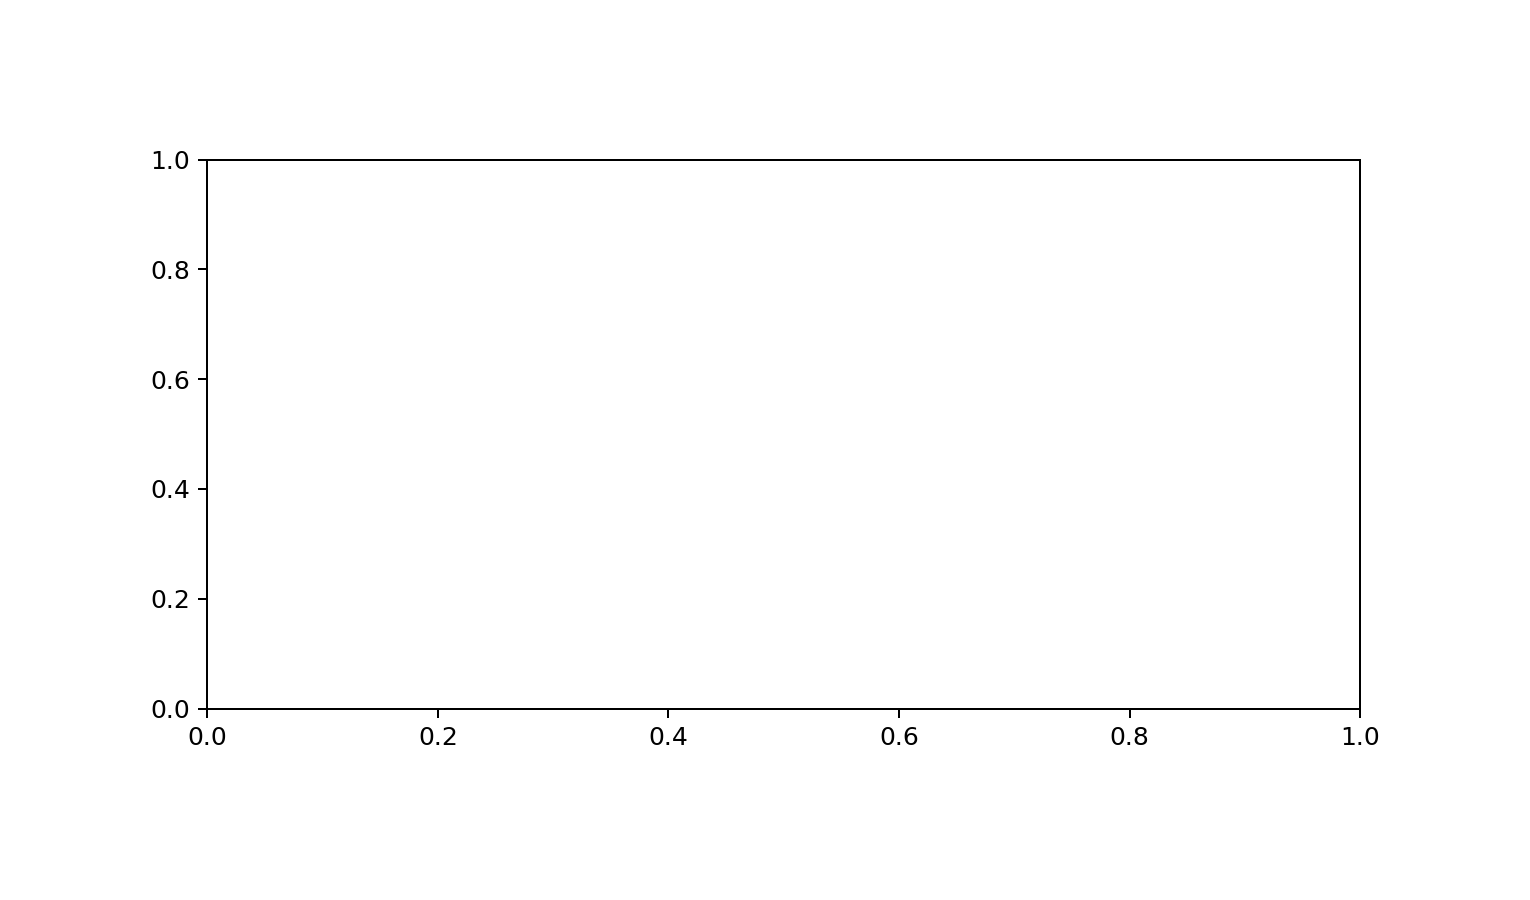

Output()

In [28]:
fig, ax = plt.subplots(figsize=(8.5, 5), dpi=180)

y_l0_KKmulti = widgets.FloatSlider(value=0.1, min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_l0_KK_multiplier')
y_X0_KKmulti = widgets.FloatSlider(value=0.1, min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_X0_KK_multiplier')
y_X_fmulti   = widgets.FloatSlider(value=10,  min=0., max=50,step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_X_fmultiplier')

y_X_r = 1

# GK = []
# GKprime = []
GKinRCP = [90.04, 91.57, 93.10, 94.63, 96.16, 97.70, 99.27, 91.69, 91.58, 90.80, 89.48, 88.07, 86.61]
GKprimeinRCP = [1.37, 0.99, 0.67, 0.42, 0.23, 0.10, 0.02, 0.19, 1.33, 1.20, 1.49, 1.89, 2.36]

GKinLCP = [2.36, 1.89, 1.49, 1.20, 1.33, 0.19, 0.02, 0.10, 0.23, 0.42, 0.67, 0.99, 1.37]
GKprimeinLCP = [86.61, 88.07, 89.48, 90.80, 91.58, 91.69, 99.27, 99.70, 96.16, 94.63, 93.10, 91.57, 90.04]
    
all_one = []
Gratio = []
for i in range(13):
    Gratio += [(GKinRCP[i]-GKprimeinRCP[i])/(GKinRCP[i]+GKprimeinRCP[i])]
    # Gratio += [(GKprimeinLCP[i]-GKinLCP[i])/(GKprimeinLCP[i]+GKinLCP[i])]

    all_one += [1]
    
print(Gratio)
    
def need(y_l0_KKmulti, y_X0_KKmulti, y_X_fmulti, y_T_fmulti, y_T_KKmulti, y_T_rmulti):

    y_l0_KK = y_l0_KKmulti * y_X_r
    y_X0_KK = y_X0_KKmulti * y_X_r
    y_X_f   = y_X_fmulti   * y_X_r
    print("y_l0_KK = "+str(format(y_l0_KK,'.2f')))
    print("y_X0_KK = "+str(format(y_X0_KK,'.2f')))
    print("y_X_f = "+str(format(y_X_f,'.2f')))
    
    
    ax.cla()
    globals()['TR_without_TF'] = []
    globals()['TR'] = []
    for l in range(-6,7,1):
        globals()['TR_without_TF'] += [model_two_Both_fun(l, y_l0_KK, y_X0_KK, y_X_r, y_X_f) * all_one[l+6]]
        globals()['TR']    += [model_two_Both_fun(l, y_l0_KK, y_X0_KK, y_X_r, y_X_f) * Gratio[l+6]]
    
    ax.plot( np.linspace(-6, 6, 13), globals()['TR_without_TF'], marker='s', linestyle='dashed', markersize=8, color='black' ,linewidth=1, zorder=2)
    ax.plot( np.linspace(-6, 6, 13), globals()['TR'], marker='x', linestyle='dashed', markersize=8, markeredgecolor='black', color='black' ,linewidth=1, zorder=2)
        
    globals()['TR_without_TF_for_text'] = []
    for L in range(-6,7,2):
        globals()['TR_without_TF_for_text'] += [model_two_Both_fun(L, y_l0_KK, y_X0_KK, y_X_r, y_X_f)* all_one[L+6]]
    for j, v in enumerate(globals()['TR_without_TF_for_text']):
        ax.text((j-3)*2, v+0.002, "%2.3f" %v, ha="center", fontsize=18)
        
    globals()['TR_for_text'] = []
    for L in range(-6,7,2):
        globals()['TR_for_text']            += [model_two_Both_fun(L, y_l0_KK, y_X0_KK, y_X_r, y_X_f) * Gratio[L+6]]
    for j, v in enumerate(globals()['TR_for_text']):
        ax.text((j-3)*2, v-0.015, "%2.3f" %v, ha="center", fontsize=18)
  
    ax.grid()
    ax.set_title(' ', fontsize=16)
    ax.set_ylabel('$η^{X}_{\sf{Model-II}}$', fontsize=20, rotation=90)
    ax.set_yticks(np.arange(0, 1.01, 1./20))
    ax.set_yticks(np.arange(0, 1.01, 1./100), minor=True)
    # ax.set_ylim(0.68, 0.8)
    ax.set_ylim(0.68, 0.85)
    # ax.set_xlabel('$\ell$', fontsize=20)
    ax.set_xticks(np.linspace(-6, 6, 13), [' ', ' ', ' ', ' ', ' ', ' ',' ', ' ', ' ', ' ', ' ', ' ', ' '])
    # ax.set_xticks(np.linspace(-6, 6, 13), ['-6', '-5', '-4', '-3', '-2', '-1', '0', '1', '2', '3', '4', '5', '6'])
    ax.set_xlim(-6.8, 6.8)
    ax.legend(['without TF', 'with TF'], fontsize=14, loc='lower center')
    ax.tick_params(axis='both', which='major', labelsize=20)
    

plt.tight_layout(pad=6)
# plt.tight_layout(pad=2)
# plt.subplots_adjust(left=0.1, right=0.9, 
#                     top=0.975, bottom=0.05, 
#                     wspace=0.4, hspace=0.028)
plt.show()

out = widgets.interactive_output(need, {'y_l0_KKmulti':y_l0_KKmulti, 'y_X0_KKmulti':y_X0_KKmulti, 'y_X_fmulti':y_X_fmulti, 'y_T_fmulti':y_T_fmulti, 'y_T_KKmulti':y_T_KKmulti, 'y_T_rmulti':y_T_rmulti})
ui = widgets.VBox([widgets.Label('coefficient:'), widgets.VBox([y_l0_KKmulti, y_X0_KKmulti, y_X_fmulti, y_T_fmulti, y_T_KKmulti, y_T_rmulti]) ])
display(ui , out )

[0.9700251613609013, 0.978608470181504, 0.9857097152607444, 0.991162546028406, 0.9952277207179168, 0.997955010224949, 0.999597139691812, 0.9958641706573792, 0.9713701431492843, 0.9739130434782608, 0.9672419478949105, 0.9579813250333481, 0.9469484095762617]


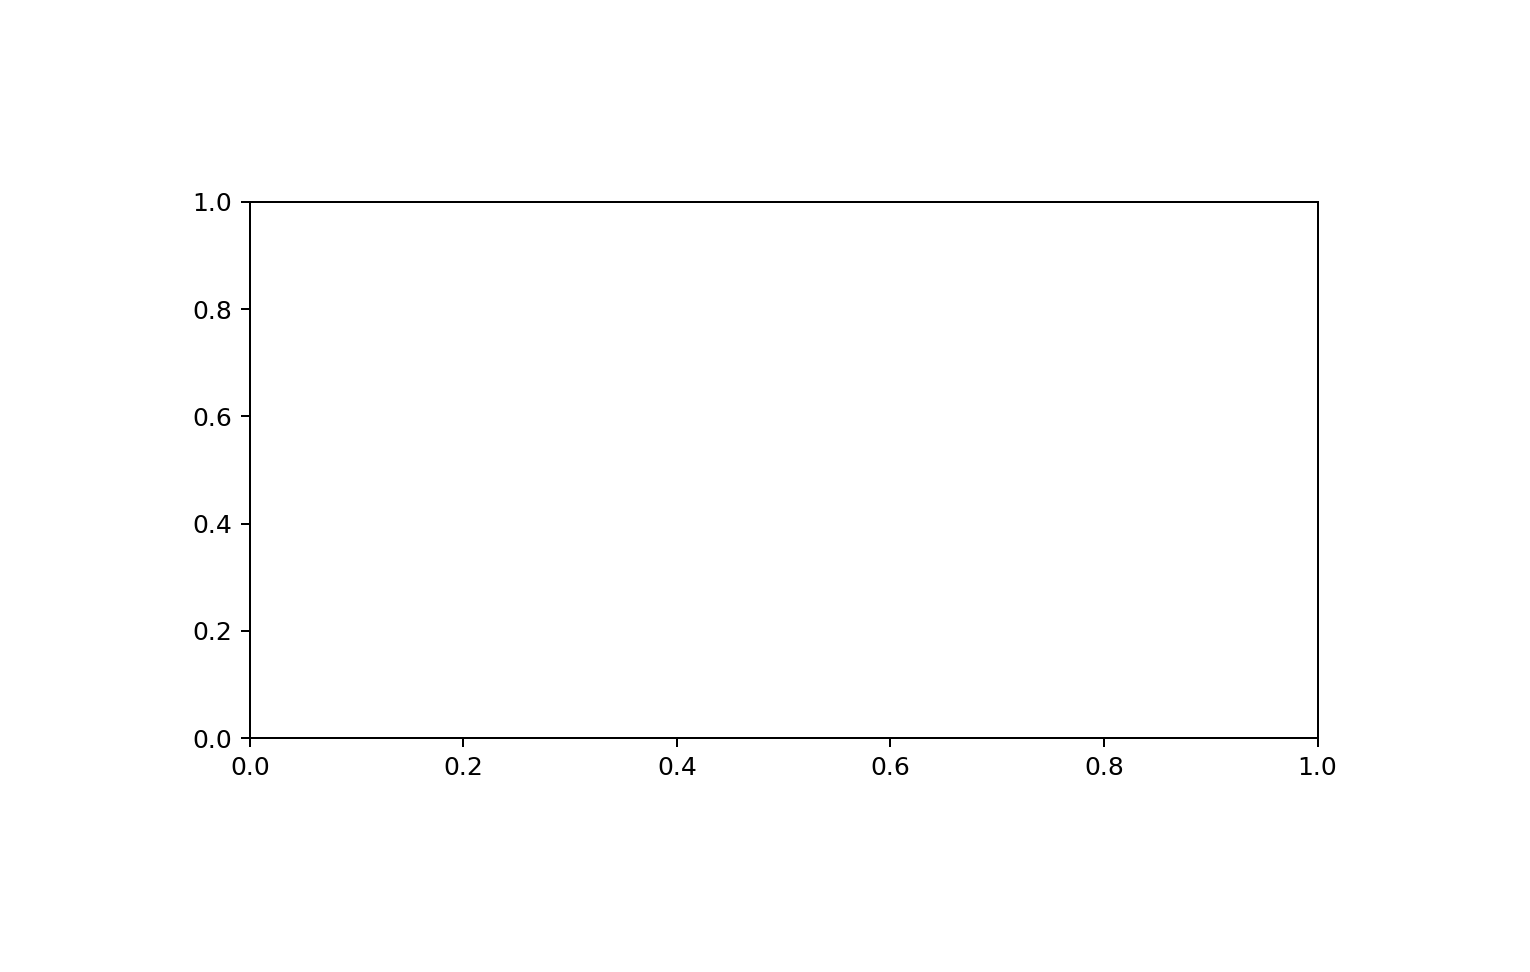

Output()

In [29]:
fig, ax = plt.subplots(figsize=(8.5, 5.4), dpi=180)

# y_l0_KKmulti = widgets.FloatSlider(value=0.07, min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_l0_KK_multiplier')
# y_X0_KKmulti = widgets.FloatSlider(value=0.07, min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_X0_KK_multiplier')
# y_X_fmulti   = widgets.FloatSlider(value=10,  min=0., max=50,step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_X_fmultiplier')
# y_T_fmulti   = widgets.FloatSlider(value=1.4,   min=0., max=5,step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_T_fmultiplier')
# y_T_KKmulti  = widgets.FloatSlider(value=0.007,min=0., max=0.005, step=1/1000001 ,layout=widgets.Layout(width='75%'), description='y_T_KKmultiplier')
# y_T_rmulti   = widgets.FloatSlider(value=0.05, min=0., max=0.5, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_T_rmultiplier')
y_l0_KKmulti = widgets.FloatSlider(value=0.1, min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_l0_KK_multiplier')
y_X0_KKmulti = widgets.FloatSlider(value=0.1, min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_X0_KK_multiplier')
y_X_fmulti   = widgets.FloatSlider(value=10,  min=0., max=50,step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_X_fmultiplier')
y_T_fmulti   = widgets.FloatSlider(value=1,   min=0., max=5,step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_T_fmultiplier')
y_T_KKmulti  = widgets.FloatSlider(value=0.01,min=0., max=0.005, step=1/1000001 ,layout=widgets.Layout(width='75%'), description='y_T_KKmultiplier')
y_T_rmulti   = widgets.FloatSlider(value=0.1, min=0., max=0.5, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_T_rmultiplier')

y_X_r = 1

# GK = []
# GKprime = []
GKinRCP = [90.04, 91.57, 93.10, 94.63, 96.16, 97.70, 99.27, 91.69, 91.58, 90.80, 89.48, 88.07, 86.61]
GKprimeinRCP = [1.37, 0.99, 0.67, 0.42, 0.23, 0.10, 0.02, 0.19, 1.33, 1.20, 1.49, 1.89, 2.36]

GKinLCP = [2.36, 1.89, 1.49, 1.20, 1.33, 0.19, 0.02, 0.10, 0.23, 0.42, 0.67, 0.99, 1.37]
GKprimeinLCP = [86.61, 88.07, 89.48, 90.80, 91.58, 91.69, 99.27, 99.70, 96.16, 94.63, 93.10, 91.57, 90.04]
    
all_one = []
Gratio = []
for i in range(13):
    Gratio += [(GKinRCP[i]-GKprimeinRCP[i])/(GKinRCP[i]+GKprimeinRCP[i])]
    # Gratio += [(GKprimeinLCP[i]-GKinLCP[i])/(GKprimeinLCP[i]+GKinLCP[i])]

    all_one += [1]
    
print(Gratio)
    
def need(y_l0_KKmulti, y_X0_KKmulti, y_X_fmulti, y_T_fmulti, y_T_KKmulti, y_T_rmulti):

    y_l0_KK = y_l0_KKmulti * y_X_r
    y_X0_KK = y_X0_KKmulti * y_X_r
    y_X_f   = y_X_fmulti   * y_X_r
    y_T_f   = y_T_fmulti   * y_X_r
    y_T_KK  = y_T_KKmulti  * y_X_r
    y_T_r   = y_T_rmulti   * y_X_r
    print("y_l0_KK = "+str(format(y_l0_KK,'.2f')))
    print("y_X0_KK = "+str(format(y_X0_KK,'.2f')))
    print("y_X_f = "+str(format(y_X_f,'.2f')))
    print("y_T_f = "+str(format(y_T_f,'.2f')))
    print("y_T_KK = "+str(format(y_T_KK,'.5f')))
    print("y_T_r = "+str(format(y_T_r,'.5f')))
    
    
    ax.cla()
    globals()['TR_without_TF'] = []
    globals()['TR'] = []
    for l in range(-6,7,1):
        globals()['TR_without_TF'] += [model_three_trion_fun(l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f, y_T_KK, y_T_r) * all_one[l+6]]
        globals()['TR']    += [model_three_trion_fun(l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f, y_T_KK, y_T_r) * Gratio[l+6]]
    
    ax.plot( np.linspace(-6, 6, 13), globals()['TR_without_TF'], marker='x', linestyle='solid', markersize=8, markeredgecolor='black', color='black', linewidth=1, zorder=2)
    ax.plot( np.linspace(-6, 6, 13), globals()['TR'], marker='o', linestyle='dotted', markersize=8, color='red', linewidth=1, zorder=2)
        
    globals()['TR_without_TF_for_text'] = []
    for L in range(-6,7,2):
        globals()['TR_without_TF_for_text'] += [model_three_trion_fun(L, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f, y_T_KK, y_T_r)* all_one[l+6]]
    for j, v in enumerate(globals()['TR_without_TF_for_text']):
        ax.text((j-3)*2, v+0.005, "%2.3f" %v, ha="center", fontsize=14)
        
    globals()['TR_for_text'] = []
    for L in range(-6,7,2):
        globals()['TR_for_text']            += [model_three_trion_fun(L, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f, y_T_KK, y_T_r) * Gratio[L+6]]
    for j, v in enumerate(globals()['TR_for_text']):
        ax.text((j-3)*2, v-0.015, "%2.3f" %v, ha="center", fontsize=14)
  
    ax.grid()
    # ax.set_title('Trion DoVP for RCP case', fontsize=16)
    ax.set_ylabel('$η^{T}_{\sf{Model-III}}$', fontsize=20, rotation=90)
    ax.set_yticks(np.arange(0.68, 0.86, 0.02))
    # ax.set_yticks(np.arange(0, 1.01, 1./100), minor=True)
    ax.set_ylim(0.68, 0.84)
    ax.set_xlabel('$\ell$', fontsize=20)
    # ax.set_xticks(np.linspace(-6, 6, 13), [' ', ' ', ' ', ' ', ' ', ' ',' ', ' ', ' ', ' ', ' ', ' ', ' '])
    ax.set_xticks(np.linspace(-6, 6, 13), ['-6', '-5', '-4', '-3', '-2', '-1', '0', '1', '2', '3', '4', '5', '6'])
    ax.set_xlim(-6.8, 6.8)
    ax.legend(["w/o tight focusing", "w/ tight focusing (RCP)"], fontsize=14, loc='lower center')
    ax.tick_params(axis='both', which='major', labelsize=14)
    

plt.tight_layout(pad=7.7)
# plt.tight_layout(pad=2)
# plt.subplots_adjust(left=0.1, right=0.9, 
#                     top=0.975, bottom=0.05, 
#                     wspace=0.4, hspace=0.028)
plt.show()

out = widgets.interactive_output(need, {'y_l0_KKmulti':y_l0_KKmulti, 'y_X0_KKmulti':y_X0_KKmulti, 'y_X_fmulti':y_X_fmulti, 'y_T_fmulti':y_T_fmulti, 'y_T_KKmulti':y_T_KKmulti, 'y_T_rmulti':y_T_rmulti})
ui = widgets.VBox([widgets.Label('coefficient:'), widgets.VBox([y_l0_KKmulti, y_X0_KKmulti, y_X_fmulti, y_T_fmulti, y_T_KKmulti, y_T_rmulti]) ])
display(ui , out )

[0.9469484095762617, 0.9579813250333481, 0.9672419478949105, 0.9739130434782608, 0.9713701431492843, 0.9958641706573792, 0.999597139691812, 0.997995991983968, 0.9952277207179168, 0.991162546028406, 0.9857097152607444, 0.978608470181504, 0.9700251613609013]


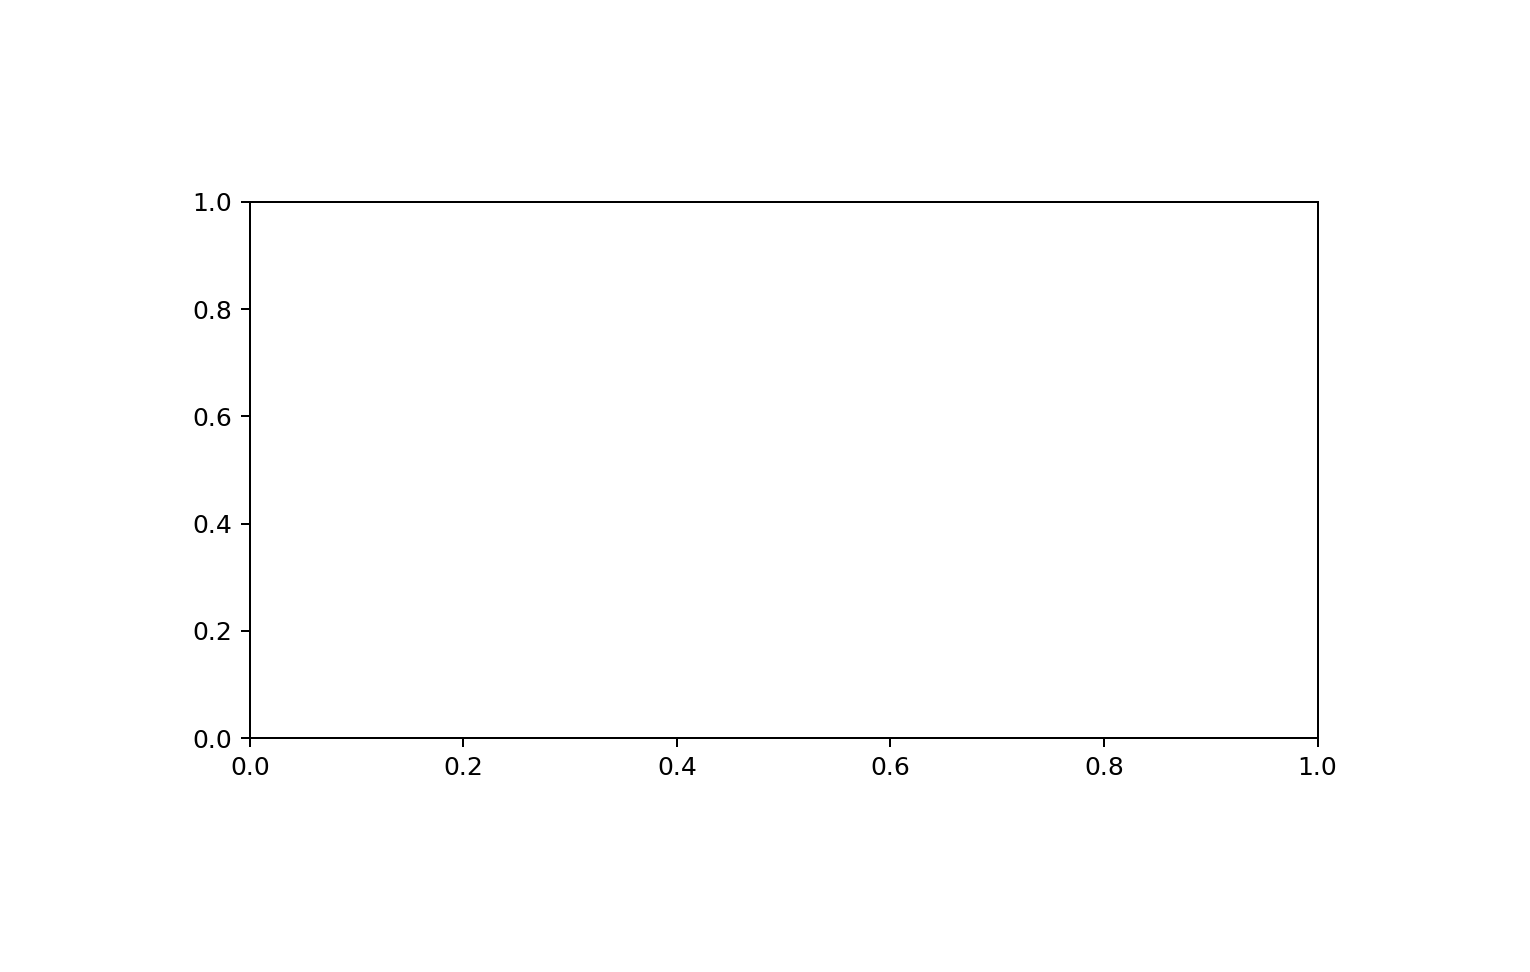

Output()

In [30]:
fig, ax = plt.subplots(figsize=(8.5, 5.4), dpi=180)

# y_l0_KKmulti = widgets.FloatSlider(value=0.07, min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_l0_KK_multiplier')
# y_X0_KKmulti = widgets.FloatSlider(value=0.07, min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_X0_KK_multiplier')
# y_X_fmulti   = widgets.FloatSlider(value=10,  min=0., max=50,step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_X_fmultiplier')
# y_T_fmulti   = widgets.FloatSlider(value=1.4,   min=0., max=5,step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_T_fmultiplier')
# y_T_KKmulti  = widgets.FloatSlider(value=0.007,min=0., max=0.005, step=1/1000001 ,layout=widgets.Layout(width='75%'), description='y_T_KKmultiplier')
# y_T_rmulti   = widgets.FloatSlider(value=0.05, min=0., max=0.5, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_T_rmultiplier')
y_l0_KKmulti = widgets.FloatSlider(value=0.1, min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_l0_KK_multiplier')
y_X0_KKmulti = widgets.FloatSlider(value=0.1, min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_X0_KK_multiplier')
y_X_fmulti   = widgets.FloatSlider(value=10,  min=0., max=50,step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_X_fmultiplier')
y_T_fmulti   = widgets.FloatSlider(value=1,   min=0., max=5,step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_T_fmultiplier')
y_T_KKmulti  = widgets.FloatSlider(value=0.01,min=0., max=0.005, step=1/1000001 ,layout=widgets.Layout(width='75%'), description='y_T_KKmultiplier')
y_T_rmulti   = widgets.FloatSlider(value=0.1, min=0., max=0.5, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_T_rmultiplier')

y_X_r = 1

# GK = []
# GKprime = []
GKinRCP = [90.04, 91.57, 93.10, 94.63, 96.16, 97.70, 99.27, 91.69, 91.58, 90.80, 89.48, 88.07, 86.61]
GKprimeinRCP = [1.37, 0.99, 0.67, 0.42, 0.23, 0.10, 0.02, 0.19, 1.33, 1.20, 1.49, 1.89, 2.36]

GKinLCP = [2.36, 1.89, 1.49, 1.20, 1.33, 0.19, 0.02, 0.10, 0.23, 0.42, 0.67, 0.99, 1.37]
GKprimeinLCP = [86.61, 88.07, 89.48, 90.80, 91.58, 91.69, 99.27, 99.70, 96.16, 94.63, 93.10, 91.57, 90.04]
    
all_one = []
Gratio = []
for i in range(13):
    # Gratio += [(GKinRCP[i]-GKprimeinRCP[i])/(GKinRCP[i]+GKprimeinRCP[i])]
    Gratio += [np.abs((GKinLCP[i]-GKprimeinLCP[i])/(GKinLCP[i]+GKprimeinLCP[i]))]

    all_one += [np.abs(-1)]
    
print(Gratio)
    
def need(y_l0_KKmulti, y_X0_KKmulti, y_X_fmulti, y_T_fmulti, y_T_KKmulti, y_T_rmulti):

    y_l0_KK = y_l0_KKmulti * y_X_r
    y_X0_KK = y_X0_KKmulti * y_X_r
    y_X_f   = y_X_fmulti   * y_X_r
    y_T_f   = y_T_fmulti   * y_X_r
    y_T_KK  = y_T_KKmulti  * y_X_r
    y_T_r   = y_T_rmulti   * y_X_r
    print("y_l0_KK = "+str(format(y_l0_KK,'.2f')))
    print("y_X0_KK = "+str(format(y_X0_KK,'.2f')))
    print("y_X_f = "+str(format(y_X_f,'.2f')))
    print("y_T_f = "+str(format(y_T_f,'.2f')))
    print("y_T_KK = "+str(format(y_T_KK,'.5f')))
    print("y_T_r = "+str(format(y_T_r,'.5f')))
    
    
    ax.cla()
    globals()['TR_without_TF'] = []
    globals()['TR'] = []
    for l in range(-6,7,1):
        globals()['TR_without_TF'] += [model_three_trion_fun(l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f, y_T_KK, y_T_r) * all_one[l+6]]
        globals()['TR']    += [model_three_trion_fun(l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f, y_T_KK, y_T_r) * Gratio[l+6]]
    
    ax.plot( np.linspace(-6, 6, 13), globals()['TR_without_TF'], marker='x', linestyle='solid', markersize=8, markeredgecolor='black', color='black' ,linewidth=1, zorder=2)
    ax.plot( np.linspace(-6, 6, 13), globals()['TR'], marker='o', linestyle='dotted', markersize=8, color='blue' ,linewidth=1, zorder=2)
        
    globals()['TR_without_TF_for_text'] = []
    for L in range(-6,7,2):
        globals()['TR_without_TF_for_text'] += [model_three_trion_fun(L, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f, y_T_KK, y_T_r)* all_one[l+6]]
    for j, v in enumerate(globals()['TR_without_TF_for_text']):
        ax.text((j-3)*2, v+0.005, "%2.3f" %v, ha="center", fontsize=14)
        
    globals()['TR_for_text'] = []
    for L in range(-6,7,2):
        globals()['TR_for_text']            += [model_three_trion_fun(L, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f, y_T_KK, y_T_r) * Gratio[L+6]]
    for j, v in enumerate(globals()['TR_for_text']):
        ax.text((j-3)*2, v-0.015, "%2.3f" %v, ha="center", fontsize=14)
  
    ax.grid()
    # ax.set_title('Trion DoVP for LCP case', fontsize=16)
    ax.set_ylabel('$|η^{T}_{\sf{Model-III}}|$', fontsize=20, rotation=90)
    ax.set_yticks(np.arange(0.68, 0.86, 0.02))
    # ax.set_yticks(np.arange(0, 1.01, 1./100), minor=True)
    ax.set_ylim(0.68, 0.84)
    ax.set_xlabel('$\ell$', fontsize=20)
    # ax.set_xticks(np.linspace(-6, 6, 13), [' ', ' ', ' ', ' ', ' ', ' ',' ', ' ', ' ', ' ', ' ', ' ', ' '])
    ax.set_xticks(np.linspace(-6, 6, 13), ['-6', '-5', '-4', '-3', '-2', '-1', '0', '1', '2', '3', '4', '5', '6'])
    ax.set_xlim(-6.8, 6.8)
    ax.legend(["w/o tight focusing", "w/ tight focusing (LCP)"], fontsize=14, loc='lower center')
    ax.tick_params(axis='both', which='major', labelsize=14)
    

plt.tight_layout(pad=7.7)
# plt.tight_layout(pad=2)
# plt.subplots_adjust(left=0.1, right=0.9, 
#                     top=0.975, bottom=0.05, 
#                     wspace=0.4, hspace=0.028)
plt.show()

out = widgets.interactive_output(need, {'y_l0_KKmulti':y_l0_KKmulti, 'y_X0_KKmulti':y_X0_KKmulti, 'y_X_fmulti':y_X_fmulti, 'y_T_fmulti':y_T_fmulti, 'y_T_KKmulti':y_T_KKmulti, 'y_T_rmulti':y_T_rmulti})
ui = widgets.VBox([widgets.Label('coefficient:'), widgets.VBox([y_l0_KKmulti, y_X0_KKmulti, y_X_fmulti, y_T_fmulti, y_T_KKmulti, y_T_rmulti]) ])
display(ui , out )

[0.9469484095762617, 0.9579813250333481, 0.9672419478949105, 0.9739130434782608, 0.9713701431492843, 0.9958641706573792, 0.999597139691812, 0.997995991983968, 0.9952277207179168, 0.991162546028406, 0.9857097152607444, 0.978608470181504, 0.9700251613609013]


C:\Users\USER\AppData\Local\Temp\ipykernel_23332\3434112303.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(8.5, 5.4), dpi=180)


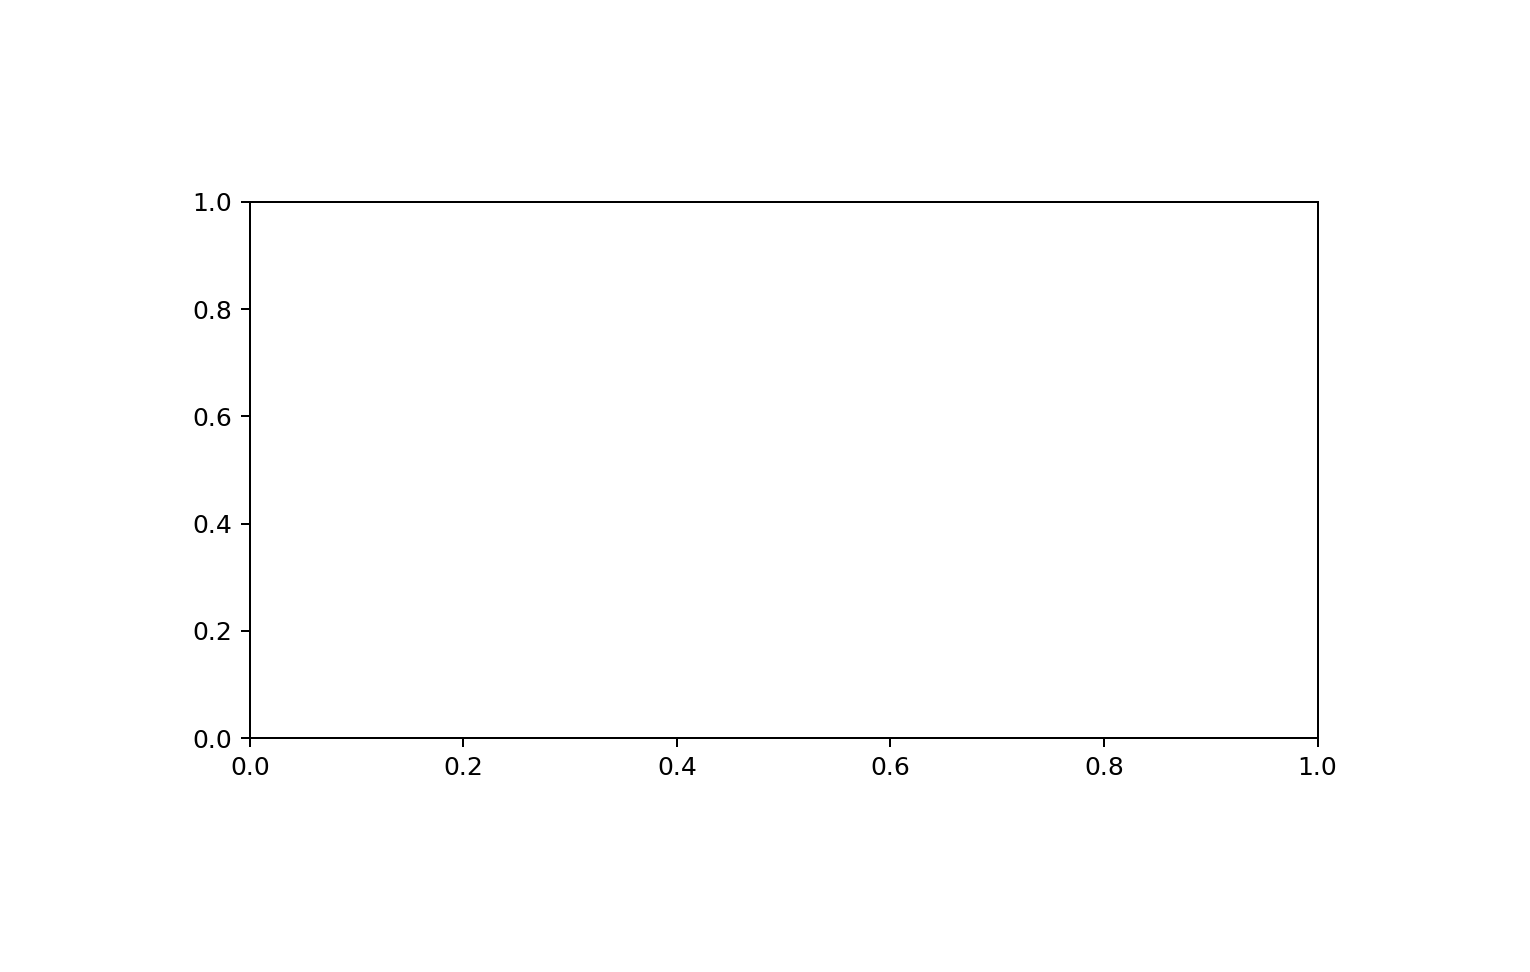

Output()

In [31]:
fig, ax = plt.subplots(figsize=(8.5, 5.4), dpi=180)

# y_l0_KKmulti = widgets.FloatSlider(value=0.07, min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_l0_KK_multiplier')
# y_X0_KKmulti = widgets.FloatSlider(value=0.07, min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_X0_KK_multiplier')
# y_X_fmulti   = widgets.FloatSlider(value=10,  min=0., max=50,step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_X_fmultiplier')
# y_T_fmulti   = widgets.FloatSlider(value=1.4,   min=0., max=5,step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_T_fmultiplier')
# y_T_KKmulti  = widgets.FloatSlider(value=0.007,min=0., max=0.005, step=1/1000001 ,layout=widgets.Layout(width='75%'), description='y_T_KKmultiplier')
# y_T_rmulti   = widgets.FloatSlider(value=0.05, min=0., max=0.5, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_T_rmultiplier')
y_l0_KKmulti = widgets.FloatSlider(value=0.1, min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_l0_KK_multiplier')
y_X0_KKmulti = widgets.FloatSlider(value=0.1, min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_X0_KK_multiplier')
y_X_fmulti   = widgets.FloatSlider(value=10,  min=0., max=50,step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_X_fmultiplier')
y_T_fmulti   = widgets.FloatSlider(value=1,   min=0., max=5,step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_T_fmultiplier')
y_T_KKmulti  = widgets.FloatSlider(value=0.01,min=0., max=0.005, step=1/1000001 ,layout=widgets.Layout(width='75%'), description='y_T_KKmultiplier')
y_T_rmulti   = widgets.FloatSlider(value=0.1, min=0., max=0.5, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_T_rmultiplier')

y_X_r = 1

# GK = []
# GKprime = []
GKinRCP = [90.04, 91.57, 93.10, 94.63, 96.16, 97.70, 99.27, 91.69, 91.58, 90.80, 89.48, 88.07, 86.61]
GKprimeinRCP = [1.37, 0.99, 0.67, 0.42, 0.23, 0.10, 0.02, 0.19, 1.33, 1.20, 1.49, 1.89, 2.36]

GKinLCP = [2.36, 1.89, 1.49, 1.20, 1.33, 0.19, 0.02, 0.10, 0.23, 0.42, 0.67, 0.99, 1.37]
GKprimeinLCP = [86.61, 88.07, 89.48, 90.80, 91.58, 91.69, 99.27, 99.70, 96.16, 94.63, 93.10, 91.57, 90.04]
    
all_one = []
GratioR = []
GratioL = []
for i in range(13):
    GratioR += [(GKinRCP[i]-GKprimeinRCP[i])/(GKinRCP[i]+GKprimeinRCP[i])]
    GratioL += [np.abs((GKinLCP[i]-GKprimeinLCP[i])/(GKinLCP[i]+GKprimeinLCP[i]))]

    all_one += [np.abs(-1)]
    
print(Gratio)
    
def need(y_l0_KKmulti, y_X0_KKmulti, y_X_fmulti, y_T_fmulti, y_T_KKmulti, y_T_rmulti):

    y_l0_KK = y_l0_KKmulti * y_X_r
    y_X0_KK = y_X0_KKmulti * y_X_r
    y_X_f   = y_X_fmulti   * y_X_r
    y_T_f   = y_T_fmulti   * y_X_r
    y_T_KK  = y_T_KKmulti  * y_X_r
    y_T_r   = y_T_rmulti   * y_X_r
    print("y_l0_KK = "+str(format(y_l0_KK,'.2f')))
    print("y_X0_KK = "+str(format(y_X0_KK,'.2f')))
    print("y_X_f = "+str(format(y_X_f,'.2f')))
    print("y_T_f = "+str(format(y_T_f,'.2f')))
    print("y_T_KK = "+str(format(y_T_KK,'.5f')))
    print("y_T_r = "+str(format(y_T_r,'.5f')))
    
    
    ax.cla()
    globals()['TR_without_TF'] = []
    globals()['TR_R'] = []
    globals()['TR_L'] = []
    for l in range(-6,7,1):
        globals()['TR_without_TF'] += [model_three_trion_fun(l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f, y_T_KK, y_T_r) * all_one[l+6]]
        globals()['TR_R']    += [model_three_trion_fun(l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f, y_T_KK, y_T_r) * GratioR[l+6]]
        globals()['TR_L']    += [model_three_trion_fun(l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f, y_T_KK, y_T_r) * GratioL[l+6]]
    
    ax.plot( np.linspace(-6, 6, 13), globals()['TR_without_TF'], marker='x', linestyle='solid', markersize=8, markeredgecolor='black', color='black' ,linewidth=1, zorder=2)
    ax.plot( np.linspace(-6, 6, 13), globals()['TR_R'], marker='o', linestyle='dotted', markersize=8, color='red' ,linewidth=1, zorder=2)
    ax.plot( np.linspace(-6, 6, 13), globals()['TR_L'], marker='o', linestyle='dotted', markersize=8, color='blue' ,linewidth=1, zorder=2)
        
    globals()['TR_without_TF_for_text'] = []
    for L in range(-6,7,2):
        globals()['TR_without_TF_for_text'] += [model_three_trion_fun(L, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f, y_T_KK, y_T_r)* all_one[l+6]]
    for j, v in enumerate(globals()['TR_without_TF_for_text']):
        ax.text((j-3)*2, v+0.005, "%2.3f" %v, ha="center", fontsize=12)
        
    globals()['TR_R_for_text'] = []
    for L in range(-6,7,2):
        globals()['TR_R_for_text']            += [model_three_trion_fun(L, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f, y_T_KK, y_T_r) * GratioR[L+6]]
    for j, v in enumerate(globals()['TR_R_for_text']):
        ax.text((j-3)*2, v-0.011, "%2.3f" %v, ha="center", fontsize=12)
        
    globals()['TR_L_for_text'] = []
    for L in range(-6,7,2):
        globals()['TR_L_for_text']            += [model_three_trion_fun(L, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f, y_T_KK, y_T_r) * GratioL[L+6]]
    for j, v in enumerate(globals()['TR_L_for_text']):
        ax.text((j-3)*2, v-0.011, "%2.3f" %v, ha="center", fontsize=12)
  
    ax.grid()
    # ax.set_title('Trion DoVP for LCP case', fontsize=16)
    ax.set_ylabel('$|η^{T}_{\sf{Model-III}}|$', fontsize=20, rotation=90)
    ax.set_yticks(np.arange(0.68, 0.86, 0.02))
    # ax.set_yticks(np.arange(0, 1.01, 1./100), minor=True)
    ax.set_ylim(0.68, 0.84)
    ax.set_xlabel('$\ell$', fontsize=20)
    # ax.set_xticks(np.linspace(-6, 6, 13), [' ', ' ', ' ', ' ', ' ', ' ',' ', ' ', ' ', ' ', ' ', ' ', ' '])
    ax.set_xticks(np.linspace(-6, 6, 13), ['-6', '-5', '-4', '-3', '-2', '-1', '0', '1', '2', '3', '4', '5', '6'])
    ax.set_xlim(-6.8, 6.8)
    ax.legend(["w/o tight focusing", "w/ tight focusing (RCP)", "w/ tight focusing (LCP)"], fontsize=12, loc='lower center')
    ax.tick_params(axis='both', which='major', labelsize=14)
    

plt.tight_layout(pad=7.7)
# plt.tight_layout(pad=2)
# plt.subplots_adjust(left=0.1, right=0.9, 
#                     top=0.975, bottom=0.05, 
#                     wspace=0.4, hspace=0.028)
plt.show()

out = widgets.interactive_output(need, {'y_l0_KKmulti':y_l0_KKmulti, 'y_X0_KKmulti':y_X0_KKmulti, 'y_X_fmulti':y_X_fmulti, 'y_T_fmulti':y_T_fmulti, 'y_T_KKmulti':y_T_KKmulti, 'y_T_rmulti':y_T_rmulti})
ui = widgets.VBox([widgets.Label('coefficient:'), widgets.VBox([y_l0_KKmulti, y_X0_KKmulti, y_X_fmulti, y_T_fmulti, y_T_KKmulti, y_T_rmulti]) ])
display(ui , out )

In [32]:
def N_WP_K_fun(G_K, G_Kprime, l, y_l0_KK, y_X_r, y_X_f, y_T_f):
    y_l0_KK = y_l0_KK*(np.abs(l)+1)
    N = (y_l0_KK*G_Kprime + (y_l0_KK+y_X_r+y_X_f+y_T_f)*G_K) / ((y_l0_KK+y_X_r+y_X_f+y_T_f)**2-y_l0_KK**2)
    return N
    
def N_WP_Kprime_fun(G_K, G_Kprime, l, y_l0_KK, y_X_r, y_X_f, y_T_f):
    y_l0_KK = y_l0_KK*(np.abs(l)+1)
    N = (y_l0_KK*G_K + (y_l0_KK+y_X_r+y_X_f+y_T_f)*G_Kprime) / ((y_l0_KK+y_X_r+y_X_f+y_T_f)**2-y_l0_KK**2)
    return N

def sum_N_WP_fun(G_K, G_Kprime, l, y_l0_KK, y_X_r, y_X_f, y_T_f):
    N = N_WP_K_fun(G_K, G_Kprime, l, y_l0_KK, y_X_r, y_X_f, y_T_f) + N_WP_Kprime_fun(G_K, G_Kprime, l, y_l0_KK, y_X_r, y_X_f, y_T_f)
    return N
    
def N_LOW_K_fun(G_K, G_Kprime, l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f):
    N = y_X_f* ( y_X0_KK*sum_N_WP_fun(G_K, G_Kprime, l, y_l0_KK, y_X_r, y_X_f, y_T_f) + (y_X_r+y_T_f)*N_WP_K_fun(G_K, G_Kprime, l, y_l0_KK, y_X_r, y_X_f, y_T_f) ) / ((y_X0_KK+y_X_r+y_T_f)**2-y_X0_KK**2)
    return N

def N_LOW_Kprime_fun(G_K, G_Kprime, l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f):
    N = y_X_f* ( y_X0_KK*sum_N_WP_fun(G_K, G_Kprime, l, y_l0_KK, y_X_r, y_X_f, y_T_f) + (y_X_r+y_T_f)*N_WP_Kprime_fun(G_K, G_Kprime, l, y_l0_KK, y_X_r, y_X_f, y_T_f) ) / ((y_X0_KK+y_X_r+y_T_f)**2-y_X0_KK**2)
    return N

def sum_N_LOW_fun(G_K, G_Kprime, l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f):
    N = N_LOW_K_fun(G_K, G_Kprime, l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f) + N_LOW_Kprime_fun(G_K, G_Kprime, l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f)
    return N

def sum_N_WPandLOW_fun(G_K, G_Kprime, l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f):
    N = sum_N_WP_fun(G_K, G_Kprime, l, y_l0_KK, y_X_r, y_X_f, y_T_f) + sum_N_LOW_fun(G_K, G_Kprime, l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f)
    return N

def N_TR_K_fun(G_K, G_Kprime, l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f, y_T_KK, y_T_r):
    N = y_T_f*(y_T_KK*sum_N_WPandLOW_fun(G_K, G_Kprime, l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f)+y_T_r*(N_LOW_K_fun(G_K, G_Kprime, l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f)+N_WP_K_fun(G_K, G_Kprime, l, y_l0_KK, y_X_r, y_X_f, y_T_f))) / ((y_T_KK+y_T_r)**2-y_T_KK**2)
    return N

def N_TR_Kprime_fun(G_K, G_Kprime, l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f
                    , y_T_KK, y_T_r):
    N = y_T_f*(y_T_KK*sum_N_WPandLOW_fun(G_K, G_Kprime, l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f)+y_T_r*(N_LOW_Kprime_fun(G_K, G_Kprime, l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f)+N_WP_Kprime_fun(G_K, G_Kprime, l, y_l0_KK, y_X_r, y_X_f, y_T_f))) / ((y_T_KK+y_T_r)**2-y_T_KK**2)
    return N

def sum_N_TR_fun(G_K, G_Kprime, l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f, y_T_KK, y_T_r):
    N = N_TR_K_fun(G_K, G_Kprime, l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f, y_T_KK, y_T_r) + N_TR_Kprime_fun(G_K, G_Kprime, l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f, y_T_KK, y_T_r)
    return N

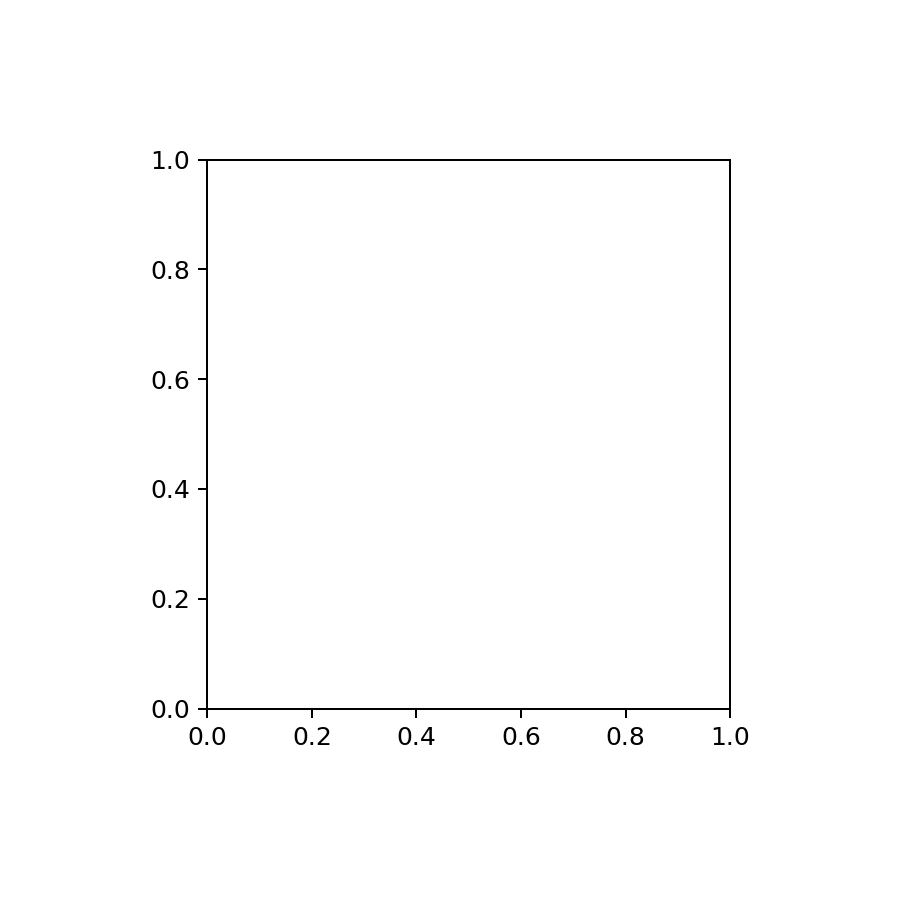

Output()

In [33]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=180)

y_l0_KKmulti = widgets.FloatSlider(value=0.1, min=0., max=10, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_l0_KK_multiplier')
y_X0_KKmulti = widgets.FloatSlider(value=0.1, min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_X0_KK_multiplier')
y_X_fmulti   = widgets.FloatSlider(value=10,  min=0., max=50,step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_X_fmultiplier')
y_T_fmulti   = widgets.FloatSlider(value=1,   min=0., max=5,step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_T_fmultiplier')
y_T_KKmulti  = widgets.FloatSlider(value=0.01,min=0., max=0.005, step=1/1000001 ,layout=widgets.Layout(width='75%'), description='y_T_KKmultiplier')
y_T_rmulti   = widgets.FloatSlider(value=0.1, min=0., max=0.5, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_T_rmultiplier')

y_X_r = 1

# G_K      = 100
# G_Kprime = 50
G_K      = widgets.FloatSlider(value=1,min=0., max=1, step=1/1000001 ,layout=widgets.Layout(width='75%'), description='G_K')
G_Kprime = widgets.FloatSlider(value=0, min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='G_Kprime')
    
def need(G_K, G_Kprime, y_l0_KKmulti, y_X0_KKmulti, y_X_fmulti, y_T_fmulti, y_T_KKmulti, y_T_rmulti):

    y_l0_KK = y_l0_KKmulti * y_X_r
    y_X0_KK = y_X0_KKmulti * y_X_r
    y_X_f   = y_X_fmulti   * y_X_r
    y_T_f   = y_T_fmulti   * y_X_r
    y_T_KK  = y_T_KKmulti  * y_X_r
    y_T_r   = y_T_rmulti   * y_X_r
    print("y_l0_KK = "+str(format(y_l0_KK,'.2f')))
    print("y_X0_KK = "+str(format(y_X0_KK,'.2f')))
    print("y_X_f = "+str(format(y_X_f,'.2f')))
    print("y_T_f = "+str(format(y_T_f,'.2f')))
    print("y_T_KK = "+str(format(y_T_KK,'.5f')))
    print("y_T_r = "+str(format(y_T_r,'.5f')))
    
    
    ax.cla()
    globals()['N_WP_K'] = []
    globals()['N_WP_Kprime'] = []
    globals()['N_LOW_K'] = []
    globals()['N_LOW_Kprime'] = []
    globals()['N_TR_K'] = []
    globals()['N_TR_Kprime'] = []
    for l in range(0,7,1):
        globals()['N_WP_K']       += [N_WP_K_fun(G_K, G_Kprime, l, y_l0_KK, y_X_r, y_X_f, y_T_f)]
        globals()['N_WP_Kprime']  += [N_WP_Kprime_fun(G_K, G_Kprime, l, y_l0_KK, y_X_r, y_X_f, y_T_f)]
        globals()['N_LOW_K']      += [N_LOW_K_fun(G_K, G_Kprime, l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f)]
        globals()['N_LOW_Kprime'] += [N_LOW_Kprime_fun(G_K, G_Kprime, l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f)]
        globals()['N_TR_K']       += [N_TR_K_fun(G_K, G_Kprime, l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f, y_T_KK, y_T_r)]
        globals()['N_TR_Kprime']  += [N_TR_Kprime_fun(G_K, G_Kprime, l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f, y_T_KK, y_T_r)]
    
    ax.plot( np.linspace(0, 6, 7), globals()['N_WP_K'], marker='v', linestyle='solid', markersize=10, color='darkred' ,linewidth=1, zorder=3)
    ax.plot( np.linspace(0, 6, 7), globals()['N_WP_Kprime'], marker='v', linestyle='solid', markersize=10, color='red' ,linewidth=1, zorder=3)
    ax.plot( np.linspace(0, 6, 7), globals()['N_LOW_K'], marker='^', linestyle='dashed', markersize=10, color='darkblue' ,linewidth=1, zorder=3)
    ax.plot( np.linspace(0, 6, 7), globals()['N_LOW_Kprime'], marker='^', linestyle='dashed', markersize=10, color='deepskyblue' ,linewidth=1, zorder=3)
    ax.plot( np.linspace(0, 6, 7), globals()['N_TR_K'], marker='o', linestyle='dotted', markersize=10, color='green' ,linewidth=1, zorder=3)
    ax.plot( np.linspace(0, 6, 7), globals()['N_TR_Kprime'], marker='o', linestyle='dotted', markersize=10, color='mediumseagreen' ,linewidth=1, zorder=3)

  
    ax.grid()
    ax.set_title('valley population', fontsize=18)
    ax.set_ylabel('relative value', fontsize=18, rotation=90)
    ax.set_yticks(np.arange(0, 5.21, 5.2/2))
    ax.set_yticks(np.arange(0, 5.21, 5.2/10), minor=True)
    ax.set_ylim(-5.2*0.03, 5.2)
    # ax.set_yticks(np.arange(0, 0.461, 0.46/2))
    # ax.set_yticks(np.arange(0, 0.461, 0.46/10), minor=True)
    # ax.set_ylim(-0.46*0.03, 0.46)
    # ax.set_yticks(np.arange(0, 0.101, 0.1/2))
    # ax.set_yticks(np.arange(0, 0.101, 0.1/10), minor=True)
    # ax.set_ylim(-0.003, 0.1)
    ax.set_xlabel('$\ell$', fontsize=18)
    # ax.set_xticks(np.linspace(-6, 6, 13), [' ', ' ', ' ', ' ', ' ', ' ', ' '])
    ax.set_xticks(np.linspace(0, 6, 7), [ '0', '1', '2', '3', '4', '5', '6'])
    # ax.set_xlim(0, 6)
    ax.legend(['$N_𝐾^{X,\ell}$','$N_{𝐾\'}^{X,\ell}$','$N_𝐾^{X,(0)}$','$N_{𝐾\'}^{X,(0)}$','$N_𝐾^T$','$N_{𝐾\'}^T$'], fontsize=13, loc='center left')
    ax.tick_params(axis='both', which='major', labelsize=18)
    

plt.tight_layout(pad=6)
# plt.tight_layout(pad=2)
# plt.subplots_adjust(left=0.1, right=0.9, 
#                     top=0.975, bottom=0.05, 
#                     wspace=0.4, hspace=0.028)
plt.show()

out = widgets.interactive_output(need, {'G_K':G_K, 'G_Kprime':G_Kprime,'y_l0_KKmulti':y_l0_KKmulti, 'y_X0_KKmulti':y_X0_KKmulti, 'y_X_fmulti':y_X_fmulti, 'y_T_fmulti':y_T_fmulti, 'y_T_KKmulti':y_T_KKmulti, 'y_T_rmulti':y_T_rmulti})
ui = widgets.VBox([widgets.Label('coefficient:'), widgets.VBox([G_K, G_Kprime,y_l0_KKmulti, y_X0_KKmulti, y_X_fmulti, y_T_fmulti, y_T_KKmulti, y_T_rmulti]) ])
display(ui , out )

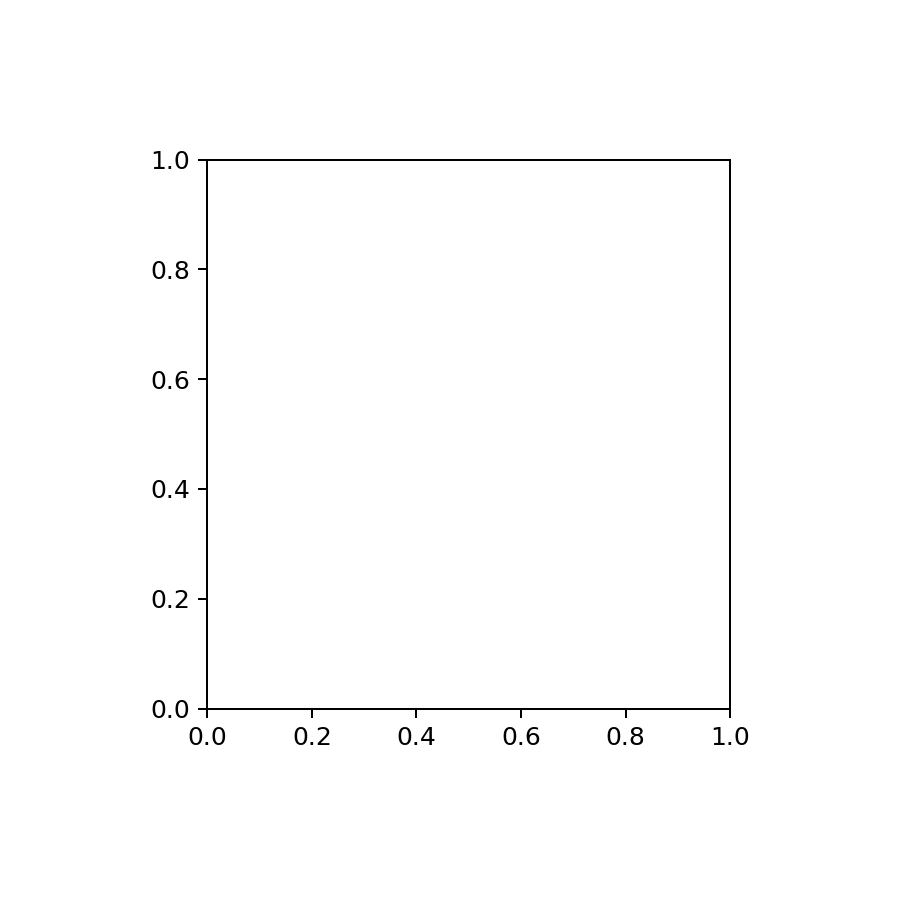

Output()

In [34]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=180)

y_l0_KKmulti = widgets.FloatSlider(value=0.1, min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_l0_KK_multiplier')
y_X0_KKmulti = widgets.FloatSlider(value=0.1, min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_X0_KK_multiplier')
y_X_fmulti   = widgets.FloatSlider(value=10,  min=0., max=50,step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_X_fmultiplier')
y_T_fmulti   = widgets.FloatSlider(value=1,   min=0., max=5,step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_T_fmultiplier')
y_T_KKmulti  = widgets.FloatSlider(value=0.01,min=0., max=0.005, step=1/1000001 ,layout=widgets.Layout(width='75%'), description='y_T_KKmultiplier')
y_T_rmulti   = widgets.FloatSlider(value=0.1, min=0., max=0.5, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_T_rmultiplier')

y_X_r = 1

G_K      = 1
G_Kprime = 0
    
def need(y_l0_KKmulti, y_X0_KKmulti, y_X_fmulti, y_T_fmulti, y_T_KKmulti, y_T_rmulti):

    y_l0_KK = y_l0_KKmulti * y_X_r
    y_X0_KK = y_X0_KKmulti * y_X_r
    y_X_f   = y_X_fmulti   * y_X_r
    y_T_f   = y_T_fmulti   * y_X_r
    y_T_KK  = y_T_KKmulti  * y_X_r
    y_T_r   = y_T_rmulti   * y_X_r
    print("y_l0_KK = "+str(format(y_l0_KK,'.2f')))
    print("y_X0_KK = "+str(format(y_X0_KK,'.2f')))
    print("y_X_f = "+str(format(y_X_f,'.2f')))
    print("y_T_f = "+str(format(y_T_f,'.2f')))
    print("y_T_KK = "+str(format(y_T_KK,'.5f')))
    print("y_T_r = "+str(format(y_T_r,'.5f')))
    
    
    ax.cla()
    globals()['N_WP_K'] = []
    globals()['N_WP_Kprime'] = []
    globals()['N_LOW_K'] = []
    globals()['N_LOW_Kprime'] = []
    globals()['N_TR_K'] = []
    globals()['N_TR_Kprime'] = []
    for l in range(0,7,1):
        globals()['N_WP_K']       += [y_X_r * N_WP_K_fun(G_K, G_Kprime, l, y_l0_KK, y_X_r, y_X_f, y_T_f)]
        globals()['N_WP_Kprime']  += [y_X_r * N_WP_Kprime_fun(G_K, G_Kprime, l, y_l0_KK, y_X_r, y_X_f, y_T_f)]
        globals()['N_LOW_K']      += [y_X_r * N_LOW_K_fun(G_K, G_Kprime, l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f)]
        globals()['N_LOW_Kprime'] += [y_X_r * N_LOW_Kprime_fun(G_K, G_Kprime, l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f)]
        globals()['N_TR_K']       += [y_T_r * N_TR_K_fun(G_K, G_Kprime, l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f, y_T_KK, y_T_r)]
        globals()['N_TR_Kprime']  += [y_T_r * N_TR_Kprime_fun(G_K, G_Kprime, l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f, y_T_KK, y_T_r)]
    
    ax.plot( np.linspace(0, 6, 7), globals()['N_WP_K'], marker='v', linestyle='solid', markersize=10, color='darkred' , markeredgecolor='black',linewidth=1, zorder=3)
    ax.plot( np.linspace(0, 6, 7), globals()['N_WP_Kprime'], marker='v', linestyle='solid', markersize=10, color='red', markeredgecolor='black' ,linewidth=1, zorder=3)
    ax.plot( np.linspace(0, 6, 7), globals()['N_LOW_K'], marker='^', linestyle='dashed', markersize=10, color='darkblue', markeredgecolor='black' ,linewidth=1, zorder=3)
    ax.plot( np.linspace(0, 6, 7), globals()['N_LOW_Kprime'], marker='^', linestyle='dashed', markersize=10, color='deepskyblue', markeredgecolor='black' ,linewidth=1, zorder=3)
    ax.plot( np.linspace(0, 6, 7), globals()['N_TR_K'], marker='o', linestyle='dotted', markersize=10, color='green', markeredgecolor='black' ,linewidth=1, zorder=3)
    ax.plot( np.linspace(0, 6, 7), globals()['N_TR_Kprime'], marker='o', linestyle='dotted', markersize=10, color='mediumseagreen', markeredgecolor='black' ,linewidth=1, zorder=3)
    
    ax.grid()
    ax.set_title('valley intensity', fontsize=18)
    ax.set_ylabel('relative value', fontsize=18, rotation=90)
    ax.set_yticks(np.arange(0, 0.5, 0.5/2))
    ax.set_yticks(np.arange(0, 0.5, 0.5/10), minor=True)
    ax.set_yticks(np.linspace(0, 0.5, 3), [ '0', '0.25', '0.5'])
    ax.set_ylim(-0.52*0.03, 0.52)
    # ax.set_yticks(np.arange(0, 50.01, 50./2))
    # ax.set_yticks(np.arange(0, 50.01, 50./10), minor=True)
    # ax.set_yticks(np.arange(0, 10.01, 10./1))
    # ax.set_yticks(np.arange(0, 10.01, 10./10), minor=True)
    # ax.set_ylim(0.68, 0.8)
    ax.set_xlabel('$\ell$', fontsize=18)
    # ax.set_xticks(np.linspace(-6, 6, 13), [' ', ' ', ' ', ' ', ' ', ' ', ' '])
    ax.set_xticks(np.linspace(0, 6, 7), [ '0', '1', '2', '3', '4', '5', '6'])
    # ax.set_xlim(0, 6)
    ax.legend(['$I_𝐾^{X,\ell}$','$I_{𝐾\'}^{X,\ell}$','$I_𝐾^{X,(0)}$','$I_{𝐾\'}^{X,(0)}$','$I_𝐾^T$','$I_{𝐾\'}^T$'], fontsize=9, loc='center left')
    ax.tick_params(axis='both', which='major', labelsize=18)
    

plt.tight_layout(pad=6)
# plt.tight_layout(pad=2)
# plt.subplots_adjust(left=0.1, right=0.9, 
#                     top=0.975, bottom=0.05, 
#                     wspace=0.4, hspace=0.028)
plt.show()

out = widgets.interactive_output(need, {'y_l0_KKmulti':y_l0_KKmulti, 'y_X0_KKmulti':y_X0_KKmulti, 'y_X_fmulti':y_X_fmulti, 'y_T_fmulti':y_T_fmulti, 'y_T_KKmulti':y_T_KKmulti, 'y_T_rmulti':y_T_rmulti})
ui = widgets.VBox([widgets.Label('coefficient:'), widgets.VBox([y_l0_KKmulti, y_X0_KKmulti, y_X_fmulti, y_T_fmulti, y_T_KKmulti, y_T_rmulti]) ])
display(ui , out )

In [35]:
print(1 * N_WP_K_fun(G_K=1, G_Kprime=0, l=0, y_l0_KK=0.1, y_X_r=1, y_X_f=10, y_T_f=1)+1 * N_LOW_K_fun(G_K=1, G_Kprime=0, l=0, y_l0_KK=0.1, y_X0_KK=0.1, y_X_r=1, y_X_f=10, y_T_f=1))
print(0.1 * N_TR_K_fun(G_K=1, G_Kprime=0, l=0, y_l0_KK=0.1, y_X0_KK=0.1, y_X_r=1, y_X_f=10, y_T_f=1, y_T_KK=0.01, y_T_r=0.1))

0.47727272727272724
0.4393939393939394


In [36]:
print(1 * N_WP_K_fun(G_K=1, G_Kprime=0, l=6, y_l0_KK=0.1, y_X_r=1, y_X_f=10, y_T_f=1)+1 * N_LOW_K_fun(G_K=1, G_Kprime=0, l=6, y_l0_KK=0.1, y_X0_KK=0.1, y_X_r=1, y_X_f=10, y_T_f=1))
print(0.1 * N_TR_K_fun(G_K=1, G_Kprime=0, l=6, y_l0_KK=0.1, y_X0_KK=0.1, y_X_r=1, y_X_f=10, y_T_f=1, y_T_KK=0.01, y_T_r=0.1))

0.4569199457259159
0.4224332881049299


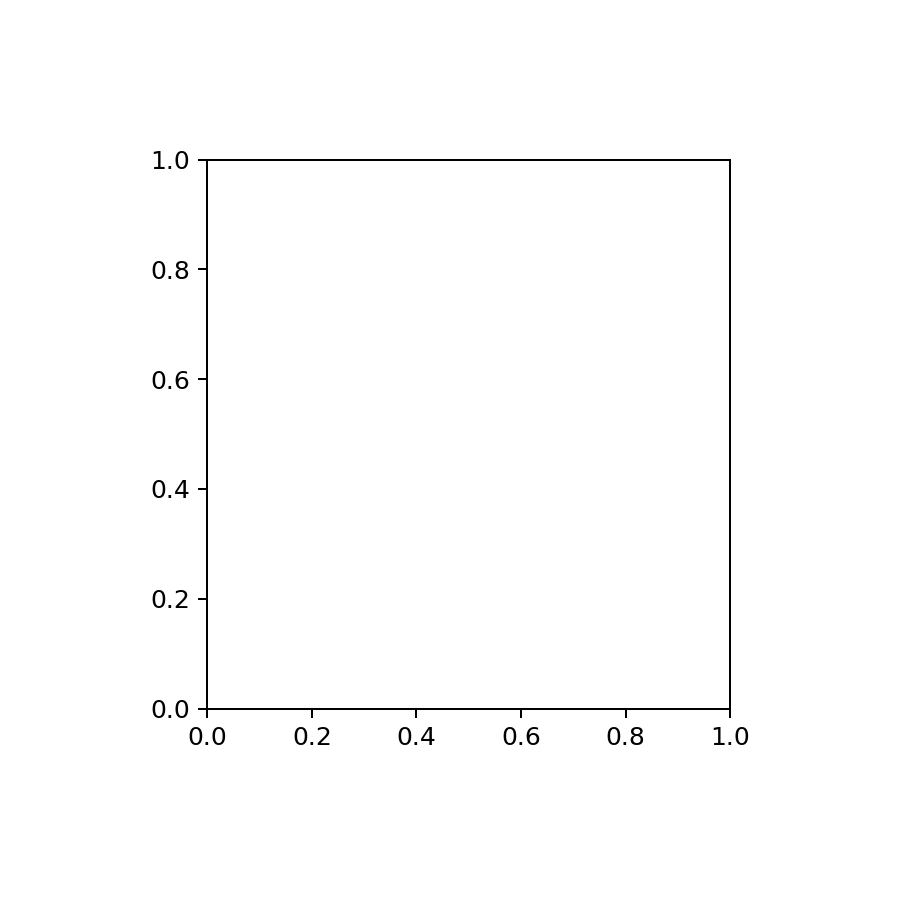

Output()

In [37]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=180)

y_l0_KKmulti = widgets.FloatSlider(value=0.1, min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_l0_KK_multiplier')
y_X0_KKmulti = widgets.FloatSlider(value=0.1, min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_X0_KK_multiplier')
y_X_fmulti   = widgets.FloatSlider(value=10,  min=0., max=50,step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_X_fmultiplier')
y_T_fmulti   = widgets.FloatSlider(value=1,   min=0., max=5,step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_T_fmultiplier')
y_T_KKmulti  = widgets.FloatSlider(value=0.01,min=0., max=0.005, step=1/1000001 ,layout=widgets.Layout(width='75%'), description='y_T_KKmultiplier')
y_T_rmulti   = widgets.FloatSlider(value=0.1, min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_T_rmultiplier')

y_X_r = 1

G_K      = 1
G_Kprime = 0
    
def need(y_l0_KKmulti, y_X0_KKmulti, y_X_fmulti, y_T_fmulti, y_T_KKmulti, y_T_rmulti):

    y_l0_KK = y_l0_KKmulti * y_X_r
    y_X0_KK = y_X0_KKmulti * y_X_r
    y_X_f   = y_X_fmulti   * y_X_r
    y_T_f   = y_T_fmulti   * y_X_r
    y_T_KK  = y_T_KKmulti  * y_X_r
    y_T_r   = y_T_rmulti   * y_X_r
    print("y_l0_KK = "+str(format(y_l0_KK,'.2f')))
    print("y_X0_KK = "+str(format(y_X0_KK,'.2f')))
    print("y_X_f = "+str(format(y_X_f,'.2f')))
    print("y_T_f = "+str(format(y_T_f,'.2f')))
    print("y_T_KK = "+str(format(y_T_KK,'.5f')))
    print("y_T_r = "+str(format(y_T_r,'.5f')))
    
    
    ax.cla()
    globals()['sum_N_WP'] = []
    globals()['sum_N_LOW'] = []
    globals()['sum_N_TR'] = []
    for l in range(0,7,1):
        globals()['sum_N_WP']  += [sum_N_WP_fun(G_K, G_Kprime, l, y_l0_KK, y_X_r, y_X_f, y_T_f)]
        globals()['sum_N_LOW'] += [sum_N_LOW_fun(G_K, G_Kprime, l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f)]
        globals()['sum_N_TR']  += [sum_N_TR_fun(G_K, G_Kprime, l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f, y_T_KK, y_T_r)]
    
    ax.plot( np.linspace(0, 6, 7), globals()['sum_N_WP'], marker='v', linestyle='solid', markersize=10, color='black', markeredgecolor='none', markerfacecolor='darkred', markerfacecoloralt='red', fillstyle='top', linewidth=1, zorder=3)
    ax.plot( np.linspace(0, 6, 7), globals()['sum_N_LOW'], marker='^', linestyle='dashed', markersize=10, color='black', markeredgecolor='none', markerfacecolor='darkblue', markerfacecoloralt='deepskyblue', fillstyle='top', linewidth=1, zorder=3)
    # ax.plot( np.linspace(0, 6, 7), globals()['sum_N_TR'], marker='o', linestyle='dotted', markersize=10, color='black', markeredgecolor='none', markerfacecolor='green', markerfacecoloralt='mediumseagreen', fillstyle='top', linewidth=1, zorder=3)


  
    ax.grid()
    ax.set_title('total population', fontsize=18)
    # ax.set_ylabel('Relative total population', fontsize=20, rotation=90)
    # ax.set_yticks(np.arange(0, 5.21, 5.2/2))
    # ax.set_yticks(np.arange(0, 5.21, 5.2/10), minor=True)
    # ax.set_yticks(np.linspace(0, 5.2, 3), [ ' ', ' ', ' '])
    # ax.set_ylim(-5.2*0.03, 5.2)
    ax.set_yticks(np.arange(0, 0.461, 0.46/2))
    ax.set_yticks(np.arange(0, 0.461, 0.46/10), minor=True)
    ax.set_yticks(np.linspace(0, 0.46, 3), [ ' ', ' ', ' '])
    ax.set_ylim(-0.46*0.03, 0.46)
    # ax.set_yticks(np.arange(0, 0.101, 0.1/2))
    # ax.set_yticks(np.arange(0, 0.101, 0.1/10), minor=True)
    # ax.set_yticks(np.linspace(0, 0.1, 3), [ ' ', ' ', ' '])
    # ax.set_ylim(-0.003, 0.1)
    ax.set_xlabel('$\ell$', fontsize=18)
    # ax.set_xticks(np.linspace(-6, 6, 13), [' ', ' ', ' ', ' ', ' ', ' ', ' '])
    ax.set_xticks(np.linspace(0, 6, 7), [ '0', '1', '2', '3', '4', '5', '6'])
    # ax.set_xlim(0, 6)
    ax.legend(['$N_𝐾^{X,\ell}$+$N_{𝐾\'}^{X,\ell}$', '$N_𝐾^{X,(0)}$+$N_{𝐾\'}^{X,(0)}$', '$N_𝐾^T$+$N_{𝐾\'}^T$'], fontsize=18, loc='center left')
    ax.tick_params(axis='both', which='major', labelsize=18)
    

plt.tight_layout(pad=6)
# plt.tight_layout(pad=2)
# plt.subplots_adjust(left=0.1, right=0.9, 
#                     top=0.975, bottom=0.05, 
#                     wspace=0.4, hspace=0.028)
plt.show()

out = widgets.interactive_output(need, {'y_l0_KKmulti':y_l0_KKmulti, 'y_X0_KKmulti':y_X0_KKmulti, 'y_X_fmulti':y_X_fmulti, 'y_T_fmulti':y_T_fmulti, 'y_T_KKmulti':y_T_KKmulti, 'y_T_rmulti':y_T_rmulti})
ui = widgets.VBox([widgets.Label('coefficient:'), widgets.VBox([y_l0_KKmulti, y_X0_KKmulti, y_X_fmulti, y_T_fmulti, y_T_KKmulti, y_T_rmulti]) ])
display(ui , out )

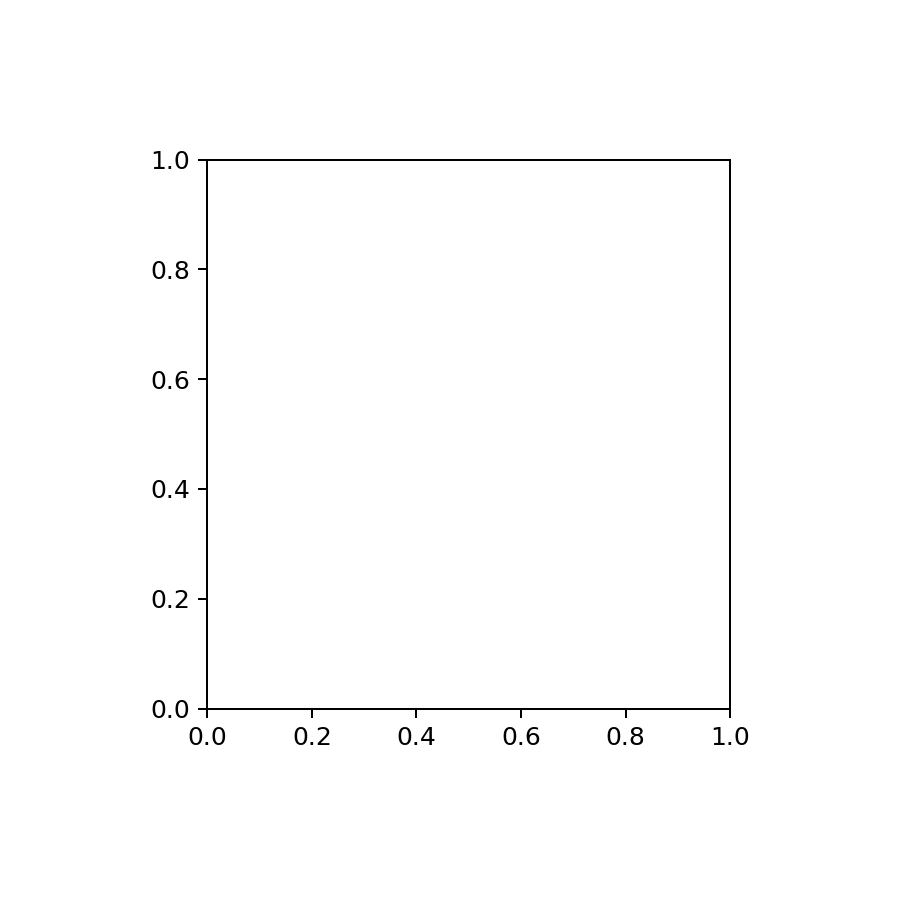

Output()

In [38]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=180)

y_l0_KKmulti = widgets.FloatSlider(value=0.1, min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_l0_KK_multiplier')
y_X0_KKmulti = widgets.FloatSlider(value=0.1, min=0., max=1, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_X0_KK_multiplier')
y_X_fmulti   = widgets.FloatSlider(value=10,  min=0., max=50,step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_X_fmultiplier')
y_T_fmulti   = widgets.FloatSlider(value=1,   min=0., max=5,step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_T_fmultiplier')
y_T_KKmulti  = widgets.FloatSlider(value=0.01,min=0., max=0.005, step=1/1000001 ,layout=widgets.Layout(width='75%'), description='y_T_KKmultiplier')
y_T_rmulti   = widgets.FloatSlider(value=0.1, min=0., max=0.5, step=1/10001 ,layout=widgets.Layout(width='75%'), description='y_T_rmultiplier')

y_X_r = 1

G_K      = 1
G_Kprime = 0
    
def need(y_l0_KKmulti, y_X0_KKmulti, y_X_fmulti, y_T_fmulti, y_T_KKmulti, y_T_rmulti):

    y_l0_KK = y_l0_KKmulti * y_X_r
    y_X0_KK = y_X0_KKmulti * y_X_r
    y_X_f   = y_X_fmulti   * y_X_r
    y_T_f   = y_T_fmulti   * y_X_r
    y_T_KK  = y_T_KKmulti  * y_X_r
    y_T_r   = y_T_rmulti   * y_X_r
    print("y_l0_KK = "+str(format(y_l0_KK,'.2f')))
    print("y_X0_KK = "+str(format(y_X0_KK,'.2f')))
    print("y_X_f = "+str(format(y_X_f,'.2f')))
    print("y_T_f = "+str(format(y_T_f,'.2f')))
    print("y_T_KK = "+str(format(y_T_KK,'.5f')))
    print("y_T_r = "+str(format(y_T_r,'.5f')))
    
    
    ax.cla()
    globals()['sum_N_WP'] = []
    globals()['sum_N_LOW'] = []
    globals()['sum_N_TR'] = []
    for l in range(0,7,1):
        globals()['sum_N_WP']  += [y_X_r * sum_N_WP_fun(G_K, G_Kprime, l, y_l0_KK, y_X_r, y_X_f, y_T_f)]
        globals()['sum_N_LOW'] += [y_X_r * sum_N_LOW_fun(G_K, G_Kprime, l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f)]
        globals()['sum_N_TR']  += [y_T_r * sum_N_TR_fun(G_K, G_Kprime, l, y_l0_KK, y_X0_KK, y_X_r, y_X_f, y_T_f, y_T_KK, y_T_r)]
    
    ax.plot( np.linspace(0, 6, 7), globals()['sum_N_WP'], marker='v', linestyle='solid', markersize=10, color='black', markeredgecolor='black', markerfacecolor='darkred', markerfacecoloralt='red', fillstyle='top', linewidth=1, zorder=3)
    ax.plot( np.linspace(0, 6, 7), globals()['sum_N_LOW'], marker='^', linestyle='dashed', markersize=10, color='black', markeredgecolor='black', markerfacecolor='darkblue', markerfacecoloralt='deepskyblue', fillstyle='top', linewidth=1, zorder=3)
    ax.plot( np.linspace(0, 6, 7), globals()['sum_N_TR'], marker='o', linestyle='dotted', markersize=10, color='black', markeredgecolor='black', markerfacecolor='green', markerfacecoloralt='mediumseagreen', fillstyle='top', linewidth=1, zorder=3)


  
    ax.grid()
    ax.set_title('total intensity', fontsize=18)
    # ax.set_ylabel('Intensity', fontsize=20, rotation=90)
    ax.set_yticks(np.arange(0, 0.5, 0.5/2))
    ax.set_yticks(np.arange(0, 0.5, 0.5/10), minor=True)
    ax.set_yticks(np.linspace(0, 0.5, 3), [ ' ', ' ', ' '])
    ax.set_ylim(-0.52*0.03, 0.52)
    ax.set_xlabel('$\ell$', fontsize=20)
    # ax.set_xticks(np.linspace(-6, 6, 13), [' ', ' ', ' ', ' ', ' ', ' ', ' '])
    ax.set_xticks(np.linspace(0, 6, 7), [ '0', '1', '2', '3', '4', '5', '6'])
    # ax.set_xlim(0, 6)
    ax.legend(['$I_𝐾^{X,\ell}$+$I_{𝐾\'}^{X,\ell}$', '$I_𝐾^{X,(0)}$+$I_{𝐾\'}^{X,(0)}$', '$I_𝐾^T$+$I_{𝐾\'}^T$'], fontsize=18, loc='center left')
    ax.tick_params(axis='both', which='major', labelsize=18)
    

plt.tight_layout(pad=6)
# plt.tight_layout(pad=2)
# plt.subplots_adjust(left=0.1, right=0.9, 
#                     top=0.975, bottom=0.05, 
#                     wspace=0.4, hspace=0.028)
plt.show()

out = widgets.interactive_output(need, {'y_l0_KKmulti':y_l0_KKmulti, 'y_X0_KKmulti':y_X0_KKmulti, 'y_X_fmulti':y_X_fmulti, 'y_T_fmulti':y_T_fmulti, 'y_T_KKmulti':y_T_KKmulti, 'y_T_rmulti':y_T_rmulti})
ui = widgets.VBox([widgets.Label('coefficient:'), widgets.VBox([y_l0_KKmulti, y_X0_KKmulti, y_X_fmulti, y_T_fmulti, y_T_KKmulti, y_T_rmulti]) ])
display(ui , out )

In [39]:
print(2*1 * sum_N_WP_fun(G_K=1, G_Kprime=0, l=0, y_l0_KK=0.1, y_X_r=1, y_X_f=10, y_T_f=1))

0.16666666666666666


In [40]:
print(2*1 * sum_N_LOW_fun(G_K=1, G_Kprime=0, l=0, y_l0_KK=0.1, y_X0_KK=0.1, y_X_r=1, y_X_f=10, y_T_f=1))

0.8333333333333333


In [41]:
print(2*0.1 * sum_N_TR_fun(G_K=1, G_Kprime=0, l=0, y_l0_KK=0.1, y_X0_KK=0.1, y_X_r=1, y_X_f=10, y_T_f=1, y_T_KK=0.01, y_T_r=0.1))

1.0
